In [1]:
# import required libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
import matplotlib.patches as mpatches
import math
from scipy.stats import binom, norm, poisson, shapiro
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# 1. Data preparation and Visualization Part:

# EDA

In [2]:
# Loading the dataset:
df = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA11/CSV/1.0/en')

In [3]:
# Displaying first 5 rows:
df


STATISTIC                 STATISTIC Label  TLIST(A1)  Year C02076V03371  \
0         PEA11  Population estimates from 1926       1926  1926            -   
1         PEA11  Population estimates from 1926       1926  1926            -   
2         PEA11  Population estimates from 1926       1926  1926            -   
3         PEA11  Population estimates from 1926       1926  1926          200   
4         PEA11  Population estimates from 1926       1926  1926          200   
...         ...                             ...        ...   ...          ...   
11812     PEA11  Population estimates from 1926       2023  2023          098   
11813     PEA11  Population estimates from 1926       2023  2023          098   
11814     PEA11  Population estimates from 1926       2023  2023          646   
11815     PEA11  Population estimates from 1926       2023  2023          646   
11816     PEA11  Population estimates from 1926       2023  2023          646   

      Single Year of Age C02199V02655         Sex    UNIT    VALUE  
0               All ages            -  Both sexes  Number  2971992  
1               All ages            1        Male  Number  1506889  
2               All ages            2      Female  Number  1465103  
3           Under 1 year            -  Both sexes  Number    55391  
4           Under 1 year            1        Male  Number    28084  
...                  ...          ...         ...     ...      ...  
11812           98 years            1        Male  Number      197  
11813           98 years            2      Female  Number      632  
11814  99 years and over            -  Both sexes  Number     1600  
11815  99 years and over            1        Male  Number      352  
11816  99 years and over            2      Female  Number     1248  

[11817 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


In [5]:
null_values = df.isnull().sum()
null_values

STATISTIC             0
STATISTIC Label       0
TLIST(A1)             0
Year                  0
C02076V03371          0
Single Year of Age    0
C02199V02655          0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [6]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02076V03371','C02199V02655','UNIT']
df.drop(df_col_drop ,axis=1, inplace=True) 

In [7]:
# Renaming the columns
df = df.rename(columns={'Single Year of Age': 'Age_Group','VALUE':'Population'})

Creating a df1 for Population Growth

In [8]:
df1 = df.copy()
df11 = df.copy() # We'll be using this for statistics part

In [9]:
df.head()

Year     Age_Group         Sex  Population
0  1926      All ages  Both sexes     2971992
1  1926      All ages        Male     1506889
2  1926      All ages      Female     1465103
3  1926  Under 1 year  Both sexes       55391
4  1926  Under 1 year        Male       28084

Let's compare if numbers look great when breaking down All ages and Both sexes in one df. The rest will go into another df to compare if there are differences.

In [10]:
#All Ages and both sexes:
dfa = df[(df['Age_Group'] == 'All ages') & (df['Sex'] == 'Both sexes')]
dfb = dfa.groupby('Year')['Population'].sum().reset_index() # Creating a df

In [11]:
# !All Ages and both sexes:
dfc =df[(df['Age_Group'] != 'All ages') & (df['Sex'] != 'Both sexes')]
dfd = dfb.groupby('Year')['Population'].sum().reset_index() # Creating a df

In [12]:
dfd  = dfd .rename(columns={'Population': 'Population_2'}) # Renaming column Population to merge

In [13]:
dfb= pd.merge(dfb,dfd, on='Year') # Merging both df's

In [14]:
dfb['Pop_Diff'] = dfb['Population']-dfb['Population_2'] # Substracting Population to see if there are any differences

# When breaking down into categories there are no differences for the population.

In [15]:
dfb

Year  Population  Population_2  Pop_Diff
0   1926     2971992       2971992         0
1   1936     2968420       2968420         0
2   1946     2955107       2955107         0
3   1951     2960593       2960593         0
4   1961     2818341       2818341         0
5   1966     2884002       2884002         0
6   1971     2978248       2978248         0
7   1979     3368217       3368217         0
8   1981     3443405       3443405         0
9   1986     3540643       3540643         0
10  1991     3525719       3525719         0
11  1996     3626087       3626087         0
12  1997     3664313       3664313         0
13  1998     3703082       3703082         0
14  1999     3741647       3741647         0
15  2000     3789536       3789536         0
16  2001     3847198       3847198         0
17  2002     3917203       3917203         0
18  2003     3979853       3979853         0
19  2004     4045188       4045188         0
20  2005     4133839       4133839         0
21  2006     4232929       4232929         0
22  2007     4375842       4375842         0
23  2008     4485070       4485070         0
24  2009     4533395       4533395         0
25  2010     4554763       4554763         0
26  2011     4574888       4574888         0
27  2012     4593697       4593697         0
28  2013     4614669       4614669         0
29  2014     4645440       4645440         0
30  2015     4687787       4687787         0
31  2016     4739597       4739597         0
32  2017     4810895       4810895         0
33  2018     4884896       4884896         0
34  2019     4958471       4958471         0
35  2020     5029875       5029875         0
36  2021     5074668       5074668         0
37  2022     5183966       5183966         0
38  2023     5281612       5281612         0

# Yearly age average

We want to get the yearly average for the Population of Ireland for period 1926 to 2023.

Two assumptions, to make our life easier:

1. Age_Group category "Under 1 year" we are going to relabel this as "1 year".
2. Age_Group category "Under 1 year" we are going to relabel this as "99 years".

I believe this modification will have minimal impact on the result.

In [16]:
# Dropping rows based on criteria
df = df[~((df['Sex'] != 'Both sexes') | (df['Age_Group'] == 'All ages'))] # Drop both sexes different that All ages

In [17]:
df.head()

Year     Age_Group         Sex  Population
3   1926  Under 1 year  Both sexes       55391
6   1926        1 year  Both sexes       55876
9   1926       2 years  Both sexes       58273
12  1926       3 years  Both sexes       59050
15  1926       4 years  Both sexes       59123

In [18]:
df['Age_Group'] = df['Age_Group'].str.replace('Under 1 year', '1 year').str.replace('99 years and over', '99 years')

In [19]:
# Create a new column 'Age' based on the modified values from 'Age_Group'
df['Age'] = df['Age_Group'].apply(lambda x: int(x.split(' ')[0]))

# Convert the 'Age' column to int64
df['Age'] = df['Age'].astype('int64')

Very important to note that describe() function is averaging Age column by adding all numbers and dividing by the number of entries. Is not that clever to understand that there is more maths involved, we need to multiply each age by the population, add them up and divide by total population, we will see this as it follows:

In [20]:
df.describe()

Year    Population          Age
count  3900.000000   3900.000000  3900.000000
mean   1996.410256  40544.895641    49.510000
std      24.465267  23783.909198    28.852788
min    1926.000000     65.000000     1.000000
25%    1986.000000  20827.500000    24.750000
50%    2004.000000  45819.500000    49.500000
75%    2014.000000  60653.750000    74.250000
max    2023.000000  87281.000000    99.000000

In [21]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df_col_drop = ['Age_Group','Sex']
df.drop(df_col_drop ,axis=1, inplace=True) 

In [22]:
df9 = df.copy() # We will be using this in Statistic part
df10 = df.copy() # We will be using this in Statistic part

In [23]:
# Creating a list of tuples (year, age, population), (1926, 1, 55391)
year_age_pop = [(row['Year'], row['Age'], row['Population']) for _, row in df.iterrows()]

# Passing years into a list
years = df['Year'].astype('int64').tolist()

# Creating function age_avg
def age_avg(year_age_pop, years):
    
    # Creating a dictionary to save averages for each of the years.   
    average_ages = {}

    # Iterating through each of the years stored in years list
    for year in years:
        # Initialize variables to keep track of the total population and weighted sum of ages for the current year
        total_population = 0
        weighted_age_sum = 0

        # Iterate through each tuple (year, age, population) in year_age_pop
        for y, age, population in year_age_pop:
            # Check if the year matches the current year in the loop
            if y == year:
                # Add the population to the total population for the current year
                total_population += population
                # Add the weighted sum of ages (age * population) to the weighted_age_sum for the current year
                weighted_age_sum += age * population

        # We know total population is not zero, this if statement populates dictionary average_ages
        if total_population != 0:
            # Dividing weighted age sum by total population to obtain yearly average
            average_ages[year] = weighted_age_sum / total_population

    # Return the dictionary containing the average ages for each year
    return average_ages

# Calling the function and passing all values into yearly_age_avg dictionary
yearly_age_avg = age_avg(year_age_pop, years)

# Creating a DataFrame from yearly_age_avg
ROI_age_avg = pd.DataFrame(list(yearly_age_avg.items()), columns=['Year', 'Average_Age'])

ROI_age_avg

Year  Average_Age
0   1926    30.653223
1   1936    31.604227
2   1946    31.907538
3   1951    31.987736
4   1961    32.286610
5   1966    31.898300
6   1971    31.632284
7   1979    30.878898
8   1981    30.807638
9   1986    31.282505
10  1991    32.488827
11  1996    33.589488
12  1997    33.791478
13  1998    34.003280
14  1999    34.167958
15  2000    34.330794
16  2001    34.493496
17  2002    34.643470
18  2003    34.779741
19  2004    34.915350
20  2005    35.032036
21  2006    35.013536
22  2007    34.990085
23  2008    34.998831
24  2009    35.162839
25  2010    35.383817
26  2011    35.615102
27  2012    35.847602
28  2013    36.080443
29  2014    36.332228
30  2015    36.575644
31  2016    36.810293
32  2017    37.060121
33  2018    37.261711
34  2019    37.529289
35  2020    37.784546
36  2021    38.088504
37  2022    38.385274
38  2023    38.621133

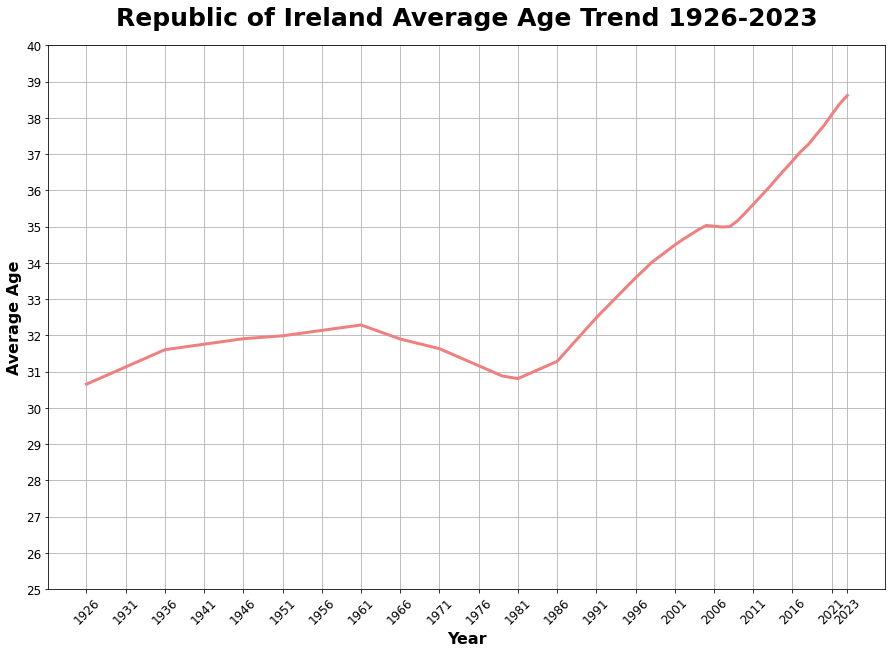

In [24]:
# Plotting
plt.figure(figsize=(15, 10))

plt.plot(ROI_age_avg['Year'], ROI_age_avg['Average_Age'],color='#F08080',linewidth=3)

# Labels
plt.title('Republic of Ireland Average Age Trend 1926-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('Average Age', fontsize=16, fontweight="bold")
plt.ticklabel_format(style='plain', axis='y') # Avoiding scientific notation
plt.yticks(range(25, 40+1, 1),fontsize=12) # Creating a range having more values it's useful!!
plt.xticks(list(range(1926, 2024, 5)) + [2023], rotation=45, fontsize=12) # Every 5 years a year is displayed...                                              
plt.grid(True) #Helps locating points
plt.show()

# Population Growth

For this dataset numbers match across categories, I'll be organising the data for sex categories  
as in Both Sexes, Male and Female.

In [25]:
# Dropping rows based on criteria
df1 = df1[~((df1['Sex'] == 'Both sexes') & (df1['Age_Group'] != 'All ages'))] # Drop both sexes different that All ages
df1 = df1[~((df1['Sex'] != 'Both sexes') & (df1['Age_Group'] == 'All ages'))] # Drop Male and Female All ages


In [26]:
df1

Year          Age_Group         Sex  Population
0      1926           All ages  Both sexes     2971992
4      1926       Under 1 year        Male       28084
5      1926       Under 1 year      Female       27307
7      1926             1 year        Male       28374
8      1926             1 year      Female       27502
...     ...                ...         ...         ...
11810  2023           97 years      Female         821
11812  2023           98 years        Male         197
11813  2023           98 years      Female         632
11815  2023  99 years and over        Male         352
11816  2023  99 years and over      Female        1248

[7839 rows x 4 columns]

Using a Pivot to group all values.

In [27]:
pivot_df1 = df1.pivot_table(index=['Year'],columns='Sex', values='Population', aggfunc='sum').reset_index()


In [28]:
pivot_df1

Sex  Year  Both sexes   Female     Male
0    1926     2971992  1465103  1506889
1    1936     2968420  1447966  1520454
2    1946     2955107  1460230  1494877
3    1951     2960593  1453996  1506597
4    1961     2818341  1401792  1416549
5    1966     2884002  1434970  1449032
6    1971     2978248  1482488  1495760
7    1979     3368217  1674945  1693272
8    1981     3443405  1714051  1729354
9    1986     3540643  1770953  1769690
10   1991     3525719  1772301  1753418
11   1996     3626087  1825855  1800232
12   1997     3664313  1844919  1819394
13   1998     3703082  1864223  1838859
14   1999     3741647  1883034  1858613
15   2000     3789536  1906590  1882946
16   2001     3847198  1934070  1913128
17   2002     3917203  1971039  1946164
18   2003     3979853  2002939  1976914
19   2004     4045188  2033274  2011914
20   2005     4133839  2072008  2061831
21   2006     4232929  2115607  2117322
22   2007     4375842  2184567  2191275
23   2008     4485070  2246489  2238581
24   2009     4533395  2276053  2257342
25   2010     4554763  2292582  2262181
26   2011     4574888  2304382  2270506
27   2012     4593697  2318680  2275017
28   2013     4614669  2328538  2286131
29   2014     4645440  2346399  2299041
30   2015     4687787  2370069  2317718
31   2016     4739597  2393051  2346546
32   2017     4810895  2430068  2380827
33   2018     4884896  2465390  2419506
34   2019     4958471  2502165  2456306
35   2020     5029875  2538097  2491778
36   2021     5074668  2560645  2514023
37   2022     5183966  2622012  2561954
38   2023     5281612  2675442  2606170

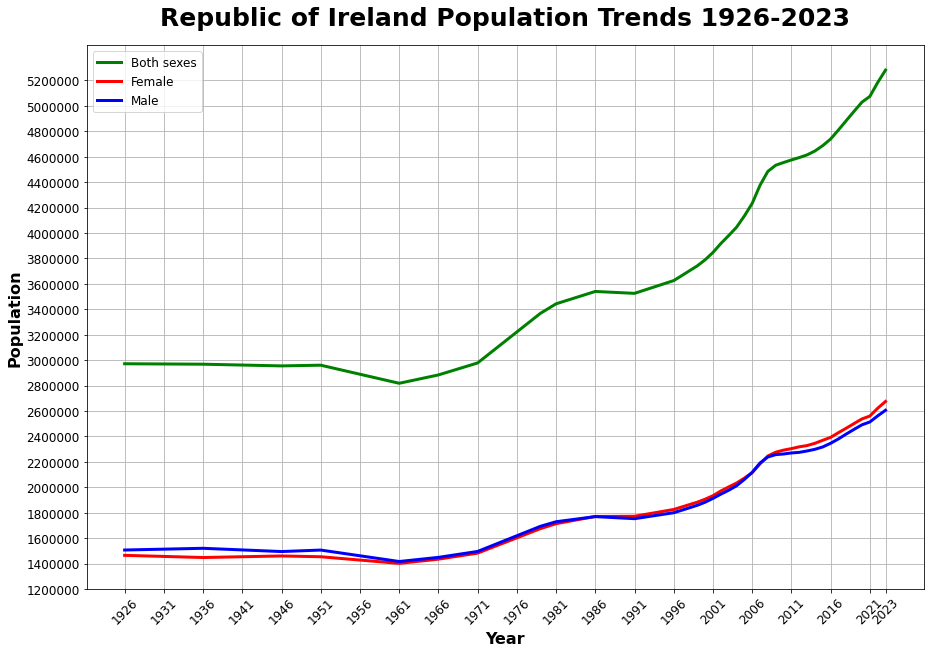

In [29]:
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(pivot_df1['Year'], pivot_df1['Both sexes'],color='green', label='Both sexes',linewidth=3)
plt.plot(pivot_df1['Year'], pivot_df1['Female'],color='red', label='Female',linewidth=3)
plt.plot(pivot_df1['Year'], pivot_df1['Male'],color='blue',label='Male',linewidth=3)

# Labels
plt.title('Republic of Ireland Population Trends 1926-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('Population', fontsize=16, fontweight="bold")
plt.ticklabel_format(style='plain', axis='y') # Avoiding scientific notation
plt.yticks(range(1200000, 5200000+100000, 200000),fontsize=12) # Creating a range having more values it's useful!!

plt.xticks(list(range(1926, 2024, 5)) + [2023], rotation=45, fontsize=12)  # Every 5 years a year is displayed...

plt.legend(fontsize=12)                                                   
plt.grid(True) #Helps locating points
plt.show()

# Population Pyramids

## EDA

In [30]:
df1_backup = df1.copy()

In [31]:
df1=df1_backup.copy()

In [32]:
#Normalising Population
df1['Population'] = df1['Population'] / 100000

In [33]:
df1.head()

Year     Age_Group         Sex  Population
0  1926      All ages  Both sexes    29.71992
4  1926  Under 1 year        Male     0.28084
5  1926  Under 1 year      Female     0.27307
7  1926        1 year        Male     0.28374
8  1926        1 year      Female     0.27502

In [34]:
# Function to create Age_ groups from 0-4 years to 95-99 years, increments of 5 years
def group_age_by_5_years(df1):
    df1['Age_Group'] = df1['Age_Group'].str.extract('(\d+)').astype(float)
    df1['Age_Group'] = pd.cut(df1['Age_Group'], bins=range(0, 105, 5), labels=[f'{i}-{i + 4}' for i in range(0, 100, 5)], right=False)
    return df1

# Applying the function
df1 = group_age_by_5_years(df1)

To achieve this we need to first create a pivot table to sumarize all values

In [35]:
piramid_df = df1.pivot_table(index=['Year','Age_Group'],columns='Sex', values='Population', aggfunc='sum').reset_index()

In [36]:
piramid_df

Sex  Year Age_Group  Both sexes   Female     Male
0    1926       0-4         0.0  1.41540  1.46173
1    1926       5-9         0.0  1.39869  1.44764
2    1926     10-14         0.0  1.44719  1.50814
3    1926     15-19         0.0  1.40140  1.46047
4    1926     20-24         0.0  1.15713  1.24518
..    ...       ...         ...      ...      ...
775  2023     75-79         0.0  0.84271  0.77819
776  2023     80-84         0.0  0.55611  0.46149
777  2023     85-89         0.0  0.32790  0.22958
778  2023     90-94         0.0  0.15799  0.08271
779  2023     95-99         0.0  0.05345  0.01909

[780 rows x 5 columns]

In [37]:
piramid_df_backup = piramid_df.copy()

In [38]:
piramid_df["Female_Left"] = 0

In [39]:
piramid_df["Female_Width"] = piramid_df["Female"]

In [40]:
piramid_df["Male_Left"] = -piramid_df["Male"]

In [41]:
piramid_df["Male_Width"] = piramid_df["Male"]

In [42]:
piramid_df

Sex  Year Age_Group  Both sexes   Female     Male  Female_Left  Female_Width  \
0    1926       0-4         0.0  1.41540  1.46173            0       1.41540   
1    1926       5-9         0.0  1.39869  1.44764            0       1.39869   
2    1926     10-14         0.0  1.44719  1.50814            0       1.44719   
3    1926     15-19         0.0  1.40140  1.46047            0       1.40140   
4    1926     20-24         0.0  1.15713  1.24518            0       1.15713   
..    ...       ...         ...      ...      ...          ...           ...   
775  2023     75-79         0.0  0.84271  0.77819            0       0.84271   
776  2023     80-84         0.0  0.55611  0.46149            0       0.55611   
777  2023     85-89         0.0  0.32790  0.22958            0       0.32790   
778  2023     90-94         0.0  0.15799  0.08271            0       0.15799   
779  2023     95-99         0.0  0.05345  0.01909            0       0.05345   

Sex  Male_Left  Male_Width  
0     -1.46173     1.46173  
1     -1.44764     1.44764  
2     -1.50814     1.50814  
3     -1.46047     1.46047  
4     -1.24518     1.24518  
..         ...         ...  
775   -0.77819     0.77819  
776   -0.46149     0.46149  
777   -0.22958     0.22958  
778   -0.08271     0.08271  
779   -0.01909     0.01909  

[780 rows x 9 columns]

Filtering by years 1926, 1961, 1996, 2023

In [43]:
piramid_df_1926 = piramid_df[piramid_df['Year'] == 1926]
piramid_df_1961 = piramid_df[piramid_df['Year'] == 1961]
piramid_df_1996 = piramid_df[piramid_df['Year'] == 1996]
piramid_df_2023 = piramid_df[piramid_df['Year'] == 2023]

In [44]:
piramid_df_1926

Sex  Year Age_Group  Both sexes   Female     Male  Female_Left  Female_Width  \
0    1926       0-4         0.0  1.41540  1.46173            0       1.41540   
1    1926       5-9         0.0  1.39869  1.44764            0       1.39869   
2    1926     10-14         0.0  1.44719  1.50814            0       1.44719   
3    1926     15-19         0.0  1.40140  1.46047            0       1.40140   
4    1926     20-24         0.0  1.15713  1.24518            0       1.15713   
5    1926     25-29         0.0  1.08755  1.06646            0       1.08755   
6    1926     30-34         0.0  0.90798  0.92502            0       0.90798   
7    1926     35-39         0.0  0.88410  0.87349            0       0.88410   
8    1926     40-44         0.0  0.83035  0.86050            0       0.83035   
9    1926     45-49         0.0  0.81883  0.87010            0       0.81883   
10   1926     50-54         0.0  0.77070  0.85648            0       0.77070   
11   1926     55-59         0.0  0.58592  0.67121            0       0.58592   
12   1926     60-64         0.0  0.51475  0.53671            0       0.51475   
13   1926     65-69         0.0  0.49713  0.51499            0       0.49713   
14   1926     70-74         0.0  0.44761  0.37485            0       0.44761   
15   1926     75-79         0.0  0.25041  0.20926            0       0.25041   
16   1926     80-84         0.0  0.15315  0.12082            0       0.15315   
17   1926     85-89         0.0  0.06251  0.05044            0       0.06251   
18   1926     90-94         0.0  0.01556  0.01183            0       0.01556   
19   1926     95-99         0.0  0.00467  0.00357            0       0.00467   

Sex  Male_Left  Male_Width  
0     -1.46173     1.46173  
1     -1.44764     1.44764  
2     -1.50814     1.50814  
3     -1.46047     1.46047  
4     -1.24518     1.24518  
5     -1.06646     1.06646  
6     -0.92502     0.92502  
7     -0.87349     0.87349  
8     -0.86050     0.86050  
9     -0.87010     0.87010  
10    -0.85648     0.85648  
11    -0.67121     0.67121  
12    -0.53671     0.53671  
13    -0.51499     0.51499  
14    -0.37485     0.37485  
15    -0.20926     0.20926  
16    -0.12082     0.12082  
17    -0.05044     0.05044  
18    -0.01183     0.01183  
19    -0.00357     0.00357

Serious problem when plotting the second Population Pyramid, I need it to reset the index
for this piece of code to start working "for idx in range(len(piramid_df_2023)):
    plt.text(x=piramid_df_2023["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %"."

In [45]:
piramid_df_1996 = piramid_df_1996.reset_index(drop=True)
piramid_df_2023 = piramid_df_2023.reset_index(drop=True)

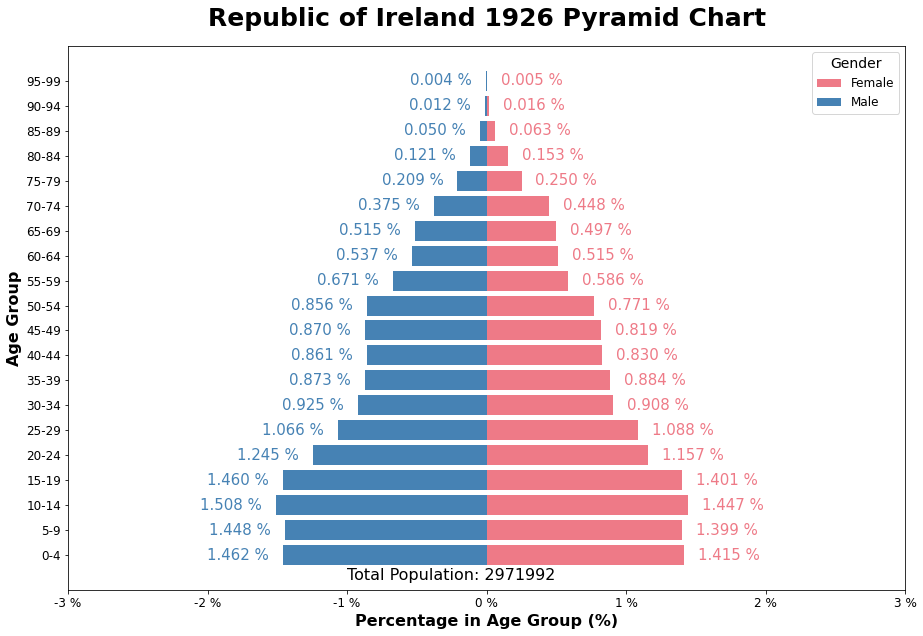

In [46]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_1926["Age_Group"], width=piramid_df_1926["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_1926["Age_Group"], width=piramid_df_1926["Male_Width"], left=piramid_df_1926["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_1926)):
    plt.text(x=piramid_df_1926["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_1926["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_1926["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_1926["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_1926['total_population'] = (piramid_df_1926['Female'] + piramid_df_1926['Male'])*100000
total_population =int(piramid_df_1926['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 1926 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16);

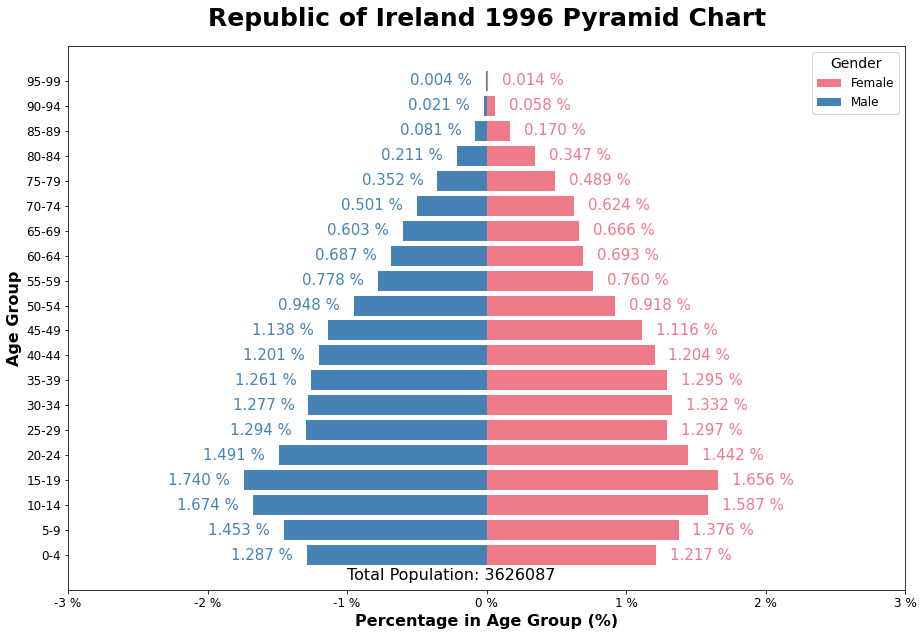

In [47]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_1996["Age_Group"], width=piramid_df_1996["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_1996["Age_Group"], width=piramid_df_1996["Male_Width"], left=piramid_df_1996["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_1996)):
    plt.text(x=piramid_df_1996["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_1996["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_1996["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_1996["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_1996['total_population'] = (piramid_df_1996['Female'] + piramid_df_1996['Male'])*100000
total_population =int(piramid_df_1996['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 1996 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16);

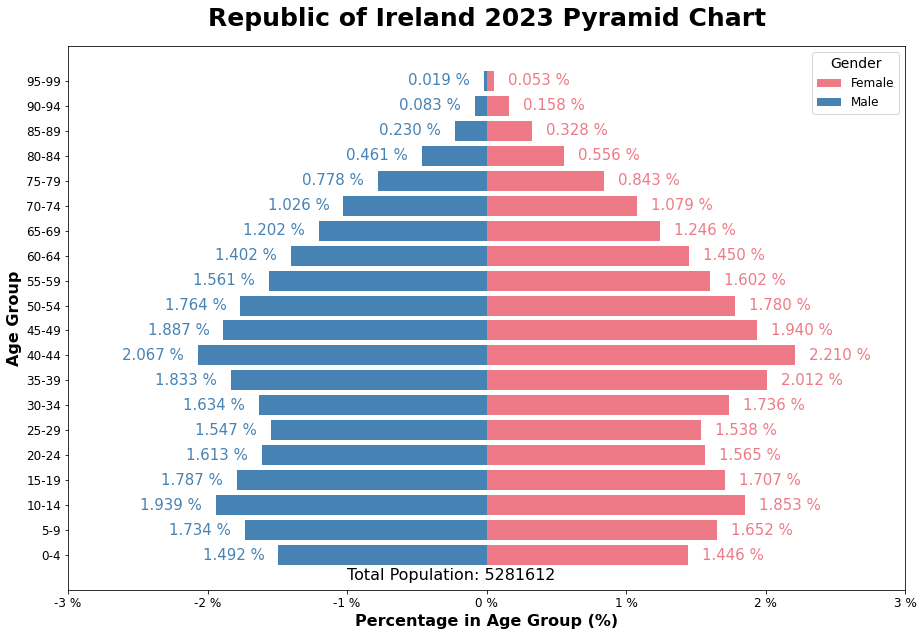

In [48]:
#code source from https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib
female_color = "#ee7a87"
male_color = "#4682b4"

fig = plt.figure(figsize=(15,10))

plt.barh(y=piramid_df_2023["Age_Group"], width=piramid_df_2023["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=piramid_df_2023["Age_Group"], width=piramid_df_2023["Male_Width"], left=piramid_df_2023["Male_Left"],
         color="#4682b4", label="Male");



for idx in range(len(piramid_df_2023)):
    plt.text(x=piramid_df_2023["Male_Left"][idx]-0.1, y=idx, s="{:.3f} %".format(piramid_df_2023["Male"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=piramid_df_2023["Female_Width"][idx]+0.1, y=idx, s="{:.3f} %".format(piramid_df_2023["Female"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");

piramid_df_2023['total_population'] = (piramid_df_2023['Female'] + piramid_df_2023['Male'])*100000
total_population =int(piramid_df_2023['total_population'].sum()) #Adding and converting to int to eliminate .0
plt.xlim(-3,3);

plt.xticks(range(-3,4), ["{} %".format(i) for i in range(-3,4)], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best",fontsize=12,title='Gender',title_fontsize=14); 
plt.xlabel("Percentage in Age Group (%)", fontsize=16, fontweight="bold")
plt.ylabel("Age Group", fontsize=16, fontweight="bold")
plt.title("Republic of Ireland 2023 Pyramid Chart", loc="center", pad=20, fontsize=25, fontweight="bold")

plt.text(-1, -1, f'Total Population: {total_population}', fontsize=16);

# Population density maps

## EDA

In [49]:
# Loading the dataset:
df2=pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA07/CSV/1.0/en')

In [50]:
# Displaying first 5 rows:
df2.head()

STATISTIC                          Statistic Label C02076V02508  \
0     PEA07  Estimated Population (Persons in April)          205   
1     PEA07  Estimated Population (Persons in April)          205   
2     PEA07  Estimated Population (Persons in April)          205   
3     PEA07  Estimated Population (Persons in April)          205   
4     PEA07  Estimated Population (Persons in April)          205   

     Age Group C02199V02655         Sex C02196V02652 Regional Authority Area  \
0  0 - 4 years            -  Both sexes            -                   State   
1  0 - 4 years            -  Both sexes            -                   State   
2  0 - 4 years            -  Both sexes            -                   State   
3  0 - 4 years            -  Both sexes            -                   State   
4  0 - 4 years            -  Both sexes            -                   State   

   TLIST(A1)  Year      UNIT  VALUE  
0       1996  1996  Thousand  250.4  
1       1997  1997  Thousand  250.0  
2       1998  1998  Thousand  253.7  
3       1999  1999  Thousand  259.8  
4       2000  2000  Thousand  266.2

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11286 entries, 0 to 11285
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATISTIC                11286 non-null  object 
 1   Statistic Label          11286 non-null  object 
 2   C02076V02508             11286 non-null  object 
 3   Age Group                11286 non-null  object 
 4   C02199V02655             11286 non-null  object 
 5   Sex                      11286 non-null  object 
 6   C02196V02652             11286 non-null  object 
 7   Regional Authority Area  11286 non-null  object 
 8   TLIST(A1)                11286 non-null  int64  
 9   Year                     11286 non-null  int64  
 10  UNIT                     11286 non-null  object 
 11  VALUE                    11286 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.0+ MB


In [52]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df2_col_drop = ['STATISTIC','Statistic Label','C02076V02508','C02199V02655','C02196V02652','TLIST(A1)','UNIT']
df2.drop(df2_col_drop ,axis=1, inplace=True) 

In [53]:
df2['VALUE'] = df2['VALUE'].apply(lambda x: x * 1000)

In [54]:
df2.head()

Age Group         Sex Regional Authority Area  Year     VALUE
0  0 - 4 years  Both sexes                   State  1996  250400.0
1  0 - 4 years  Both sexes                   State  1997  250000.0
2  0 - 4 years  Both sexes                   State  1998  253700.0
3  0 - 4 years  Both sexes                   State  1999  259800.0
4  0 - 4 years  Both sexes                   State  2000  266200.0

In [55]:
# Renaming the columns
df2 = df2.rename(columns={'Age Group': 'Age_Group','Regional Authority Area':'Area','VALUE':'Population'})

In [56]:
# Both sexes and State
df2a = df2[(df2['Sex'] == 'Both sexes') & (df2['Area'] == 'State')]
df2b = df2a.groupby('Year')['Population'].sum().reset_index() # Creating a df
df2b

Year  Population
0   1996   7252000.0
1   1997   7328300.0
2   1998   7406000.0
3   1999   7483200.0
4   2000   7579200.0
5   2001   7694200.0
6   2002   7834400.0
7   2003   7960000.0
8   2004   8090400.0
9   2005   8267600.0
10  2006   8465800.0
11  2007   8751700.0
12  2008   8970300.0
13  2009   9066800.0
14  2010   9109400.0
15  2011   9149700.0
16  2012   9179000.0
17  2013   9229300.0
18  2014   9291000.0
19  2015   9375600.0
20  2016   9479400.0
21  2017   9584900.0

In [57]:
# !=Both sexes and != State
df2c = df2[(df2['Sex'] != 'Both sexes') & (df2['Area'] != 'State')]
df2d = df2c.groupby('Year')['Population'].sum().reset_index() # Creating a df
df2d.head()

Year  Population
0  1996   7252700.0
1  1997   7329000.0
2  1998   7406900.0
3  1999   7484500.0
4  2000   7579300.0

In [58]:
df2d  = df2d .rename(columns={'Population': 'Population_2'}) # Renaming column Population to merge

In [59]:
df2b= pd.merge(df2b,df2d, on='Year') # Merging both df's

In [60]:
df2b['Pop_Diff'] = df2b['Population']-df2b['Population_2'] # Substracting Population to see if there are any differences

In [61]:
df2b

Year  Population  Population_2  Pop_Diff
0   1996   7252000.0     7252700.0    -700.0
1   1997   7328300.0     7329000.0    -700.0
2   1998   7406000.0     7406900.0    -900.0
3   1999   7483200.0     7484500.0   -1300.0
4   2000   7579200.0     7579300.0    -100.0
5   2001   7694200.0     7695100.0    -900.0
6   2002   7834400.0     7834700.0    -300.0
7   2003   7960000.0     7960300.0    -300.0
8   2004   8090400.0     8090300.0     100.0
9   2005   8267600.0     8266500.0    1100.0
10  2006   8465800.0     8466500.0    -700.0
11  2007   8751700.0     8752000.0    -300.0
12  2008   8970300.0     8970000.0     300.0
13  2009   9066800.0     9066700.0     100.0
14  2010   9109400.0     9109900.0    -500.0
15  2011   9149700.0     9150200.0    -500.0
16  2012   9179000.0     9188000.0   -9000.0
17  2013   9229300.0     9228900.0     400.0
18  2014   9291000.0     9291100.0    -100.0
19  2015   9375600.0     9375400.0     200.0
20  2016   9479400.0     9479200.0     200.0
21  2017   9584900.0     9585200.0    -300.0

There are differences, not big but numbers not matching as they should be.


In [62]:
df2

Age_Group         Sex        Area  Year  Population
0      0 - 4 years  Both sexes       State  1996    250400.0
1      0 - 4 years  Both sexes       State  1997    250000.0
2      0 - 4 years  Both sexes       State  1998    253700.0
3      0 - 4 years  Both sexes       State  1999    259800.0
4      0 - 4 years  Both sexes       State  2000    266200.0
...            ...         ...         ...   ...         ...
11281     All ages      Female  South-West  2013    338700.0
11282     All ages      Female  South-West  2014    341600.0
11283     All ages      Female  South-West  2015    343300.0
11284     All ages      Female  South-West  2016    345300.0
11285     All ages      Female  South-West  2017    348600.0

[11286 rows x 5 columns]

In [63]:
# Dropping rows based on criteria
df2 = df2[~((df2['Sex'] == 'Both sexes') | (df2['Area'] == 'State') | (df2['Age_Group'] != 'All ages'))]



In [64]:
df2.reset_index(drop=True,inplace=True)
# Display the modified DataFrame
df2

Age_Group     Sex        Area  Year  Population
0    All ages    Male      Border  1996    177600.0
1    All ages    Male      Border  1997    205400.0
2    All ages    Male      Border  1998    206700.0
3    All ages    Male      Border  1999    208600.0
4    All ages    Male      Border  2000    211300.0
..        ...     ...         ...   ...         ...
347  All ages  Female  South-West  2013    338700.0
348  All ages  Female  South-West  2014    341600.0
349  All ages  Female  South-West  2015    343300.0
350  All ages  Female  South-West  2016    345300.0
351  All ages  Female  South-West  2017    348600.0

[352 rows x 5 columns]

In [65]:
# Finding the sum of 'VALUE' per 'Area', 'Year', and 'Sex'
df2_Sum_Area_Year = df2.groupby(['Year','Area'])['Population'].sum().reset_index()

# Converting the series to a DataFrame
df2_Sum_Area_Year = pd.DataFrame(df2_Sum_Area_Year)

df2_Sum_Area_Year

Year        Area  Population
0    1996      Border    352400.0
1    1996      Dublin    407300.0
2    1996    Mid-East   1058300.0
3    1996    Mid-West    205500.0
4    1996     Midland    347400.0
..    ...         ...         ...
171  2017    Mid-West    387400.0
172  2017     Midland    297100.0
173  2017  South-East    515300.0
174  2017  South-West    691400.0
175  2017        West    452200.0

[176 rows x 3 columns]

Change Midland to Midland to match with .shp file

In [66]:

df2_Sum_Area_Year['Area'] = df2_Sum_Area_Year['Area'].str.replace('Midland', 'Midlands')


In [67]:
# Filtering Year 1996
map1996 = df2_Sum_Area_Year[df2_Sum_Area_Year['Year'] == 1996]


In [68]:
# Filtering Year 2017
map2017 = df2_Sum_Area_Year[df2_Sum_Area_Year['Year'] == 2017]


## Important information for the population maps:

1. I've downloaded the .shp files from here: https://dataosi.opendata.arcgis.com/datasets/965d309475cd44a7885e883a7479bd00/explore

2. I've looked up this website to see how to plot using .shp files:
https://github.com/beepscore/census_play/blob/master/us_states.ipynb

Population density map for 1996

In [69]:
map1996

Year        Area  Population
0  1996      Border    352400.0
1  1996      Dublin    407300.0
2  1996    Mid-East   1058300.0
3  1996    Mid-West    205500.0
4  1996    Midlands    347400.0
5  1996  South-East    317000.0
6  1996  South-West    391500.0
7  1996        West    546700.0

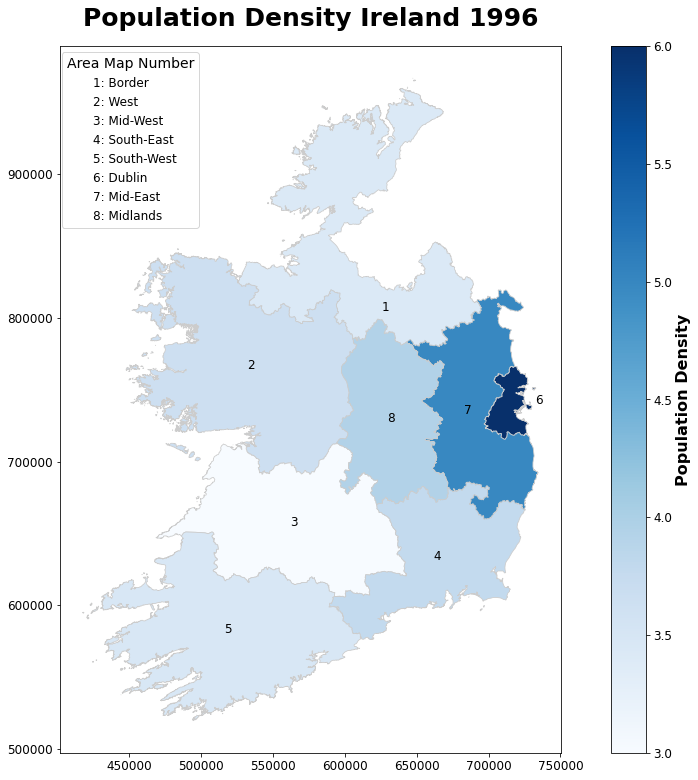

In [70]:
# I adpted the code from this source:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb

# Plotting Year 1996
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map1996
mrg1996 = gdf.set_index('NUTS3NAME').join(map1996.set_index('Area'))

# Converting square meters to square kilometers
mrg1996['SHAPE_Area'] = mrg1996['SHAPE_Area'] / 1000000

# Calculating population density
mrg1996['Pop_Density'] = mrg1996['Population'] / mrg1996['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg1996['Pop_Density_scaled'] = mrg1996['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg1996.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg1996.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg1996.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 1996', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [71]:
mrg1996

OBJECTID_1 NUTS1 NUTS1NAME NUTS2             NUTS2NAME  NUTS3  \
NUTS3NAME                                                                   
Border               1    IE   Ireland  IE04  Northern and Western  IE041   
West                 2    IE   Ireland  IE04  Northern and Western  IE042   
Mid-West             3    IE   Ireland  IE05              Southern  IE051   
South-East           4    IE   Ireland  IE05              Southern  IE052   
South-West           5    IE   Ireland  IE05              Southern  IE053   
Dublin               6    IE   Ireland  IE06   Eastern and Midland  IE061   
Mid-East             7    IE   Ireland  IE06   Eastern and Midland  IE062   
Midlands             8    IE   Ireland  IE06   Eastern and Midland  IE063   

                                            GUID    SHAPE_Leng    SHAPE_Area  \
NUTS3NAME                                                                      
Border      B1A65D7C-1984-4A87-AD58-0E846812C992  2.376811e+06  11510.209483   
West        A69CA800-8D87-4920-A7C1-50426A1D39B4  2.851487e+06  14280.718711   
Mid-West    42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78  8.647434e+05  10507.423875   
South-East  27C93D4E-AD0E-4B0C-8FA8-3566AEEDA5CC  9.134367e+05   7195.649606   
South-West  604546A1-A856-4B9B-AD46-E88B27C27155  2.372816e+06  12303.973347   
Dublin      F97E459B-57ED-49C0-8A28-2BC1C7F08E88  3.306883e+05    926.170974   
Mid-East    8E4862CC-7E43-4BF5-A4EF-B2D5ECBA61EF  8.463175e+05   6888.621453   
Midlands    B26C8BAA-F3C5-49A9-B74E-D7FED1823E65  6.234747e+05   6648.679868   

                                                     geometry  Year  \
NUTS3NAME                                                             
Border      MULTIPOLYGON (((647223.812 966808.938, 647226....  1996   
West        MULTIPOLYGON (((497858.799 703047.251, 498064....  1996   
Mid-West    MULTIPOLYGON (((468764.092 647302.732, 468611....  1996   
South-East  MULTIPOLYGON (((616432.584 577036.626, 616395....  1996   
South-West  MULTIPOLYGON (((497699.643 523320.222, 497892....  1996   
Dublin      MULTIPOLYGON (((727936.153 726402.351, 727861....  1996   
Mid-East    POLYGON ((708084.443 819557.969, 708154.474 81...  1996   
Midlands    POLYGON ((623194.082 799193.724, 623350.489 79...  1996   

            Population  Pop_Density  Pop_Density_scaled  
NUTS3NAME                                                
Border        352400.0    30.616298            3.421532  
West          546700.0    38.282387            3.644990  
Mid-West      205500.0    19.557601            2.973364  
South-East    317000.0    44.054396            3.785425  
South-West    391500.0    31.818990            3.460063  
Dublin        407300.0   439.767615            6.086246  
Mid-East     1058300.0   153.630158            5.034548  
Midlands      347400.0    52.250974            3.956059

In [72]:
# Showing relevant values for 1996:
mrg1996.reset_index(inplace=True)
mrg_1996 = mrg1996[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_1996.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_1996

Year   NUTS3NAME  SHAPE_Area_Km2  Population  Pop_Density  \
0  1996      Border    11510.209483    352400.0    30.616298   
1  1996        West    14280.718711    546700.0    38.282387   
2  1996    Mid-West    10507.423875    205500.0    19.557601   
3  1996  South-East     7195.649606    317000.0    44.054396   
4  1996  South-West    12303.973347    391500.0    31.818990   
5  1996      Dublin      926.170974    407300.0   439.767615   
6  1996    Mid-East     6888.621453   1058300.0   153.630158   
7  1996    Midlands     6648.679868    347400.0    52.250974   

   Pop_Density_scaled  
0            3.421532  
1            3.644990  
2            2.973364  
3            3.785425  
4            3.460063  
5            6.086246  
6            5.034548  
7            3.956059

Population density map for 2017

In [73]:
map2017

Year        Area  Population
168  2017      Border    528100.0
169  2017      Dublin   1350000.0
170  2017    Mid-East    571100.0
171  2017    Mid-West    387400.0
172  2017    Midlands    297100.0
173  2017  South-East    515300.0
174  2017  South-West    691400.0
175  2017        West    452200.0

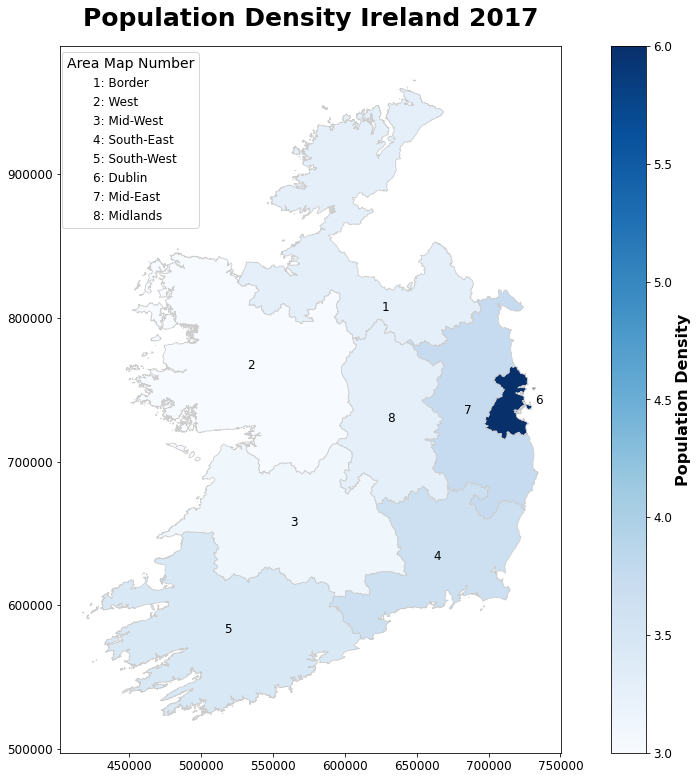

In [74]:
# I adpted the code from this source:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb


# Plotting Year 2017
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map2017
mrg2017 = gdf.set_index('NUTS3NAME').join(map2017.set_index('Area'))

# Converting square meters to square kilometers
mrg2017['SHAPE_Area'] = mrg2017['SHAPE_Area'] / 1000000

# Calculating population density
mrg2017['Pop_Density'] = mrg2017['Population'] / mrg2017['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg2017['Pop_Density_scaled'] = mrg2017['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg2017.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg2017.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg2017.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 2017', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [75]:
# Showing relevant values for 2017:
mrg2017.reset_index(inplace=True)
mrg_2017 = mrg2017[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_2017.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_2017

Year   NUTS3NAME  SHAPE_Area_Km2  Population  Pop_Density  \
0  2017      Border    11510.209483    528100.0    45.881007   
1  2017        West    14280.718711    452200.0    31.665073   
2  2017    Mid-West    10507.423875    387400.0    36.869170   
3  2017  South-East     7195.649606    515300.0    71.612714   
4  2017  South-West    12303.973347    691400.0    56.193230   
5  2017      Dublin      926.170974   1350000.0  1457.614240   
6  2017    Mid-East     6888.621453    571100.0    82.904831   
7  2017    Midlands     6648.679868    297100.0    44.685563   

   Pop_Density_scaled  
0            3.826051  
1            3.455214  
2            3.607376  
3            4.271273  
4            4.028796  
5            7.284556  
6            4.417693  
7            3.799650

Loading csv PEA04.20231004T131011.csv, we need to get 2023 to see how the map looks like.

In [76]:
# Loading the dataset:
df3=pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA04/CSV/1.0/en')

In [77]:
df3.head()

STATISTIC                          STATISTIC Label  TLIST(A1)  Year  \
0     PEA04  Estimated Population (Persons in April)       2011  2011   
1     PEA04  Estimated Population (Persons in April)       2011  2011   
2     PEA04  Estimated Population (Persons in April)       2011  2011   
3     PEA04  Estimated Population (Persons in April)       2011  2011   
4     PEA04  Estimated Population (Persons in April)       2011  2011   

  C02076V02508    Age Group C02199V02655         Sex  \
0          205  0 - 4 years            -  Both sexes   
1          205  0 - 4 years            -  Both sexes   
2          205  0 - 4 years            -  Both sexes   
3          205  0 - 4 years            -  Both sexes   
4          205  0 - 4 years            -  Both sexes   

                           C02196V04140      Region      UNIT  VALUE  
0                                     -       State  Thousand  356.0  
1  B1A65D7C-1984-4A87-AD58-0E846812C992      Border  Thousand   30.7  
2  A69CA800-8D87-4920-A7C1-50426A1D39B4        West  Thousand   32.6  
3  42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78    Mid-West  Thousand   35.0  
4  27C93D4E-AD0E-4B0C-8FA8-3566AEEDA5CC  South-East  Thousand   32.0

In [78]:

# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df3_col_drop = ['STATISTIC Label','UNIT']
df3.drop(df3_col_drop ,axis=1, inplace=True) 

In [79]:
df3['VALUE'] = df3['VALUE'].apply(lambda x: x * 1000)

In [80]:
# Renaming columns
df3 = df3.rename(columns={'Age Group': 'Age_Group','Region':'Area','VALUE':'Population'})

In [81]:
df3.head()

STATISTIC  TLIST(A1)  Year C02076V02508    Age_Group C02199V02655  \
0     PEA04       2011  2011          205  0 - 4 years            -   
1     PEA04       2011  2011          205  0 - 4 years            -   
2     PEA04       2011  2011          205  0 - 4 years            -   
3     PEA04       2011  2011          205  0 - 4 years            -   
4     PEA04       2011  2011          205  0 - 4 years            -   

          Sex                          C02196V04140        Area  Population  
0  Both sexes                                     -       State    356000.0  
1  Both sexes  B1A65D7C-1984-4A87-AD58-0E846812C992      Border     30700.0  
2  Both sexes  A69CA800-8D87-4920-A7C1-50426A1D39B4        West     32600.0  
3  Both sexes  42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78    Mid-West     35000.0  
4  Both sexes  27C93D4E-AD0E-4B0C-8FA8-3566AEEDA5CC  South-East     32000.0

In [82]:
df3 = df3[~((df3['Year'] != 2023) |(df3['Sex'] == 'Both sexes') | (df3['Area'] == 'State') | (df3['Age_Group'] == 'All ages'))]

Change Midland to Midland to match with .shp file

In [83]:
df3['Area'] = df3['Area'].str.replace('Midland', 'Midlands')

In [84]:
map2023 = df3.groupby(['Year','Area'])['Population'].sum().reset_index()

In [85]:
map2023

Year        Area  Population
0  2023      Border    432000.0
1  2023      Dublin   1501300.0
2  2023    Mid-East    777200.0
3  2023    Mid-West    519500.0
4  2023    Midlands    324700.0
5  2023  South-East    468600.0
6  2023  South-West    757200.0
7  2023        West    501000.0

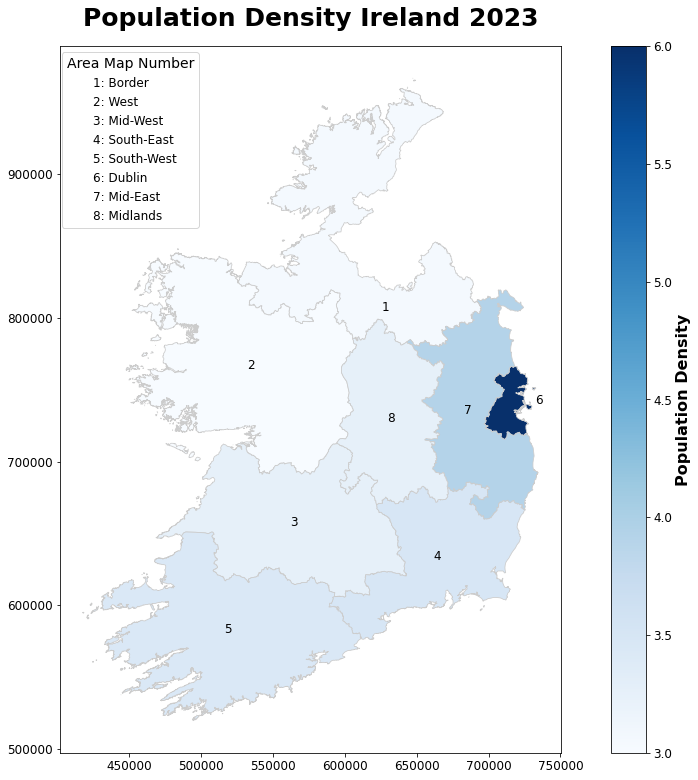

In [86]:
# I adpted the code from this source:
# Source code: https://github.com/beepscore/census_play/blob/master/us_states.ipynb


# Plotting Year 2023
shapefile_path = "..\\Ireland_map\\NUTS3_Boundaries_Gen_50m___2015.shp"
gdf = gpd.read_file(shapefile_path)

# Merging shapefile with map2023
mrg2023 = gdf.set_index('NUTS3NAME').join(map2023.set_index('Area'))

# Converting square meters to square kilometers
mrg2023['SHAPE_Area'] = mrg2023['SHAPE_Area'] / 1000000

# Calculating population density
mrg2023['Pop_Density'] = mrg2023['Population'] / mrg2023['SHAPE_Area']

# Normalizing Population density otherwise, map is blank with Dublin very blue...
mrg2023['Pop_Density_scaled'] = mrg2023['Pop_Density'].apply(lambda x: 1 if x == 0 else np.log(x))

# Plotting the  map
fig, ax = plt.subplots(figsize=(18,13))
mrg2023.plot(column='Pop_Density_scaled', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Assigning a legend number to each of the areas
map_numbers = mrg2023.index.tolist()
legend_patches = [mpatches.Patch(label=f"{i + 1}: {map_numbers[i]}") for i in range(len(map_numbers))]
legend_title = 'Area Map Number'
legend = ax.legend(handles=legend_patches, title=legend_title, loc='upper right', bbox_to_anchor=(0.289, 1),
                   handlelength=0, fontsize=12, title_fontsize=14)

# Iterating to assign numbers into the map
for idx, row in mrg2023.iterrows():
    centroid = row['geometry'].centroid
    if idx == 'Dublin':         #Adjusting number 6 Dublin, due to color legend is not visible on default position
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(30, 5), textcoords="offset points")
    elif idx == 'Border':       #Adjusting number 1 Border, by default falls under Nothern Ireland....
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(25, -70), textcoords="offset points")
    elif idx == 'Mid-East':     #Adjusting number 7 Mid-East, very clos to Dublin, I want to avoid confusion.
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center', xytext=(-10, 0), textcoords="offset points")
    else:
        ax.annotate(text=str(map_numbers.index(idx) + 1), xy=(centroid.x, centroid.y), color='black', fontsize=12,
                    ha='center', va='center')
# Color and Title

plt.title('Population Density Ireland 2023', loc="center", pad=20, fontsize=25, fontweight="bold");
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=3, vmax=6))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density',fontsize=16, fontweight="bold")
cbar.ax.tick_params(labelsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [87]:
# Showing relevant values for 2023:
mrg2023.reset_index(inplace=True)
mrg_2023 = mrg2023[['Year', 'NUTS3NAME', 'SHAPE_Area', 'Population', 'Pop_Density','Pop_Density_scaled']].copy()
mrg_2023.rename(columns={'SHAPE_Area': 'SHAPE_Area_Km2'}, inplace=True)
mrg_2023

Year   NUTS3NAME  SHAPE_Area_Km2  Population  Pop_Density  \
0  2023      Border    11510.209483    432000.0    37.531897   
1  2023        West    14280.718711    501000.0    35.082268   
2  2023    Mid-West    10507.423875    519500.0    49.441234   
3  2023  South-East     7195.649606    468600.0    65.122682   
4  2023  South-West    12303.973347    757200.0    61.541096   
5  2023      Dublin      926.170974   1501300.0  1620.975006   
6  2023    Mid-East     6888.621453    777200.0   112.823735   
7  2023    Midlands     6648.679868    324700.0    48.836763   

   Pop_Density_scaled  
0            3.625191  
1            3.557696  
2            3.900785  
3            4.176273  
4            4.119705  
5            7.390783  
6            4.725827  
7            3.888483

In [88]:
# Summarising/merging all relevant info for the maps
map_summary = pd.concat([mrg_1996,mrg_2023], ignore_index=True) 
map_summary = map_summary.rename(columns={'NUTS3NAME': 'Area'}) # Renaming NUTS3NAME to area
map_summary

Year        Area  SHAPE_Area_Km2  Population  Pop_Density  \
0   1996      Border    11510.209483    352400.0    30.616298   
1   1996        West    14280.718711    546700.0    38.282387   
2   1996    Mid-West    10507.423875    205500.0    19.557601   
3   1996  South-East     7195.649606    317000.0    44.054396   
4   1996  South-West    12303.973347    391500.0    31.818990   
5   1996      Dublin      926.170974    407300.0   439.767615   
6   1996    Mid-East     6888.621453   1058300.0   153.630158   
7   1996    Midlands     6648.679868    347400.0    52.250974   
8   2023      Border    11510.209483    432000.0    37.531897   
9   2023        West    14280.718711    501000.0    35.082268   
10  2023    Mid-West    10507.423875    519500.0    49.441234   
11  2023  South-East     7195.649606    468600.0    65.122682   
12  2023  South-West    12303.973347    757200.0    61.541096   
13  2023      Dublin      926.170974   1501300.0  1620.975006   
14  2023    Mid-East     6888.621453    777200.0   112.823735   
15  2023    Midlands     6648.679868    324700.0    48.836763   

    Pop_Density_scaled  
0             3.421532  
1             3.644990  
2             2.973364  
3             3.785425  
4             3.460063  
5             6.086246  
6             5.034548  
7             3.956059  
8             3.625191  
9             3.557696  
10            3.900785  
11            4.176273  
12            4.119705  
13            7.390783  
14            4.725827  
15            3.888483

In [89]:
mapsummary = map_summary.pivot_table(index=['Year'],columns='Area', values=['Pop_Density'], aggfunc='sum').reset_index()

In [90]:
mapsummary

Year Pop_Density                                                 \
Area            Border       Dublin    Mid-East   Mid-West   Midlands   
0     1996   30.616298   439.767615  153.630158  19.557601  52.250974   
1     2023   37.531897  1620.975006  112.823735  49.441234  48.836763   

                                       
Area South-East South-West       West  
0     44.054396  31.818990  38.282387  
1     65.122682  61.541096  35.082268

# Area breakdown:

1. **Border**: Cavan, Donegal, Leitrim, Monaghan, Sligo.

2. **Midland**: Laois, Longford, Offaly, Westmeath.

3. **West**: Galway, Mayo, Roscommon.

4. **Dublin**: Dublin City, Dún Laoghaire-Rathdown, Fingal, South Dublin.

5. **Mid-East**: Kildare, Louth, Meath, Wicklow.

6. **Mid-West**: Clare, Limerick, Tipperary.

7. **South-East**: Carlow, Kilkenny, Waterford, Wexford.

8. **South-West**: Cork, Kerry.

Source: https://www.cso.ie/en/methods/informationnotefordatausersrevisiontotheirishnuts2andnuts3regions/


# Migration Analysis

## EDA

In [91]:
# Loading the dataset:
df4 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA03/CSV/1.0/en')

In [92]:
# Displaying first 5 rows:
df4.head()

STATISTIC                         STATISTIC Label  TLIST(A1)  Year  \
0     PEA03  Estimated Migration (Persons in April)       1987  1987   
1     PEA03  Estimated Migration (Persons in April)       1987  1987   
2     PEA03  Estimated Migration (Persons in April)       1987  1987   
3     PEA03  Estimated Migration (Persons in April)       1987  1987   
4     PEA03  Estimated Migration (Persons in April)       1987  1987   

  C02076V03371 Age Group C02199V02655         Sex  C02542V03077  \
0            -  All ages            -  Both sexes             1   
1            -  All ages            -  Both sexes             4   
2            -  All ages            -  Both sexes             5   
3            -  All ages            1        Male             1   
4            -  All ages            1        Male             4   

        Inward or Outward Flow      UNIT  VALUE  
0                Net migration  Thousand  -23.0  
1  Emigrants: All destinations  Thousand   40.2  
2      Immigrants: All origins  Thousand   17.2  
3                Net migration  Thousand    NaN  
4  Emigrants: All destinations  Thousand    NaN

In [93]:
# Getting df info, we can see we are getting null values for Value:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC               1998 non-null   object 
 1   STATISTIC Label         1998 non-null   object 
 2   TLIST(A1)               1998 non-null   int64  
 3   Year                    1998 non-null   int64  
 4   C02076V03371            1998 non-null   object 
 5   Age Group               1998 non-null   object 
 6   C02199V02655            1998 non-null   object 
 7   Sex                     1998 non-null   object 
 8   C02542V03077            1998 non-null   int64  
 9   Inward or Outward Flow  1998 non-null   object 
 10  UNIT                    1998 non-null   object 
 11  VALUE                   1683 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 187.4+ KB


Let's drop irrelevant columns:

In [94]:
df4_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02076V03371','C02199V02655','C02542V03077','UNIT']
df4.drop(df4_col_drop ,axis=1, inplace=True) 

Column renaming:

In [95]:
# Renaming the columns
df4 = df4.rename(columns={'Age Group': 'Age_Group','Inward or Outward Flow':'Inward_or_Outward_Flow'})


Converting Population to a thousands:

In [96]:
df4['VALUE'] = df4['VALUE'].apply(lambda x: x * 1000)

We've got missing values, let's find out which categories are affected:

In [97]:
df4_NaN = df4[df4.isnull().any(axis=1)]
print("Rows with null values:")
df4_NaN.head(10)

Rows with null values:


Year      Age_Group         Sex       Inward_or_Outward_Flow  VALUE
3   1987       All ages        Male                Net migration    NaN
4   1987       All ages        Male  Emigrants: All destinations    NaN
5   1987       All ages        Male      Immigrants: All origins    NaN
6   1987       All ages      Female                Net migration    NaN
7   1987       All ages      Female  Emigrants: All destinations    NaN
8   1987       All ages      Female      Immigrants: All origins    NaN
9   1987   0 - 14 years  Both sexes                Net migration    NaN
12  1987   0 - 14 years        Male                Net migration    NaN
15  1987   0 - 14 years      Female                Net migration    NaN
18  1987  15 - 24 years  Both sexes                Net migration    NaN

In [98]:
#Function to count the NaN values per category:
def df4_NaN_Count(df4_NaN):
    for column in df4_NaN:
        counts = df4_NaN[column].value_counts()
        print(f"Occurrences for {column}:")
        print(counts)
        print("\n")


# Call the function with your DataFrame as an argument
df4_NaN_Count(df4_NaN)

Occurrences for Year:
1987    21
1988    21
1989    21
1990    21
1991    21
1992    21
1993    21
1994    21
1995    21
1996    21
1997    21
1998    21
1999    21
2000    21
2001    21
Name: Year, dtype: int64


Occurrences for Age_Group:
All ages             90
0 - 14 years         45
15 - 24 years        45
25 - 44 years        45
45 - 64 years        45
65 years and over    45
Name: Age_Group, dtype: int64


Occurrences for Sex:
Male          120
Female        120
Both sexes     75
Name: Sex, dtype: int64


Occurrences for Inward_or_Outward_Flow:
Net migration                  255
Emigrants: All destinations     30
Immigrants: All origins         30
Name: Inward_or_Outward_Flow, dtype: int64


Occurrences for VALUE:
Series([], Name: VALUE, dtype: int64)




If we combine Age Group "All Ages" and Sex "Both sexes" we can see that there are no NaN values:

In [99]:
df4 = df4[~((df4['Sex'] != 'Both sexes')  | (df4['Age_Group'] != 'All ages'))]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 1946
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    111 non-null    int64  
 1   Age_Group               111 non-null    object 
 2   Sex                     111 non-null    object 
 3   Inward_or_Outward_Flow  111 non-null    object 
 4   VALUE                   111 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ KB


In [100]:
df4

Year Age_Group         Sex       Inward_or_Outward_Flow     VALUE
0     1987  All ages  Both sexes                Net migration  -23000.0
1     1987  All ages  Both sexes  Emigrants: All destinations   40200.0
2     1987  All ages  Both sexes      Immigrants: All origins   17200.0
54    1988  All ages  Both sexes                Net migration  -41900.0
55    1988  All ages  Both sexes  Emigrants: All destinations   61100.0
...    ...       ...         ...                          ...       ...
1891  2022  All ages  Both sexes  Emigrants: All destinations   56100.0
1892  2022  All ages  Both sexes      Immigrants: All origins  107800.0
1944  2023  All ages  Both sexes                Net migration   77700.0
1945  2023  All ages  Both sexes  Emigrants: All destinations   64000.0
1946  2023  All ages  Both sexes      Immigrants: All origins  141600.0

[111 rows x 5 columns]

Using a Pivot to group all values.

In [101]:
pivot_df4 = df4.pivot_table(index=['Year'],columns='Inward_or_Outward_Flow', values='VALUE', aggfunc='sum').reset_index()

In [102]:
pivot_df4

Inward_or_Outward_Flow  Year  Emigrants: All destinations  \
0                       1987                      40200.0   
1                       1988                      61100.0   
2                       1989                      70600.0   
3                       1990                      56300.0   
4                       1991                      35300.0   
5                       1992                      33400.0   
6                       1993                      35100.0   
7                       1994                      34800.0   
8                       1995                      33100.0   
9                       1996                      31200.0   
10                      1997                      25300.0   
11                      1998                      28600.0   
12                      1999                      31500.0   
13                      2000                      26600.0   
14                      2001                      26200.0   
15                      2002                      25600.0   
16                      2003                      29300.0   
17                      2004                      26500.0   
18                      2005                      29400.0   
19                      2006                      36000.0   
20                      2007                      46300.0   
21                      2008                      49200.0   
22                      2009                      72000.0   
23                      2010                      69200.0   
24                      2011                      80600.0   
25                      2012                      83000.0   
26                      2013                      81300.0   
27                      2014                      75000.0   
28                      2015                      70000.0   
29                      2016                      66200.0   
30                      2017                      56100.0   
31                      2018                      51600.0   
32                      2019                      53100.0   
33                      2020                      50900.0   
34                      2021                      52300.0   
35                      2022                      56100.0   
36                      2023                      64000.0   

Inward_or_Outward_Flow  Immigrants: All origins  Net migration  
0                                       17200.0       -23000.0  
1                                       19200.0       -41900.0  
2                                       26700.0       -43900.0  
3                                       33300.0       -22900.0  
4                                       33300.0        -2000.0  
5                                       40700.0         7400.0  
6                                       34700.0         -400.0  
7                                       30100.0        -4700.0  
8                                       31200.0        -1900.0  
9                                       39200.0         8000.0  
10                                      44500.0        19200.0  
11                                      46000.0        17400.0  
12                                      48900.0        17300.0  
13                                      52600.0        26000.0  
14                                      59000.0        32800.0  
15                                      66900.0        41300.0  
16                                      60000.0        30700.0  
17                                      58500.0        32000.0  
18                                      84600.0        55100.0  
19                                     107800.0        71800.0  
20                                     151100.0       104800.0  
21                                     113500.0        64300.0  
22                                      73700.0         1600.0  
23                                      41800.0       -27500.0  
24                                      53300.0       -2

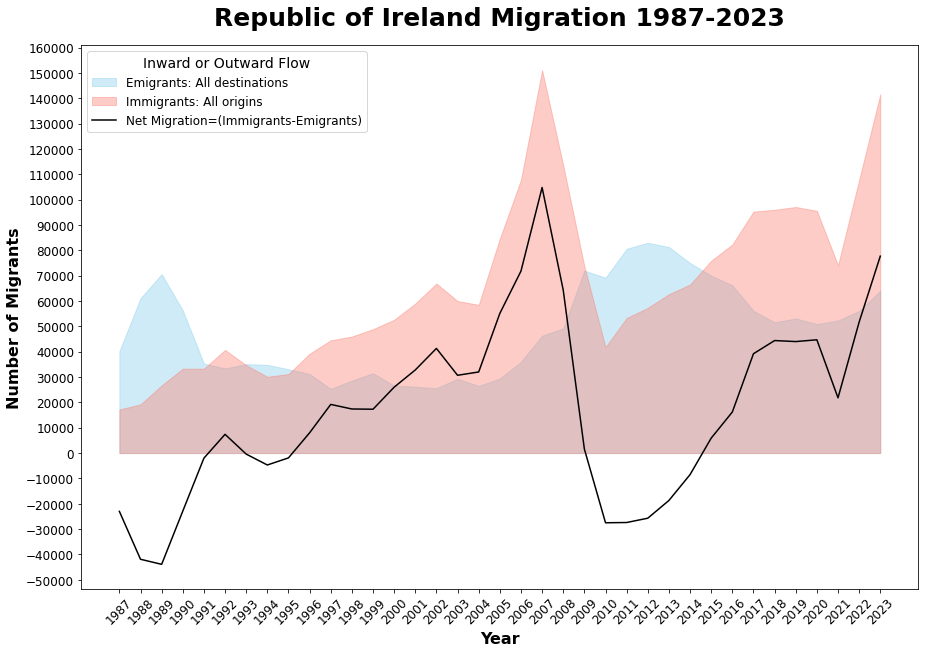

In [103]:
plt.figure(figsize=(15, 10))
plt.fill_between(pivot_df4['Year'], pivot_df4['Emigrants: All destinations'], color='skyblue', alpha=0.4, label='Emigrants: All destinations')
plt.fill_between(pivot_df4['Year'], pivot_df4['Immigrants: All origins'], color='salmon', alpha=0.4, label='Immigrants: All origins')
plt.plot(pivot_df4['Year'], pivot_df4['Net migration'], color='black', label='Net Migration=(Immigrants-Emigrants)')

# Labels
plt.title('Republic of Ireland Migration 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('Number of Migrants', fontsize=16, fontweight="bold")
plt.yticks(range(-50000, 150000+20000, 10000),fontsize=12) # Range to display more info
plt.xticks(pivot_df4['Year'],rotation=45,fontsize=12)      # Displaying all years
plt.legend(loc="upper left", fontsize=12,title='Inward or Outward Flow',title_fontsize=14)
plt.show()


# Studying migration destination/origin

## EDA

In [104]:
# Loading the dataset:
df5 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA18/CSV/1.0/en')

In [105]:
# Displaying first 5 rows:
df5.head()


STATISTIC                         STATISTIC Label  TLIST(A1)  Year  \
0     PEA18  Estimated Migration (Persons in April)       1987  1987   
1     PEA18  Estimated Migration (Persons in April)       1987  1987   
2     PEA18  Estimated Migration (Persons in April)       1987  1987   
3     PEA18  Estimated Migration (Persons in April)       1987  1987   
4     PEA18  Estimated Migration (Persons in April)       1987  1987   

  C02719V03286             Country C02199V02655         Sex  C02542V03077  \
0          GB1  United Kingdom (1)            -  Both sexes             1   
1          GB1  United Kingdom (1)            -  Both sexes             4   
2          GB1  United Kingdom (1)            -  Both sexes             5   
3          GB1  United Kingdom (1)            1        Male             1   
4          GB1  United Kingdom (1)            1        Male             4   

         Origin or Destination      UNIT  VALUE  
0                Net migration  Thousand  -13.7  
1  Emigrants: All destinations  Thousand   21.8  
2      Immigrants: All origins  Thousand    8.1  
3                Net migration  Thousand   -9.0  
4  Emigrants: All destinations  Thousand   13.1

In [106]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATISTIC              2664 non-null   object 
 1   STATISTIC Label        2664 non-null   object 
 2   TLIST(A1)              2664 non-null   int64  
 3   Year                   2664 non-null   int64  
 4   C02719V03286           2664 non-null   object 
 5   Country                2664 non-null   object 
 6   C02199V02655           2664 non-null   object 
 7   Sex                    2664 non-null   object 
 8   C02542V03077           2664 non-null   int64  
 9   Origin or Destination  2664 non-null   object 
 10  UNIT                   2664 non-null   object 
 11  VALUE                  2104 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 249.9+ KB


Let's drop irrelevant columns:

In [107]:
df5_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02719V03286','C02199V02655','C02542V03077','UNIT']
df5.drop(df5_col_drop ,axis=1, inplace=True) 

Column renaming:

In [108]:
df5 = df5.rename(columns={'Origin or Destination': 'Origin_or_Destination'})


Converting Value to a thousands:

In [109]:
df5['VALUE'] = df5['VALUE'].apply(lambda x: x * 1000)

In [110]:
df5

Year                                            Country         Sex  \
0     1987                                 United Kingdom (1)  Both sexes   
1     1987                                 United Kingdom (1)  Both sexes   
2     1987                                 United Kingdom (1)  Both sexes   
3     1987                                 United Kingdom (1)        Male   
4     1987                                 United Kingdom (1)        Male   
...    ...                                                ...         ...   
2659  2023  EU15 to EU27 (accession countries joined post ...        Male   
2660  2023  EU15 to EU27 (accession countries joined post ...        Male   
2661  2023  EU15 to EU27 (accession countries joined post ...      Female   
2662  2023  EU15 to EU27 (accession countries joined post ...      Female   
2663  2023  EU15 to EU27 (accession countries joined post ...      Female   

            Origin_or_Destination    VALUE  
0                   Net migration -13700.0  
1     Emigrants: All destinations  21800.0  
2         Immigrants: All origins   8100.0  
3                   Net migration  -9000.0  
4     Emigrants: All destinations  13100.0  
...                           ...      ...  
2659  Emigrants: All destinations   3600.0  
2660      Immigrants: All origins   3900.0  
2661                Net migration   -200.0  
2662  Emigrants: All destinations   5200.0  
2663      Immigrants: All origins   5000.0  

[2664 rows x 5 columns]

In [111]:
df5 = df5[~((df5['Sex'] != 'Both sexes')  | (df5['Origin_or_Destination'] == 'Net migration')
            | (df5['Country'] == 'All countries'))]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 1 to 2657
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   518 non-null    int64  
 1   Country                518 non-null    object 
 2   Sex                    518 non-null    object 
 3   Origin_or_Destination  518 non-null    object 
 4   VALUE                  398 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.3+ KB


In [112]:
df5

Year                                            Country         Sex  \
1     1987                                 United Kingdom (1)  Both sexes   
2     1987                                 United Kingdom (1)  Both sexes   
10    1987                                      United States  Both sexes   
11    1987                                      United States  Both sexes   
19    1987                                             Canada  Both sexes   
...    ...                                                ...         ...   
2630  2023                               Other countries (23)  Both sexes   
2647  2023                       EU14 excl Irl (UK & Ireland)  Both sexes   
2648  2023                       EU14 excl Irl (UK & Ireland)  Both sexes   
2656  2023  EU15 to EU27 (accession countries joined post ...  Both sexes   
2657  2023  EU15 to EU27 (accession countries joined post ...  Both sexes   

            Origin_or_Destination    VALUE  
1     Emigrants: All destinations  21800.0  
2         Immigrants: All origins   8100.0  
10    Emigrants: All destinations   9900.0  
11        Immigrants: All origins   3000.0  
19    Emigrants: All destinations      NaN  
...                           ...      ...  
2630      Immigrants: All origins  75800.0  
2647  Emigrants: All destinations  13900.0  
2648      Immigrants: All origins  17700.0  
2656  Emigrants: All destinations   8800.0  
2657      Immigrants: All origins   8900.0  

[518 rows x 5 columns]

In [113]:
df5['Country'] = df5['Country'].str.replace('EU15 to EU27 \(accession countries joined post 2004\)', 'EU15 to EU27 (membership after 2004)', regex=True)


In [114]:
df12 = df5.copy() #We'll be using df12 in Statistics part

In [115]:
df5e = df5[(df5['Origin_or_Destination'] == 'Emigrants: All destinations')]
df12a = df5e.copy() #We'll be using df12a in Statistics part
df5i = df5[(df5['Origin_or_Destination'] == 'Immigrants: All origins')]
df12b = df5i.copy() #We'll be using df12a in Statistics part

In [116]:
df5i 

Year                               Country         Sex  \
2     1987                    United Kingdom (1)  Both sexes   
11    1987                         United States  Both sexes   
20    1987                                Canada  Both sexes   
29    1987                             Australia  Both sexes   
38    1987                  Other countries (23)  Both sexes   
...    ...                                   ...         ...   
2612  2023                                Canada  Both sexes   
2621  2023                             Australia  Both sexes   
2630  2023                  Other countries (23)  Both sexes   
2648  2023          EU14 excl Irl (UK & Ireland)  Both sexes   
2657  2023  EU15 to EU27 (membership after 2004)  Both sexes   

        Origin_or_Destination    VALUE  
2     Immigrants: All origins   8100.0  
11    Immigrants: All origins   3000.0  
20    Immigrants: All origins      NaN  
29    Immigrants: All origins      NaN  
38    Immigrants: All origins   4000.0  
...                       ...      ...  
2612  Immigrants: All origins   7200.0  
2621  Immigrants: All origins   7700.0  
2630  Immigrants: All origins  75800.0  
2648  Immigrants: All origins  17700.0  
2657  Immigrants: All origins   8900.0  

[259 rows x 5 columns]

In [117]:
pivot_df5e = df5e.pivot_table(index=['Year'],columns='Country', values='VALUE', aggfunc='sum').reset_index()
pivot_df5e.set_index('Year', inplace=True)
pivot_df5e.head()

Country  Australia  Canada  EU14 excl Irl (UK & Ireland)  \
Year                                                       
1987           0.0     0.0                        3100.0   
1988           0.0     0.0                        2800.0   
1989           0.0     0.0                        3900.0   
1990           0.0     0.0                        5100.0   
1991           0.0     0.0                        3100.0   

Country  EU15 to EU27 (membership after 2004)  Other countries (23)  \
Year                                                                  
1987                                      0.0                5400.0   
1988                                      0.0               10200.0   
1989                                      0.0               10000.0   
1990                                      0.0                7600.0   
1991                                      0.0                4400.0   

Country  United Kingdom (1)  United States  
Year                                        
1987                21800.0         9900.0  
1988                40200.0         7900.0  
1989                48400.0         8200.0  
1990                35800.0         7700.0  
1991                23000.0         4800.0

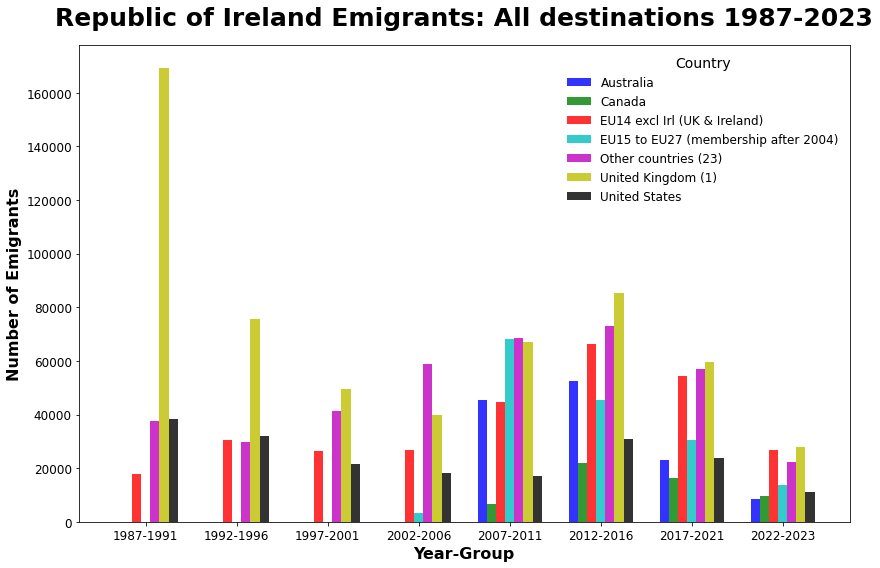

In [118]:
# Clustering every 5 years
df5j = pivot_df5e.groupby(np.arange(len(pivot_df5e)) // 5).sum();


fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(df5j)) # Creating an index to iterate over

bar_width = 0.1
opacity = 0.8
num_countries = len(df5j.columns) # Getting the count of countries 7
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, col in enumerate(df5j.columns): # Creating the artists
    rects = ax.bar(index + i * bar_width, df5j[col], bar_width, alpha=opacity, color=colors[i % len(colors)], label=col);

ax.set_xlabel('Year-Group', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Emigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Emigrants: All destinations 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
ax.set_xticks(index + bar_width * (num_countries - 1) / 2)
plt.yticks(fontsize=12)
ax.set_xticklabels([f'{pivot_df5e.index[5*i]}-{pivot_df5e.index[min(5*(i+1)-1, len(pivot_df5e)-1)]}' for i in range(len(df5j))],fontsize=12)
ax.legend(loc="best", fontsize=12,title='Country',title_fontsize=14,facecolor='white', framealpha=0)

plt.tight_layout()
plt.show()


In [119]:
df5j

Country  Australia   Canada  EU14 excl Irl (UK & Ireland)  \
0              0.0      0.0                       18000.0   
1              0.0      0.0                       30500.0   
2              0.0      0.0                       26300.0   
3              0.0      0.0                       26900.0   
4          45300.0   6700.0                       44500.0   
5          52500.0  22000.0                       66200.0   
6          23100.0  16300.0                       54400.0   
7           8600.0   9500.0                       26700.0   

Country  EU15 to EU27 (membership after 2004)  Other countries (23)  \
0                                         0.0               37600.0   
1                                         0.0               29600.0   
2                                         0.0               41200.0   
3                                      3100.0               58900.0   
4                                     68000.0               68400.0   
5                                     45400.0               73000.0   
6                                     30400.0               56800.0   
7                                     13800.0               22400.0   

Country  United Kingdom (1)  United States  
0                  169200.0        38500.0  
1                   75500.0        32100.0  
2                   49600.0        21400.0  
3                   39800.0        18100.0  
4                   67200.0        17200.0  
5                   85500.0        31000.0  
6                   59500.0        23700.0  
7                   28000.0        11200.0

In [120]:
pivot_df5i = df5i.pivot_table(index=['Year'],columns='Country', values='VALUE', aggfunc='sum').reset_index()
pivot_df5i.set_index('Year', inplace=True)
pivot_df5i.head()

Country  Australia  Canada  EU14 excl Irl (UK & Ireland)  \
Year                                                       
1987           0.0     0.0                        2200.0   
1988           0.0     0.0                        2600.0   
1989           0.0     0.0                        3600.0   
1990           0.0     0.0                        5000.0   
1991           0.0     0.0                        4200.0   

Country  EU15 to EU27 (membership after 2004)  Other countries (23)  \
Year                                                                  
1987                                      0.0                4000.0   
1988                                      0.0                3400.0   
1989                                      0.0                5800.0   
1990                                      0.0                6900.0   
1991                                      0.0                6100.0   

Country  United Kingdom (1)  United States  
Year                                        
1987                 8100.0         3000.0  
1988                 9900.0         3400.0  
1989                14200.0         3100.0  
1990                17600.0         3900.0  
1991                18700.0         4300.0

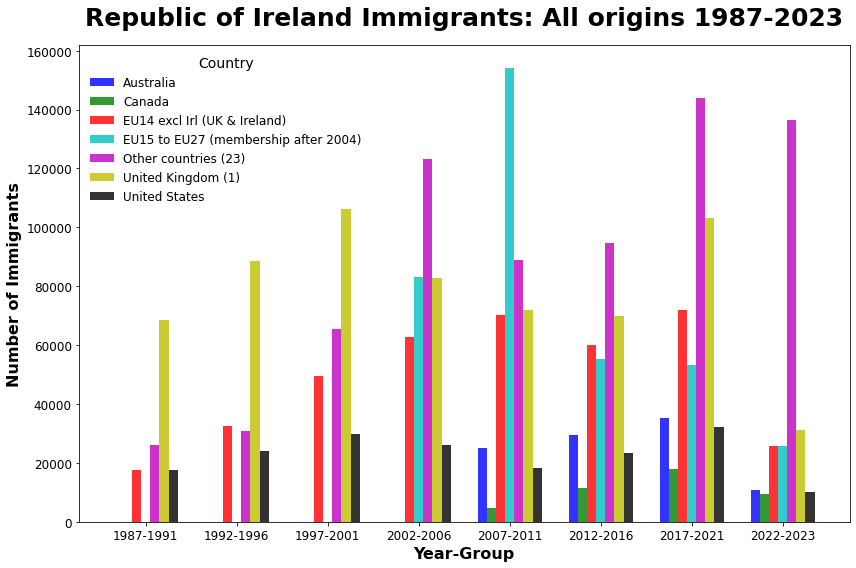

In [121]:
# Clustering every 5 years
df5h = pivot_df5i.groupby(np.arange(len(pivot_df5i)) // 5).sum();


fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(df5h)) # Creating an index to iterate over

bar_width = 0.1
opacity = 0.8
num_countries = len(df5h.columns) # Getting the count of countries 7
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, col in enumerate(df5h.columns): # Creating the artists
    rects = ax.bar(index + i * bar_width, df5h[col], bar_width, alpha=opacity, color=colors[i % len(colors)], label=col);

ax.set_xlabel('Year-Group', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Immigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Immigrants: All origins 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
ax.set_xticks(index + bar_width * (num_countries - 1) / 2)
plt.yticks(fontsize=12)
ax.set_xticklabels([f'{pivot_df5i.index[5*i]}-{pivot_df5i.index[min(5*(i+1)-1, len(pivot_df5i)-1)]}' for i in range(len(df5h))],fontsize=12)
ax.legend(loc="best", fontsize=12,title='Country',title_fontsize=14,facecolor='white', framealpha=0)

plt.tight_layout()
plt.show()


In [122]:
df5h

Country  Australia   Canada  EU14 excl Irl (UK & Ireland)  \
0              0.0      0.0                       17600.0   
1              0.0      0.0                       32400.0   
2              0.0      0.0                       49400.0   
3              0.0      0.0                       62900.0   
4          25200.0   4800.0                       70400.0   
5          29500.0  11600.0                       60100.0   
6          35400.0  18000.0                       72000.0   
7          10800.0   9400.0                       25800.0   

Country  EU15 to EU27 (membership after 2004)  Other countries (23)  \
0                                         0.0               26200.0   
1                                         0.0               30900.0   
2                                         0.0               65600.0   
3                                     83000.0              123100.0   
4                                    154100.0               88800.0   
5                                     55400.0               94800.0   
6                                     53300.0              143900.0   
7                                     25700.0              136300.0   

Country  United Kingdom (1)  United States  
0                   68500.0        17700.0  
1                   88600.0        24100.0  
2                  106100.0        29900.0  
3                   82800.0        26000.0  
4                   72000.0        18300.0  
5                   69900.0        23400.0  
6                  103300.0        32100.0  
7                   31200.0        10200.0

# Notes:

1. **EU14 excl Irl (UK & Ireland):** Austria, Belgium, Denmark, Finland, France, Germany, Greece, Italy, Luxembourg, the Netherlands, Portugal, Spain and Sweden.
2. **EU15 to EU27 (membership after 2004):** Bulgaria, Czech Republic, Estonia, Croatia, Cyprus, Latvia, Lithuania, Hungary, Malta, Poland, Romania, Slovenia and Slovakia.
3. **Other countries (23):** Rest of the world.





# Migration by Education Level

In [123]:
# Loading the dataset:
df6 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA19/CSV/1.0/en')

In [124]:
df6.head()

STATISTIC                                    STATISTIC Label  TLIST(A1)  \
0     PEA19  Estimated Migration Aged 15 Years and Over  (P...       2009   
1     PEA19  Estimated Migration Aged 15 Years and Over  (P...       2009   
2     PEA19  Estimated Migration Aged 15 Years and Over  (P...       2009   
3     PEA19  Estimated Migration Aged 15 Years and Over  (P...       2009   
4     PEA19  Estimated Migration Aged 15 Years and Over  (P...       2009   

   Year C02199V02655         Sex  C02757V03327             Education Level  \
0  2009            -  Both sexes            45  Higher secondary and below   
1  2009            -  Both sexes            45  Higher secondary and below   
2  2009            -  Both sexes            45  Higher secondary and below   
3  2009            -  Both sexes            65           Post leaving cert   
4  2009            -  Both sexes            65           Post leaving cert   

   C02542V03077       Inward or Outward Flow      UNIT  VALUE  
0             1                Net migration  Thousand   -9.7  
1             4  Emigrants: All destinations  Thousand   31.6  
2             5      Immigrants: All origins  Thousand   21.9  
3             1                Net migration  Thousand   -0.2  
4             4  Emigrants: All destinations  Thousand    6.7

Let's drop irrelevant columns:

In [125]:
df6_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02757V03327','C02199V02655','C02542V03077','UNIT']
df6.drop(df6_col_drop ,axis=1, inplace=True)

In [126]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    630 non-null    int64  
 1   Sex                     630 non-null    object 
 2   Education Level         630 non-null    object 
 3   Inward or Outward Flow  630 non-null    object 
 4   VALUE                   630 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.7+ KB


Column renaming:

In [127]:
df6 = df6.rename(columns={'Education Level': 'Education_Level','Inward or Outward Flow': 'Inward_or_Outward_Flow'})

In [128]:
df15 = df6.copy() # Creating df for Statistics part Binomial Distribution

Converting Value to a thousands:


In [129]:
df6['VALUE'] = df6['VALUE'].apply(lambda x: x * 1000)

In [130]:
df6

Year         Sex             Education_Level  \
0    2009  Both sexes  Higher secondary and below   
1    2009  Both sexes  Higher secondary and below   
2    2009  Both sexes  Higher secondary and below   
3    2009  Both sexes           Post leaving cert   
4    2009  Both sexes           Post leaving cert   
..    ...         ...                         ...   
625  2022      Female                  Not stated   
626  2022      Female                  Not stated   
627  2022      Female                 All persons   
628  2022      Female                 All persons   
629  2022      Female                 All persons   

          Inward_or_Outward_Flow    VALUE  
0                  Net migration  -9700.0  
1    Emigrants: All destinations  31600.0  
2        Immigrants: All origins  21900.0  
3                  Net migration   -200.0  
4    Emigrants: All destinations   6700.0  
..                           ...      ...  
625  Emigrants: All destinations   1300.0  
626      Immigrants: All origins   3900.0  
627                Net migration  32700.0  
628  Emigrants: All destinations  22600.0  
629      Immigrants: All origins  55400.0  

[630 rows x 5 columns]

Breaking down df6 into df6a & df6b, first for Emigrants: All destinations and second for Immigrants: All origins. Let's find out which level of education emigrants/immigrants hold.

In [131]:
df6a= df6[(df6['Sex'] == 'Both sexes')  & (df6['Inward_or_Outward_Flow'] == 'Emigrants: All destinations') &
           (df6['Education_Level'] != 'All persons')]
            
            
df6a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 595
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Sex                     56 non-null     object 
 2   Education_Level         56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [132]:
df6b = df6[(df6['Sex'] == 'Both sexes')  & (df6['Inward_or_Outward_Flow'] == 'Immigrants: All origins') &
           (df6['Education_Level'] != 'All persons')]
            
df6b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 2 to 596
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Sex                     56 non-null     object 
 2   Education_Level         56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [133]:
df13a = df6a.copy() # We'll be using this at the Statistics part
df13b = df6b.copy() # We'll be using this at the Statistics part

Creating pivots to plot bar charts according to Education Level

In [134]:
pivot_df6a = df6a.pivot_table(index=['Year'],columns='Education_Level', values='VALUE', aggfunc='sum').reset_index()
pivot_df6a.reset_index(inplace=True,drop=True)

In [135]:
pivot_df6a

Education_Level  Year  Higher secondary and below  Not stated  \
0                2009                     31600.0      7000.0   
1                2010                     26700.0      5400.0   
2                2011                     30100.0      3300.0   
3                2012                     28200.0      4300.0   
4                2013                     32200.0      2500.0   
5                2014                     23500.0      5700.0   
6                2015                     20100.0      4200.0   
7                2016                     20000.0      6800.0   
8                2017                     20200.0      6100.0   
9                2018                     12800.0      6600.0   
10               2019                     14600.0      3800.0   
11               2020                     16900.0      2600.0   
12               2021                     11500.0      4300.0   
13               2022                     15700.0      3900.0   

Education_Level  Post leaving cert  Third level  
0                           6700.0      24400.0  
1                           7100.0      27900.0  
2                           6200.0      35800.0  
3                           6000.0      34900.0  
4                           5700.0      29900.0  
5                           5400.0      30100.0  
6                           3300.0      31000.0  
7                           3600.0      25500.0  
8                           2400.0      27900.0  
9                           4000.0      26500.0  
10                          2500.0      28300.0  
11                          3600.0      26300.0  
12                          2700.0      32500.0  
13                          3200.0      30700.0

In [136]:
pivot_df6a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        14 non-null     int64  
 1   Higher secondary and below  14 non-null     float64
 2   Not stated                  14 non-null     float64
 3   Post leaving cert           14 non-null     float64
 4   Third level                 14 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 688.0 bytes


In [137]:
pivot_df6ab = pivot_df6a.drop(columns=['Year'])

In [138]:
pivot_df6ab

Education_Level  Higher secondary and below  Not stated  Post leaving cert  \
0                                   31600.0      7000.0             6700.0   
1                                   26700.0      5400.0             7100.0   
2                                   30100.0      3300.0             6200.0   
3                                   28200.0      4300.0             6000.0   
4                                   32200.0      2500.0             5700.0   
5                                   23500.0      5700.0             5400.0   
6                                   20100.0      4200.0             3300.0   
7                                   20000.0      6800.0             3600.0   
8                                   20200.0      6100.0             2400.0   
9                                   12800.0      6600.0             4000.0   
10                                  14600.0      3800.0             2500.0   
11                                  16900.0      2600.0             3600.0   
12                                  11500.0      4300.0             2700.0   
13                                  15700.0      3900.0             3200.0   

Education_Level  Third level  
0                    24400.0  
1                    27900.0  
2                    35800.0  
3                    34900.0  
4                    29900.0  
5                    30100.0  
6                    31000.0  
7                    25500.0  
8                    27900.0  
9                    26500.0  
10                   28300.0  
11                   26300.0  
12                   32500.0  
13                   30700.0

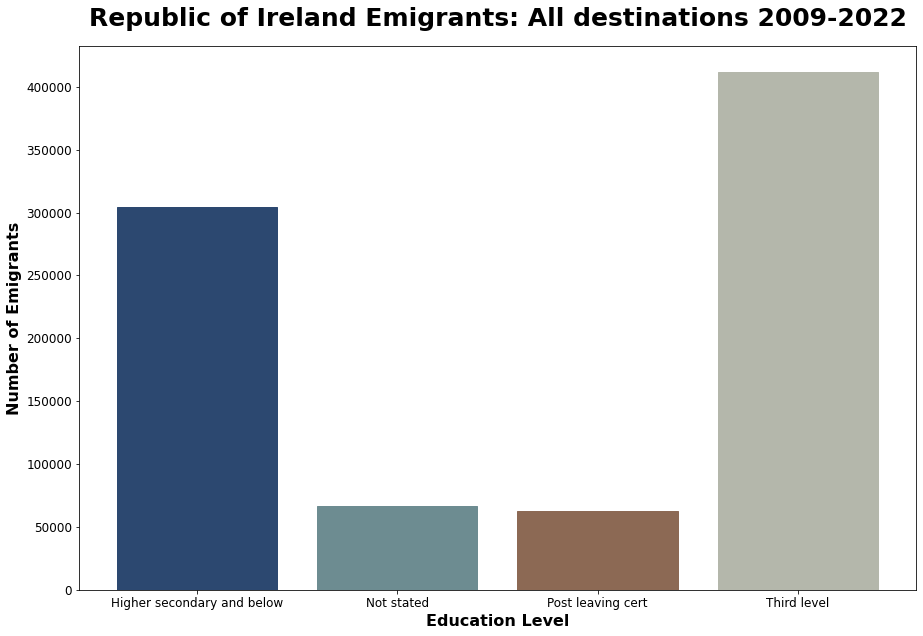

In [139]:
# summing up
pivot_df6absum = pivot_df6ab.sum()

categories = ['Higher secondary and below', 'Not stated', 'Post leaving cert', 'Third level']
values_df6absum = pivot_df6absum.values

# friendly colors
coloringab = ['#2C4870', '#6D8C91', '#8C6954', '#B4B7AB']

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(categories, values_df6absum)

ax.set_xlabel('Education Level', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Emigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Emigrants: All destinations 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# formating bars
for bar, color in zip(bars, coloringab):
    bar.set_color(color)

plt.show()

In [140]:
pivot_df6absum

Education_Level
Higher secondary and below    304100.0
Not stated                     66500.0
Post leaving cert              62400.0
Third level                   411700.0
dtype: float64

In [141]:
pivot_df6b = df6b.pivot_table(index=['Year'],columns='Education_Level', values='VALUE', aggfunc='sum').reset_index()
pivot_df6b.reset_index(inplace=True,drop=True)

In [142]:
pivot_df6bb = pivot_df6b.drop(columns=['Year'])

In [143]:
pivot_df6bb

Education_Level  Higher secondary and below  Not stated  Post leaving cert  \
0                                   21900.0      8300.0             6500.0   
1                                   15100.0      2900.0             2500.0   
2                                   17300.0      2100.0             5300.0   
3                                   16100.0      2700.0             3700.0   
4                                   17200.0      3400.0             2400.0   
5                                   15100.0      5800.0             3900.0   
6                                   17700.0      8600.0             2700.0   
7                                   18000.0      3400.0             8700.0   
8                                   16800.0      6800.0             3700.0   
9                                   18400.0      3400.0             8800.0   
10                                  16900.0      4700.0             4600.0   
11                                  14300.0      2300.0             3600.0   
12                                   9900.0      2200.0             5600.0   
13                                  21000.0      7700.0             3100.0   

Education_Level  Third level  
0                    32500.0  
1                    19500.0  
2                    22400.0  
3                    28200.0  
4                    32000.0  
5                    35100.0  
6                    37200.0  
7                    42400.0  
8                    48600.0  
9                    49200.0  
10                   53000.0  
11                   56900.0  
12                   42600.0  
13                   70300.0

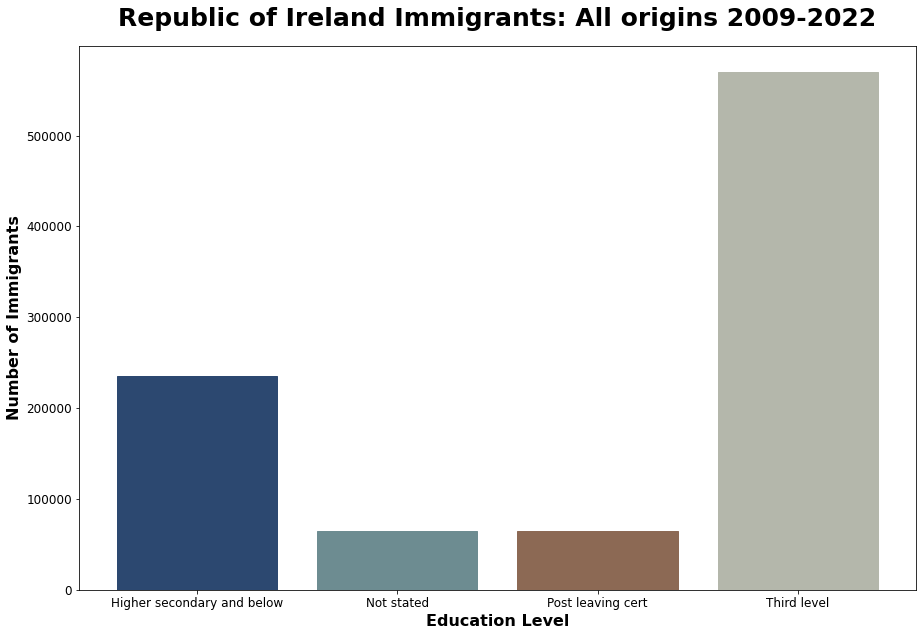

In [144]:
# summing up
pivot_df6bbsum = pivot_df6bb.sum()

categories = ['Higher secondary and below', 'Not stated', 'Post leaving cert', 'Third level']
values_df6bbsum = pivot_df6bbsum.values

# friendly colors
coloringbb = ['#2C4870', '#6D8C91', '#8C6954', '#B4B7AB']

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(categories, values_df6bbsum)

ax.set_xlabel('Education Level', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Immigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Immigrants: All origins 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# formating bars
for bar, color in zip(bars, coloringbb):
    bar.set_color(color)

plt.show()

In [145]:
pivot_df6bbsum

Education_Level
Higher secondary and below    235700.0
Not stated                     64300.0
Post leaving cert              65100.0
Third level                   569900.0
dtype: float64

# Migration by Economic Status

In [146]:
# Loading the dataset:
df7 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA20/CSV/1.0/en')

In [147]:
df7.head()

STATISTIC                                    STATISTIC Label  TLIST(A1)  \
0     PEA20  Estimated Migration Aged 15 Years and Over (Pe...       2009   
1     PEA20  Estimated Migration Aged 15 Years and Over (Pe...       2009   
2     PEA20  Estimated Migration Aged 15 Years and Over (Pe...       2009   
3     PEA20  Estimated Migration Aged 15 Years and Over (Pe...       2009   
4     PEA20  Estimated Migration Aged 15 Years and Over (Pe...       2009   

   Year  C02704V03272 Principal Economic Status C02199V02655         Sex  \
0  2009            -6               All persons            -  Both sexes   
1  2009            -6               All persons            -  Both sexes   
2  2009            -6               All persons            -  Both sexes   
3  2009            -6               All persons            1        Male   
4  2009            -6               All persons            1        Male   

   C02542V03077       Inward or Outward Flow      UNIT  VALUE  
0             1                Net migration  Thousand   -0.5  
1             4  Emigrants: All destinations  Thousand   69.7  
2             5      Immigrants: All origins  Thousand   69.1  
3             1                Net migration  Thousand   -6.2  
4             4  Emigrants: All destinations  Thousand   40.8

Let's drop irrelevant columns:

In [148]:
df7_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02704V03272','C02199V02655','C02542V03077','UNIT']
df7.drop(df7_col_drop ,axis=1, inplace=True)

In [149]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       630 non-null    int64  
 1   Principal Economic Status  630 non-null    object 
 2   Sex                        630 non-null    object 
 3   Inward or Outward Flow     630 non-null    object 
 4   VALUE                      630 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.7+ KB


Column renaming:

In [150]:
df7 = df7.rename(columns={'Principal Economic Status': 'Economic_Status','Inward or Outward Flow': 'Inward_or_Outward_Flow'})

Converting Value to a thousands:

In [151]:
df7['VALUE'] = df7['VALUE'].apply(lambda x: x * 1000)

In [152]:
df7.head()

Year Economic_Status         Sex       Inward_or_Outward_Flow    VALUE
0  2009     All persons  Both sexes                Net migration   -500.0
1  2009     All persons  Both sexes  Emigrants: All destinations  69700.0
2  2009     All persons  Both sexes      Immigrants: All origins  69100.0
3  2009     All persons        Male                Net migration  -6200.0
4  2009     All persons        Male  Emigrants: All destinations  40800.0

Breaking down df7 into df7a & df7b, first one for *Emigrants: All destinations* and second one for *Immigrants: All origins*. Let's find out which *Economic Status* emigrants/immigrants hold.

In [153]:
df7a= df7[(df7['Sex'] == 'Both sexes')  & (df7['Inward_or_Outward_Flow'] == 'Emigrants: All destinations') &
           (df7['Economic_Status'] != 'All persons')]
            
            
df7a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 10 to 622
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Economic_Status         56 non-null     object 
 2   Sex                     56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [154]:
df14a = df7a.copy() # We need df14a for Statistics part

In [155]:
df7b = df7[(df7['Sex'] == 'Both sexes')  & (df7['Inward_or_Outward_Flow'] == 'Immigrants: All origins') &
           (df7['Economic_Status'] != 'All persons')]
            
df7b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 11 to 623
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Economic_Status         56 non-null     object 
 2   Sex                     56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [156]:
df14b = df7b.copy() # We need df14b for Statistics part

Creating pivots to plot bar charts according to *Economic Status*:

In [157]:
pivot_df7a = df7a.pivot_table(index=['Year'],columns='Economic_Status', values='VALUE', aggfunc='sum').reset_index()
pivot_df7a.reset_index(inplace=True,drop=True)

In [158]:
pivot_df7a

Economic_Status  Year  All unemployed persons  Other economic status  \
0                2009                 10800.0                 5100.0   
1                2010                 16400.0                 5500.0   
2                2011                 15200.0                 6500.0   
3                2012                 16600.0                 5000.0   
4                2013                 14800.0                 7000.0   
5                2014                 10500.0                 4900.0   
6                2015                  8000.0                 5000.0   
7                2016                  5800.0                 6800.0   
8                2017                  5700.0                 5600.0   
9                2018                  6500.0                 6200.0   
10               2019                  3200.0                 4000.0   
11               2020                  3000.0                 4000.0   
12               2021                  5200.0                 4900.0   
13               2022                  4100.0                 4400.0   

Economic_Status  Persons at work  Student or pupil  
0                        41300.0           12500.0  
1                        31100.0           14200.0  
2                        36200.0           17600.0  
3                        34400.0           17500.0  
4                        31200.0           17200.0  
5                        24700.0           24800.0  
6                        28100.0           17500.0  
7                        23500.0           19900.0  
8                        26600.0           18600.0  
9                        27900.0            9400.0  
10                       29700.0           12300.0  
11                       28600.0           13800.0  
12                       29900.0           11000.0  
13                       32000.0           13000.0

In [159]:
pivot_df7a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    14 non-null     int64  
 1   All unemployed persons  14 non-null     float64
 2   Other economic status   14 non-null     float64
 3   Persons at work         14 non-null     float64
 4   Student or pupil        14 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 688.0 bytes


In [160]:
pivot_df7ab = pivot_df7a.drop(columns=['Year'])

In [161]:
pivot_df7ab.head()

Economic_Status  All unemployed persons  Other economic status  \
0                               10800.0                 5100.0   
1                               16400.0                 5500.0   
2                               15200.0                 6500.0   
3                               16600.0                 5000.0   
4                               14800.0                 7000.0   

Economic_Status  Persons at work  Student or pupil  
0                        41300.0           12500.0  
1                        31100.0           14200.0  
2                        36200.0           17600.0  
3                        34400.0           17500.0  
4                        31200.0           17200.0

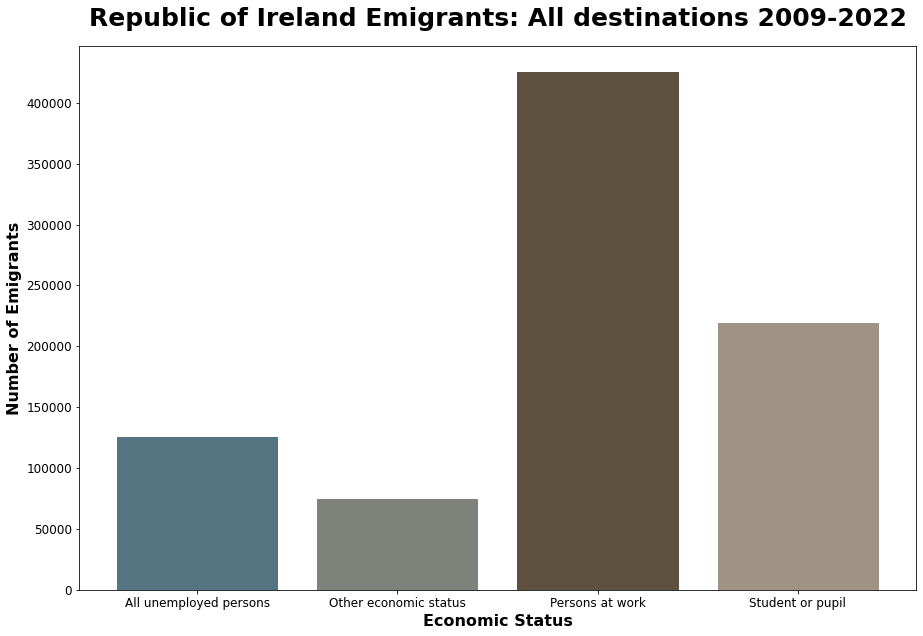

In [162]:
# summing up
pivot_df7absum = pivot_df7ab.sum()

categories = ['All unemployed persons', 'Other economic status', 'Persons at work', 'Student or pupil']
values_df7absum = pivot_df7absum.values

# friendly colors
coloring7ab = ['#547482', '#7E827A', '#5E503F', '#9E9384']


fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(categories, values_df7absum)

ax.set_xlabel('Economic Status', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Emigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Emigrants: All destinations 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# formating bars
for bar, color in zip(bars, coloring7ab):
    bar.set_color(color)

plt.show()


In [163]:
pivot_df7absum

Economic_Status
All unemployed persons    125800.0
Other economic status      74900.0
Persons at work           425200.0
Student or pupil          219300.0
dtype: float64

In [164]:
pivot_df7b = df7b.pivot_table(index=['Year'],columns='Economic_Status', values='VALUE', aggfunc='sum').reset_index()
pivot_df7b.reset_index(inplace=True,drop=True)

In [165]:
pivot_df7bb = pivot_df7b.drop(columns=['Year'])

In [166]:
pivot_df7bb

Economic_Status  All unemployed persons  Other economic status  \
0                               15700.0                10100.0   
1                                8500.0                 7000.0   
2                                9700.0                 5200.0   
3                               10600.0                 7900.0   
4                                8800.0                 7000.0   
5                                7700.0                 8300.0   
6                                6800.0                 9900.0   
7                               10100.0                 8200.0   
8                                5700.0                12500.0   
9                                9000.0                12800.0   
10                               6400.0                13200.0   
11                              11300.0                 8700.0   
12                               9000.0                 9900.0   
13                              11700.0                15800.0   

Economic_Status  Persons at work  Student or pupil  
0                        33700.0            9800.0  
1                        18400.0            6100.0  
2                        23200.0            9000.0  
3                        23900.0            8200.0  
4                        26200.0           13000.0  
5                        25600.0           18400.0  
6                        32000.0           17300.0  
7                        41100.0           13100.0  
8                        42100.0           15400.0  
9                        48700.0            9300.0  
10                       48000.0           11700.0  
11                       46700.0           10400.0  
12                       34300.0            7100.0  
13                       64400.0           10000.0

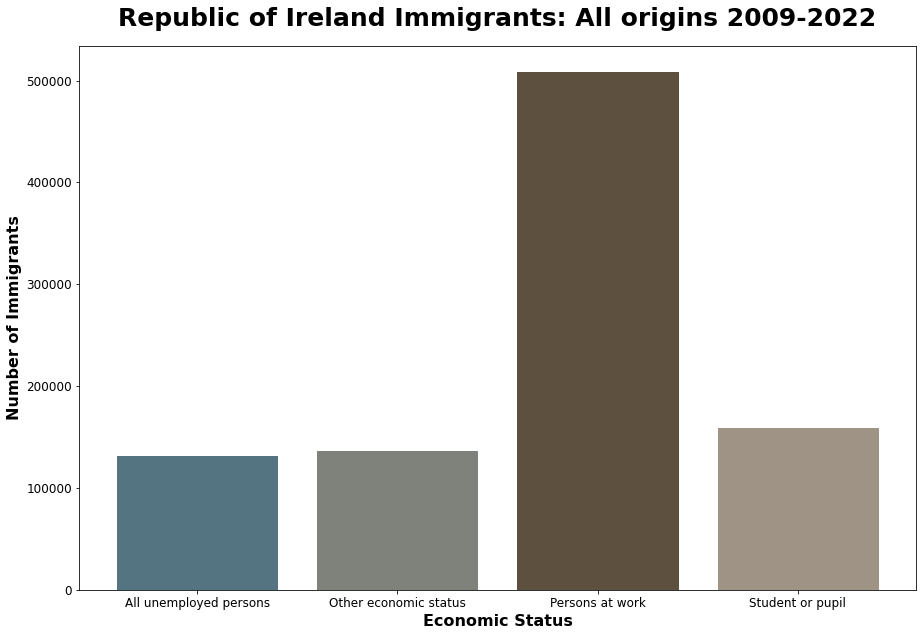

In [167]:
# summing up
pivot_df7bbsum = pivot_df7bb.sum()

categories = ['All unemployed persons', 'Other economic status', 'Persons at work', 'Student or pupil']
values_df7bbsum = pivot_df7bbsum.values

# friendly colors
coloring7bb = ['#547482', '#7E827A', '#5E503F', '#9E9384']

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.bar(categories, values_df7bbsum )

ax.set_xlabel('Economic Status', fontsize=16, fontweight="bold")
ax.set_ylabel('Number of Immigrants', fontsize=16, fontweight="bold")
ax.set_title('Republic of Ireland Immigrants: All origins 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# formating bars
for bar, color in zip(bars, coloring7bb):
    bar.set_color(color)

plt.show()

In [168]:
pivot_df7bbsum

Economic_Status
All unemployed persons    131000.0
Other economic status     136500.0
Persons at work           508300.0
Student or pupil          158800.0
dtype: float64

# Natural Increase Rate and Population Growth Rate

In [169]:
# Loading the dataset:
df8 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA15/CSV/1.0/en')

In [170]:
df8.head()

STATISTIC           STATISTIC Label  TLIST(A1)  Year  C02541V03076  \
0     PEA15  Annual Population Change       1951  1951             1   
1     PEA15  Annual Population Change       1951  1951             2   
2     PEA15  Annual Population Change       1951  1951             3   
3     PEA15  Annual Population Change       1951  1951             4   
4     PEA15  Annual Population Change       1951  1951             5   

          Component      UNIT  VALUE  
0     Annual births  Thousand    NaN  
1     Annual deaths  Thousand    NaN  
2  Natural increase  Thousand   26.6  
3        Immigrants  Thousand    NaN  
4         Emigrants  Thousand    NaN

In [171]:
df8_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02541V03076','UNIT']
df8.drop(df8_col_drop ,axis=1, inplace=True)

In [172]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       584 non-null    int64  
 1   Component  584 non-null    object 
 2   VALUE      440 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.8+ KB


In [173]:
# Display the rows with null values
df8_NaN = df8[df8.isnull().any(axis=1)]
print("Rows with null values:")
df8_NaN.head(10)

Rows with null values:


Year      Component  VALUE
0   1951  Annual births    NaN
1   1951  Annual deaths    NaN
3   1951     Immigrants    NaN
4   1951      Emigrants    NaN
8   1952  Annual births    NaN
9   1952  Annual deaths    NaN
11  1952     Immigrants    NaN
12  1952      Emigrants    NaN
16  1953  Annual births    NaN
17  1953  Annual deaths    NaN

Converting VALUE to a thousand

In [174]:
df8['VALUE'] = df8['VALUE'].apply(lambda x: x * 1000)

In [175]:
df8a = df8.copy()

We are going to drop years 1591 to 1986 as they don't have data for our analysis in df8
and droping years 1591 to 1985 in df8a.

In [176]:
df8 = df8[(df8['Year'] < 1951) | (df8['Year'] > 1986)]

In [177]:
df8a = df8a[(df8a['Year'] < 1951) | (df8a['Year'] > 1985)]

In [178]:
df8

Year          Component      VALUE
288  1987      Annual births    61200.0
289  1987      Annual deaths    32200.0
290  1987   Natural increase    29000.0
291  1987         Immigrants    17200.0
292  1987          Emigrants    40200.0
..    ...                ...        ...
579  2023         Immigrants   141600.0
580  2023          Emigrants    64000.0
581  2023      Net migration    77600.0
582  2023  Population change    97600.0
583  2023         Population  5281600.0

[296 rows x 3 columns]

Dropping components to calculate Natural Increase Rate (NIR):

In [179]:
df8 = df8[~((df8['Component'] == 'Emigrants')  | (df8['Component'] == 'Immigrants') 
            | (df8['Component'] == 'Population change') | (df8['Component'] == 'Net migration') 
            | (df8['Component'] == 'Natural increase'))]
  
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 288 to 583
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       111 non-null    int64  
 1   Component  111 non-null    object 
 2   VALUE      111 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB


In [180]:
df8.reset_index(drop=True, inplace=True)
df8.head(9)

Year      Component      VALUE
0  1987  Annual births    61200.0
1  1987  Annual deaths    32200.0
2  1987     Population  3546500.0
3  1988  Annual births    57800.0
4  1988  Annual deaths    31600.0
5  1988     Population  3530700.0
6  1989  Annual births    53600.0
7  1989  Annual deaths    31000.0
8  1989     Population  3509500.0

In [181]:
df8a = df8a[~((df8a['Component'] != 'Population'))]

In [182]:
df8a.reset_index(drop=True, inplace=True)
df8a.head(9)

Year   Component      VALUE
0  1986  Population  3540600.0
1  1987  Population  3546500.0
2  1988  Population  3530700.0
3  1989  Population  3509500.0
4  1990  Population  3505800.0
5  1991  Population  3525700.0
6  1992  Population  3554500.0
7  1993  Population  3574100.0
8  1994  Population  3585900.0

In [183]:
df8a

Year   Component      VALUE
0   1986  Population  3540600.0
1   1987  Population  3546500.0
2   1988  Population  3530700.0
3   1989  Population  3509500.0
4   1990  Population  3505800.0
5   1991  Population  3525700.0
6   1992  Population  3554500.0
7   1993  Population  3574100.0
8   1994  Population  3585900.0
9   1995  Population  3601300.0
10  1996  Population  3626100.0
11  1997  Population  3664300.0
12  1998  Population  3703100.0
13  1999  Population  3741600.0
14  2000  Population  3789500.0
15  2001  Population  3847200.0
16  2002  Population  3917200.0
17  2003  Population  3979900.0
18  2004  Population  4045200.0
19  2005  Population  4133800.0
20  2006  Population  4232900.0
21  2007  Population  4375800.0
22  2008  Population  4485100.0
23  2009  Population  4533400.0
24  2010  Population  4554800.0
25  2011  Population  4574900.0
26  2012  Population  4593700.0
27  2013  Population  4614700.0
28  2014  Population  4645400.0
29  2015  Population  4687800.0
30  2016  Population  4739600.0
31  2017  Population  4810900.0
32  2018  Population  4884900.0
33  2019  Population  4958500.0
34  2020  Population  5029900.0
35  2021  Population  5074700.0
36  2022  Population  5184000.0
37  2023  Population  5281600.0

In [184]:

def calculate_rates(df8):
    df8['VALUE'] = pd.to_numeric(df8['VALUE'], errors='coerce')
    df8_agg = df8.pivot(index='Year', columns='Component', values='VALUE').reset_index()
    df8_agg['CBR'] = (df8_agg['Annual births'] / df8_agg['Population']) * 1000
    df8_agg['CDR'] = (df8_agg['Annual deaths'] / df8_agg['Population']) * 1000
    df8_agg['NIR'] = df8_agg['CBR'] - df8_agg['CDR']
    return df8_agg

# Assuming your DataFrame is named 'df8'
df8 = calculate_rates(df8)


In [185]:
df8

Component  Year  Annual births  Annual deaths  Population        CBR  \
0          1987        61200.0        32200.0   3546500.0  17.256450   
1          1988        57800.0        31600.0   3530700.0  16.370691   
2          1989        53600.0        31000.0   3509500.0  15.272831   
3          1990        51900.0        32800.0   3505800.0  14.804039   
4          1991        53100.0        31100.0   3525700.0  15.060839   
5          1992        52800.0        31400.0   3554500.0  14.854410   
6          1993        50400.0        30400.0   3574100.0  14.101452   
7          1994        49100.0        32600.0   3585900.0  13.692518   
8          1995        48400.0        31200.0   3601300.0  13.439591   
9          1996        48800.0        32000.0   3626100.0  13.457985   
10         1997        50700.0        31700.0   3664300.0  13.836203   
11         1998        52700.0        31200.0   3703100.0  14.231320   
12         1999        53700.0        32400.0   3741600.0  14.352149   
13         2000        54000.0        32100.0   3789500.0  14.249901   
14         2001        55100.0        30200.0   3847200.0  14.322104   
15         2002        58100.0        29300.0   3917200.0  14.832023   
16         2003        60800.0        28900.0   3979900.0  15.276766   
17         2004        62000.0        28600.0   4045200.0  15.326807   
18         2005        61400.0        27900.0   4133800.0  14.853162   
19         2006        61200.0        27000.0   4232900.0  14.458173   
20         2007        66600.0        28400.0   4375800.0  15.220074   
21         2008        73000.0        28000.0   4485100.0  16.276114   
22         2009        75300.0        28600.0   4533400.0  16.610050   
23         2010        77200.0        28400.0   4554800.0  16.949153   
24         2011        75100.0        27700.0   4574900.0  16.415659   
25         2012        73200.0        28700.0   4593700.0  15.934867   
26         2013        69400.0        29800.0   4614700.0  15.038897   
27         2014        68400.0        29200.0   4645400.0  14.724243   
28         2015        66400.0        29900.0   4687800.0  14.164427   
29         2016        65400.0        29800.0   4739600.0  13.798633   
30         2017        63400.0        31300.0   4810900.0  13.178407   
31         2018        61600.0        32000.0   4884900.0  12.610289   
32         2019        60500.0        30900.0   4958500.0  12.201271   
33         2020        59100.0        32400.0   5029900.0  11.749737   
34         2021        57300.0        34300.0   5074700.0  11.291308   
35         2022        59700.0        33600.0   5184000.0  11.516204   
36         2023        55500.0        35500.0   5281600.0  10.508179   

Component       CDR        NIR  
0          9.079374   8.177076  
1          8.950067   7.420625  
2          8.833167   6.439664  
3          9.355924   5.448115  
4          8.820943   6.239896  
5          8.833873   6.020537  
6          8.505638   5.595814  
7          9.091163   4.601355  
8          8.663538   4.776053  
9          8.824908   4.633077  
10         8.651038   5.185165  
11         8.425373   5.805946  
12         8.659397   5.692752  
13         8.470775   5.779127  
14         7.849865   6.472240  
15         7.479833   7.352190  
16         7.261489   8.015277  
17         7.070108   8.256699  
18         6.749238   8.103924  
19         6.378606   8.079567  
20         6.490242   8.729832  
21         6.242893  10.033221  
22         6.308731  10.301319  
23         6.235180  10.713972  
24         6.054777  10.360882  
25         6.247687   9.687180  
26         6.457625   8.581273  
27         6.285788   8.438455  
28         6.378258   7.786168  
29         6.287450   7.511182  
30         6.506059   6.672348  
31         6.550799   6.059489  
32         6.231723   5.969547  
33         6.441480   5.308257  
34         6.759020   4.532288  
35         6.481481   5.034722  
36         6.721448   3.786731

# Notes:

1. **Crude Birth Rate (CBR):** The number of live births occurring among the population during a given year per 1,000 population. It is calculated as (Annual Births / Total Population) * 1000.
2. **Crude Death Rate (CDR):** The number of deaths occurring among the population during a given year per 1,000 population. It is calculated as (Annual Deaths / Total Population) * 1000.
3. **Natural Increase Rate (NIR):** The rate at which a population is increasing (or decreasing) in a year due to the difference between the number of births and the number of deaths. It is calculated as (CBR - CDR).
4. **Population Growth Calculation:**To calculate the Population Growth (PG) we find the difference (subtract) between the initial population and the population at Time 1, then divide by the initial population and multiply by 100.

(CBR), (CDR) and (NIR) formulas can be found here: https://hsls.libguides.com/health-data-sources/rates-formulas 


Population Growth Calculation formula can be found here: https://www.futurelearn.com/info/courses/introduction-to-environmental-science/0/steps/270677#:~:text=To%20calculate%20the%20Population%20Growth,population%20and%20multiply%20by%20100.

In [186]:
# Calculating population growth rate
df8a['Population_Growth_Rate'] = df8a['VALUE'].pct_change() * 100

In [187]:
df8a

Year   Component      VALUE  Population_Growth_Rate
0   1986  Population  3540600.0                     NaN
1   1987  Population  3546500.0                0.166638
2   1988  Population  3530700.0               -0.445510
3   1989  Population  3509500.0               -0.600448
4   1990  Population  3505800.0               -0.105428
5   1991  Population  3525700.0                0.567631
6   1992  Population  3554500.0                0.816859
7   1993  Population  3574100.0                0.551414
8   1994  Population  3585900.0                0.330153
9   1995  Population  3601300.0                0.429460
10  1996  Population  3626100.0                0.688640
11  1997  Population  3664300.0                1.053473
12  1998  Population  3703100.0                1.058865
13  1999  Population  3741600.0                1.039669
14  2000  Population  3789500.0                1.280201
15  2001  Population  3847200.0                1.522628
16  2002  Population  3917200.0                1.819505
17  2003  Population  3979900.0                1.600633
18  2004  Population  4045200.0                1.640745
19  2005  Population  4133800.0                2.190250
20  2006  Population  4232900.0                2.397310
21  2007  Population  4375800.0                3.375936
22  2008  Population  4485100.0                2.497829
23  2009  Population  4533400.0                1.076899
24  2010  Population  4554800.0                0.472052
25  2011  Population  4574900.0                0.441293
26  2012  Population  4593700.0                0.410938
27  2013  Population  4614700.0                0.457148
28  2014  Population  4645400.0                0.665265
29  2015  Population  4687800.0                0.912731
30  2016  Population  4739600.0                1.104996
31  2017  Population  4810900.0                1.504346
32  2018  Population  4884900.0                1.538174
33  2019  Population  4958500.0                1.506684
34  2020  Population  5029900.0                1.439952
35  2021  Population  5074700.0                0.890674
36  2022  Population  5184000.0                2.153822
37  2023  Population  5281600.0                1.882716

In [188]:
# Dropping 1986
df8a = df8a[~((df8a['Year'] == 1986))]

In [189]:
df8a.head()

Year   Component      VALUE  Population_Growth_Rate
1  1987  Population  3546500.0                0.166638
2  1988  Population  3530700.0               -0.445510
3  1989  Population  3509500.0               -0.600448
4  1990  Population  3505800.0               -0.105428
5  1991  Population  3525700.0                0.567631

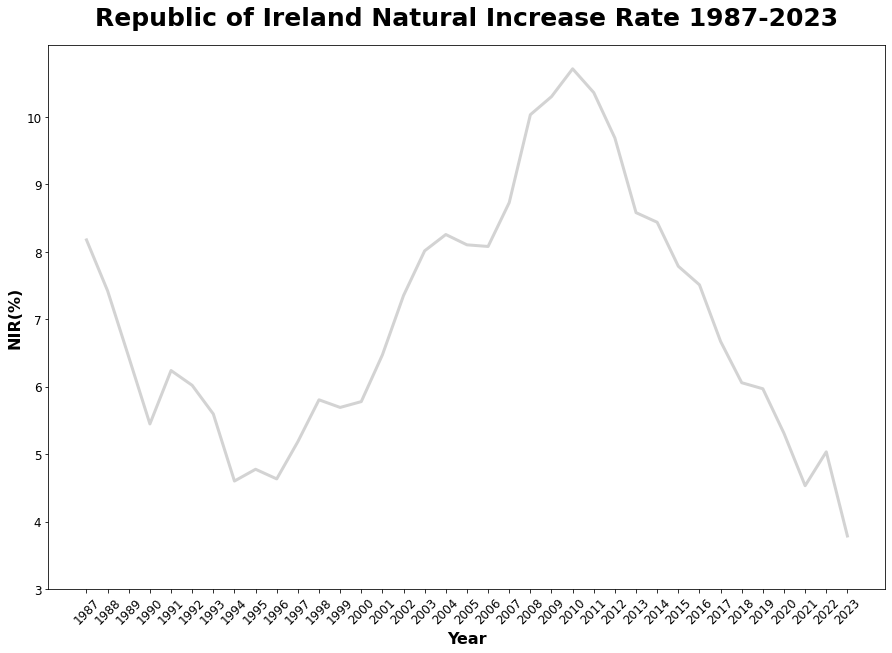

In [190]:
# Plotting
plt.figure(figsize=(15, 10))

plt.plot(df8['Year'], df8['NIR'],color='lightgray',linewidth=3)


# Labels
plt.title('Republic of Ireland Natural Increase Rate 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('NIR(%)', fontsize=16, fontweight="bold")
plt.ticklabel_format(style='plain', axis='y') 
plt.yticks(range(3, 11, 1),fontsize=12) # Creating a range having more values it's useful!!
plt.xticks(df8['Year'],rotation=45,fontsize=12)                                                

plt.show()

In [191]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           37 non-null     int64  
 1   Annual births  37 non-null     float64
 2   Annual deaths  37 non-null     float64
 3   Population     37 non-null     float64
 4   CBR            37 non-null     float64
 5   CDR            37 non-null     float64
 6   NIR            37 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.1 KB


In [192]:
df8a_pivot = df8a.pivot(index='Year', columns='Component', values='Population_Growth_Rate').reset_index()

In [193]:
df8a_pivot.head()

Component  Year  Population
0          1987    0.166638
1          1988   -0.445510
2          1989   -0.600448
3          1990   -0.105428
4          1991    0.567631

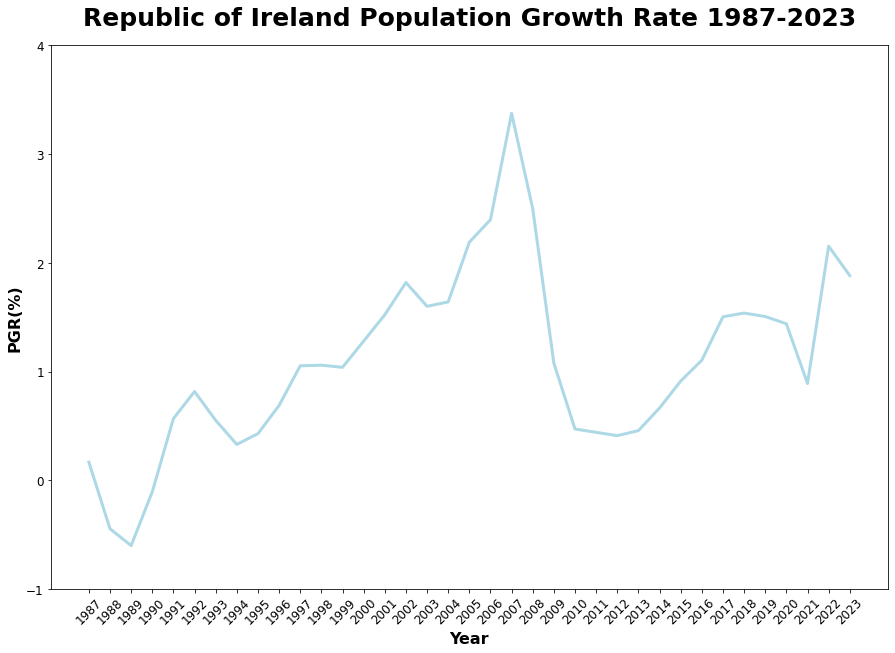

In [194]:
# Plotting
plt.figure(figsize=(15, 10))

plt.plot(df8a_pivot['Year'], df8a_pivot['Population'],color='lightblue',linewidth=3)


# Labels
plt.title('Republic of Ireland Population Growth Rate 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('PGR(%)', fontsize=16, fontweight="bold")
plt.ticklabel_format(style='plain', axis='y') 
plt.yticks(range(-1, 4+1, 1),fontsize=12) # Creating a range having more values it's useful!!
plt.xticks(df8a['Year'],rotation=45,fontsize=12)                                               
plt.show()

# Data preparation and Visualization Part Ends.

# 2. Statistics Part: 

**1. Descriptive statistics:**

In [195]:
# Creating a list of tuples (year, age, population), (1926, 1, 55391)
year_age_pop = [(row['Year'], row['Age'], row['Population']) for _, row in df9.iterrows()]

# Passing years into a list
years = df9['Year'].astype('int64').tolist()

# Creating function age_avg
def age_avg_std(year_age_pop, years):
    # Creating a dictionary to save averages and standard deviations for each of the years.
    results = []

    # Iterating through each of the years stored in years list
    for year in years:
        # Initialize variables to keep track of the total population, weighted sum of ages, and squared sum of ages for the current year
        total_population = 0
        weighted_age_sum = 0
        squared_age_sum = 0

        # Iterate through each tuple (year, age, population) in year_age_pop
        for y, age, population in year_age_pop:
            # Check if the year matches the current year in the loop
            if y == year:
                # Add the population to the total population for the current year
                total_population += population
                # Add the weighted sum of ages (age * population) to the weighted_age_sum for the current year
                weighted_age_sum += age * population
                # Add the squared sum of ages to the squared_age_sum for the current year
                squared_age_sum += (age ** 2) * population

        # We know total population is not zero, this if statement populates the results list
        if total_population != 0:
            # Dividing weighted age sum by total population to obtain yearly average
            average_age = weighted_age_sum / total_population
            # Calculating the standard deviation
            variance = (squared_age_sum / total_population) - (average_age ** 2)
            std_deviation = np.sqrt(variance)

            # Appending results for the current year to the results list
            results.append((year, average_age, std_deviation))

    # Return the list containing the results for each year
    return results

# Calling the function and passing all values into yearly_age_avg_std list
yearly_age_avg_std = age_avg_std(year_age_pop, years)

# Creating a DataFrame from yearly_age_avg_std
ROI_age_avg_std = pd.DataFrame(yearly_age_avg_std, columns=['Year', 'Average_Age', 'Age_Standard_Deviation'])
ROI_age_avg_std.head(20)


Year  Average_Age  Age_Standard_Deviation
0   1926    30.653223               21.663781
1   1926    30.653223               21.663781
2   1926    30.653223               21.663781
3   1926    30.653223               21.663781
4   1926    30.653223               21.663781
5   1926    30.653223               21.663781
6   1926    30.653223               21.663781
7   1926    30.653223               21.663781
8   1926    30.653223               21.663781
9   1926    30.653223               21.663781
10  1926    30.653223               21.663781
11  1926    30.653223               21.663781
12  1926    30.653223               21.663781
13  1926    30.653223               21.663781
14  1926    30.653223               21.663781
15  1926    30.653223               21.663781
16  1926    30.653223               21.663781
17  1926    30.653223               21.663781
18  1926    30.653223               21.663781
19  1926    30.653223               21.663781

In [196]:
ROI_age_avg_std= ROI_age_avg_std.drop_duplicates()
ROI_age_avg_std.reset_index(drop=True, inplace=True)

In [197]:
ROI_age_avg_std.head()

Year  Average_Age  Age_Standard_Deviation
0  1926    30.653223               21.663781
1  1936    31.604227               21.799804
2  1946    31.907538               22.197102
3  1951    31.987736               22.472196
4  1961    32.286610               23.195376

Let's spot check that our function gives an accurate number for the std, with a more intuitive way of calculating the std.

In [198]:
df9= pd.merge(df9,ROI_age_avg, on='Year') # Merging both df's to get Average_Age

In [199]:
df9_1926 = df9[(df9['Year'] == 1926)].copy()
df9_1926.reset_index(drop=True, inplace=True)
df9_1998 = df9[(df9['Year'] == 1998)].copy()
df9_1998.reset_index(drop=True, inplace=True)
df9_2023 = df9[(df9['Year'] == 2023)].copy()
df9_2023.reset_index(drop=True, inplace=True)

In [200]:
# std 1926
df9_1926['Age-Avg'] = df9_1926['Age'] - df9_1926['Average_Age']
df9_1926['(Age-Avg)^2'] = df9_1926['Age-Avg'] ** 2
df9_1926['Variation'] = df9_1926['Population'] * df9_1926['(Age-Avg)^2']
std_dev = (df9_1926['Variation'].sum() / df9_1926['Population'].sum()) ** 0.5 # Calculating square root of a number
df9_1926['Standard_deviation'] = std_dev

# std 1998
df9_1998['Age-Avg'] = df9_1998['Age'] - df9_1998['Average_Age']
df9_1998['(Age-Avg)^2'] = df9_1998['Age-Avg'] ** 2
df9_1998['Variation'] = df9_1998['Population'] * df9_1998['(Age-Avg)^2']
std_dev = (df9_1998['Variation'].sum() / df9_1998['Population'].sum()) ** 0.5 # Calculating square root of a number
df9_1998['Standard_deviation'] = std_dev

# std 2023
df9_2023['Age-Avg'] = df9_2023['Age'] - df9_2023['Average_Age']
df9_2023['(Age-Avg)^2'] = df9_2023['Age-Avg'] ** 2
df9_2023['Variation'] = df9_2023['Population'] * df9_2023['(Age-Avg)^2']
std_dev = (df9_2023['Variation'].sum() / df9_2023['Population'].sum()) ** 0.5 # Calculating square root of a number
df9_2023['Standard_deviation'] = std_dev

# Printing out results:
print('Standard_deviation for year 1926:',df9_1926.loc[7, 'Standard_deviation'])
print('Standard_deviation for year 1998:',df9_1998.loc[7, 'Standard_deviation'])
print('Standard_deviation for year 2023:',df9_2023.loc[7, 'Standard_deviation'])


Standard_deviation for year 1926: 21.663780970183794
Standard_deviation for year 1998: 21.966713089986847
Standard_deviation for year 2023: 22.809268674864217


Std match for years 1926, 1998 and 2023 we can be confident that numbers are good. Now let's find out average age +/- std.

In [201]:
ROI_age_avg_std['Avg_Age+std'] = ROI_age_avg_std['Average_Age'] + ROI_age_avg_std['Age_Standard_Deviation']
ROI_age_avg_std['Avg_Age-std'] = ROI_age_avg_std['Average_Age'] - ROI_age_avg_std['Age_Standard_Deviation']

In [202]:
ROI_age_avg_std

Year  Average_Age  Age_Standard_Deviation  Avg_Age+std  Avg_Age-std
0   1926    30.653223               21.663781    52.317004     8.989442
1   1936    31.604227               21.799804    53.404031     9.804423
2   1946    31.907538               22.197102    54.104639     9.710436
3   1951    31.987736               22.472196    54.459932     9.515541
4   1961    32.286610               23.195376    55.481986     9.091234
5   1966    31.898300               23.224950    55.123249     8.673350
6   1971    31.632284               23.172289    54.804573     8.459995
7   1979    30.878898               22.632620    53.511518     8.246278
8   1981    30.807638               22.543584    53.351222     8.264054
9   1986    31.282505               22.349739    53.632245     8.932766
10  1991    32.488827               22.309828    54.798655    10.178998
11  1996    33.589488               22.057434    55.646922    11.532055
12  1997    33.791478               21.998110    55.789587    11.793368
13  1998    34.003280               21.966713    55.969993    12.036567
14  1999    34.167958               21.927068    56.095026    12.240889
15  2000    34.330794               21.883700    56.214494    12.447094
16  2001    34.493496               21.851630    56.345126    12.641867
17  2002    34.643470               21.796245    56.439714    12.847225
18  2003    34.779741               21.793385    56.573126    12.986356
19  2004    34.915350               21.798961    56.714311    13.116389
20  2005    35.032036               21.765618    56.797654    13.266417
21  2006    35.013536               21.682558    56.696094    13.330977
22  2007    34.990085               21.601688    56.591773    13.388398
23  2008    34.998831               21.649659    56.648489    13.349172
24  2009    35.162839               21.782922    56.945761    13.379918
25  2010    35.383817               21.953473    57.337290    13.430344
26  2011    35.615102               22.094287    57.709389    13.520814
27  2012    35.847602               22.233660    58.081261    13.613942
28  2013    36.080443               22.341473    58.421916    13.738971
29  2014    36.332228               22.443358    58.775586    13.888870
30  2015    36.575644               22.522352    59.097996    14.053292
31  2016    36.810293               22.574865    59.385158    14.235428
32  2017    37.060121               22.623732    59.683853    14.436389
33  2018    37.261711               22.673246    59.934957    14.588465
34  2019    37.529289               22.713201    60.242490    14.816087
35  2020    37.784546               22.723320    60.507866    15.061226
36  2021    38.088504               22.744927    60.833431    15.343576
37  2022    38.385274               22.800678    61.185952    15.584596
38  2023    38.621133               22.809269    61.430401    15.811864

Let's plot our results:

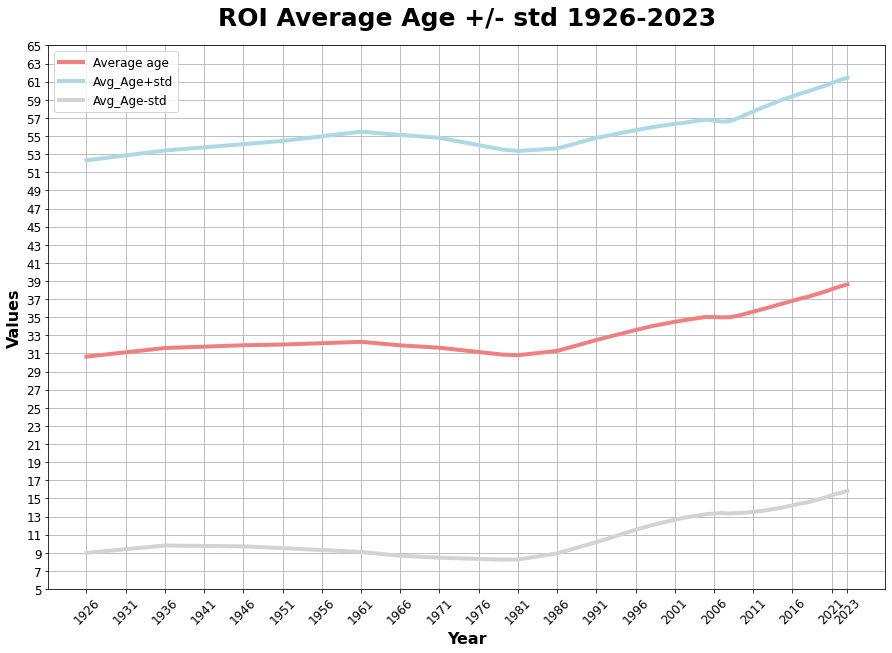

In [203]:
# Plotting
plt.figure(figsize=(15, 10))

plt.plot(ROI_age_avg_std['Year'], ROI_age_avg_std['Average_Age'],color='#F08080',label='Average age',linewidth=4)
plt.plot(ROI_age_avg_std['Year'], ROI_age_avg_std['Avg_Age+std'],color='lightblue',label='Avg_Age+std',linewidth=4)
plt.plot(ROI_age_avg_std['Year'], ROI_age_avg_std['Avg_Age-std'],color='lightgrey',label='Avg_Age-std',linewidth=4)
# Labels
plt.title('ROI Average Age +/- std 1926-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight="bold")
plt.ylabel('Values', fontsize=16, fontweight="bold")
plt.ticklabel_format(style='plain', axis='y') # Avoiding scientific notation
plt.yticks(range(5, 65+1, 2),fontsize=12) # Creating a range having more values it's useful!!
plt.xticks(list(range(1926, 2024, 5)) + [2023], rotation=45, fontsize=12) # Every 5 years a year is displayed...
plt.legend(fontsize=12) 
plt.grid(True) #Helps locating points
plt.show()

We have a very consistent std over the years, my interpretation of this is we don't have outliers and data is consistenly dispersed around the mean.

In [204]:
df10.describe()

Year    Population          Age
count  3900.000000   3900.000000  3900.000000
mean   1996.410256  40544.895641    49.510000
std      24.465267  23783.909198    28.852788
min    1926.000000     65.000000     1.000000
25%    1986.000000  20827.500000    24.750000
50%    2004.000000  45819.500000    49.500000
75%    2014.000000  60653.750000    74.250000
max    2023.000000  87281.000000    99.000000

In [205]:
df10z=df10.copy()

In [206]:
pivot_df10 = df10.pivot_table(index=['Year'],columns='Age', values='Population', aggfunc='sum').reset_index()

In [207]:
pivot_df10.head()

Age  Year       1      2      3      4      5      6      7      8      9  \
0    1926  111267  58273  59050  59123  60334  59937  56040  53418  54904   
1    1936  107101  54394  53015  53756  54364  53302  53415  54105  54159   
2    1946  125279  58171  57206  54109  52324  54427  53997  52233  52933   
3    1951  126359  62426  62439  61608  60858  57539  56219  54960  51467   
4    1961  123448  59075  59187  59080  57574  58528  57524  58170  55872   

Age  ...    90   91   92   93   94   95   96   97   98   99  
0    ...  1348  398  430  286  277  244  187  110  105  178  
1    ...   926  396  371  296  217  174  162   93   83   94  
2    ...   853  520  387  289  244  257  189  110   72  151  
3    ...   991  552  376  324  272  199  129   94   75  106  
4    ...  1319  897  578  392  302  222  161  105   65  214  

[5 rows x 100 columns]

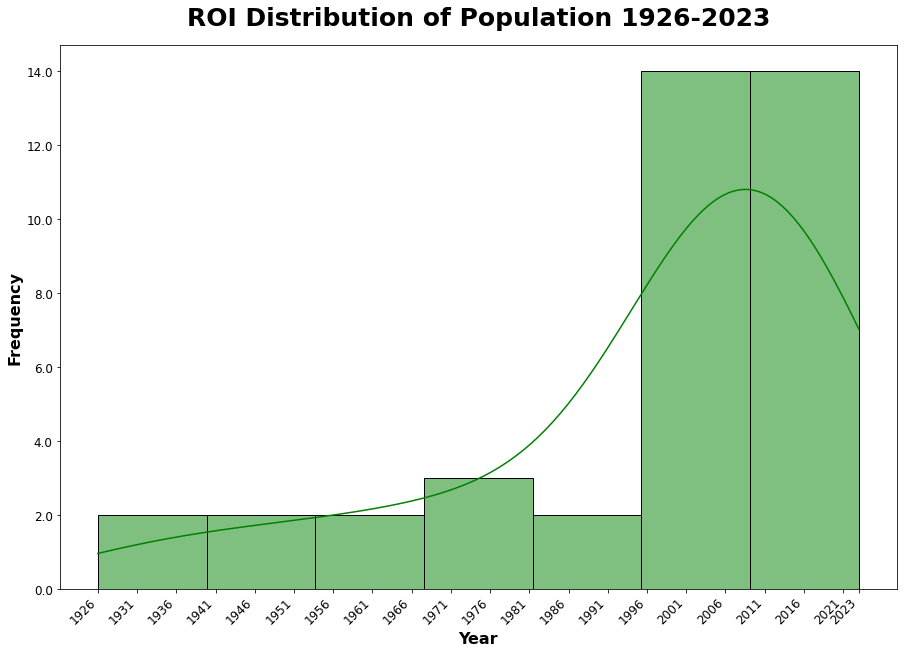

In [208]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(pivot_df10.Year,kde=True, color ='green')
# Set the properties of the axes
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_xticks(list(range(1926, 2024, 5)) + [2023])
ax.set_xticklabels(list(range(1926, 2024, 5)) + [2023], rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('Frequency', fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('ROI Distribution of Population 1926-2023', loc="center", pad=20, fontsize=25, fontweight='bold');

In [209]:
# Dropping rows based on criteria
df11 = df11[~((df11['Sex'] == 'Both sexes') & (df11['Age_Group'] == 'All ages'))] # Drop both sexes different that All ages
df11 = df11[~((df11['Sex'] != 'Both sexes') & (df11['Age_Group'] == 'All ages'))] # Drop Male and Female All ages
df11 = df11[~((df11['Sex'] == 'Both sexes') & (df11['Age_Group'] != 'All ages'))] # Drop Male and Female All ages
df11


Year          Age_Group     Sex  Population
4      1926       Under 1 year    Male       28084
5      1926       Under 1 year  Female       27307
7      1926             1 year    Male       28374
8      1926             1 year  Female       27502
10     1926            2 years    Male       29728
...     ...                ...     ...         ...
11810  2023           97 years  Female         821
11812  2023           98 years    Male         197
11813  2023           98 years  Female         632
11815  2023  99 years and over    Male         352
11816  2023  99 years and over  Female        1248

[7800 rows x 4 columns]

In [210]:
df11.reset_index(drop=True, inplace=True)
df11

Year          Age_Group     Sex  Population
0     1926       Under 1 year    Male       28084
1     1926       Under 1 year  Female       27307
2     1926             1 year    Male       28374
3     1926             1 year  Female       27502
4     1926            2 years    Male       29728
...    ...                ...     ...         ...
7795  2023           97 years  Female         821
7796  2023           98 years    Male         197
7797  2023           98 years  Female         632
7798  2023  99 years and over    Male         352
7799  2023  99 years and over  Female        1248

[7800 rows x 4 columns]

In [211]:
pivot_df11 = df11.pivot_table(index=['Year'],columns='Sex', values='Population', aggfunc='sum').reset_index()

In [212]:
df11_pie = df11.groupby('Sex', axis = 0).sum()
df11_pie.reset_index(inplace=True)

In [213]:
df11_pie

Sex     Year  Population
0  Female  7786000    79386982
1    Male  7786000    78738111

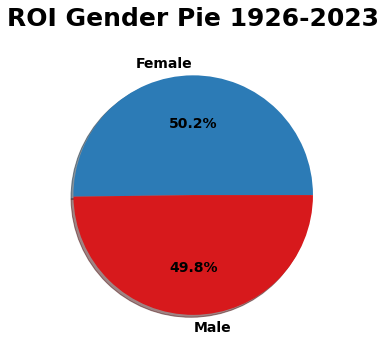

In [214]:
plt.figure(figsize=(10, 5))

pie_colors = ['#2C7BB6', '#D7191C']
df11_pie['Population'].plot(kind='pie', labels = df11_pie['Sex'], radius=1, autopct='%1.1f%%', shadow = True,colors=pie_colors)
plt.title('ROI Gender Pie 1926-2023', loc="center", pad=20, fontsize=25, fontweight="bold")

plt.ylabel("")
plt.tight_layout()
# Adjust font size for labels
for text in plt.gca().texts:
    text.set_fontsize(14)
    text.set_weight('bold')

In [215]:
df11_2023 = df11[(df11['Year'] == 2023)].copy()

In [216]:
df11_2023_pie = df11_2023.groupby('Sex', axis = 0).sum()
df11_2023_pie.reset_index(inplace=True)

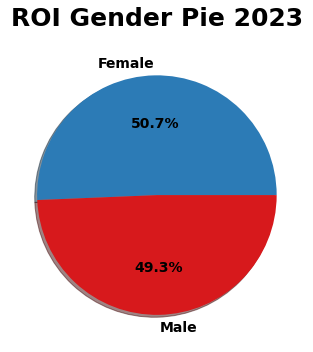

In [217]:
plt.figure(figsize=(10, 5))

pie_colors = ['#2C7BB6', '#D7191C']
df11_2023_pie['Population'].plot(kind='pie', labels = df11_2023_pie['Sex'], radius=1, autopct='%1.1f%%', shadow = True,colors=pie_colors)
plt.title('ROI Gender Pie 2023', loc="center", pad=20, fontsize=25, fontweight="bold")

plt.ylabel("")
plt.tight_layout()
# Adjust font size for labels
for text in plt.gca().texts:
    text.set_fontsize(14)
    text.set_weight('bold')

In [218]:
df11_2023_pie

Sex    Year  Population
0  Female  202300     2675442
1    Male  202300     2606170

In [219]:
df12

Year                               Country         Sex  \
1     1987                    United Kingdom (1)  Both sexes   
2     1987                    United Kingdom (1)  Both sexes   
10    1987                         United States  Both sexes   
11    1987                         United States  Both sexes   
19    1987                                Canada  Both sexes   
...    ...                                   ...         ...   
2630  2023                  Other countries (23)  Both sexes   
2647  2023          EU14 excl Irl (UK & Ireland)  Both sexes   
2648  2023          EU14 excl Irl (UK & Ireland)  Both sexes   
2656  2023  EU15 to EU27 (membership after 2004)  Both sexes   
2657  2023  EU15 to EU27 (membership after 2004)  Both sexes   

            Origin_or_Destination    VALUE  
1     Emigrants: All destinations  21800.0  
2         Immigrants: All origins   8100.0  
10    Emigrants: All destinations   9900.0  
11        Immigrants: All origins   3000.0  
19    Emigrants: All destinations      NaN  
...                           ...      ...  
2630      Immigrants: All origins  75800.0  
2647  Emigrants: All destinations  13900.0  
2648      Immigrants: All origins  17700.0  
2656  Emigrants: All destinations   8800.0  
2657      Immigrants: All origins   8900.0  

[518 rows x 5 columns]

In [220]:
df12a

Year                               Country         Sex  \
1     1987                    United Kingdom (1)  Both sexes   
10    1987                         United States  Both sexes   
19    1987                                Canada  Both sexes   
28    1987                             Australia  Both sexes   
37    1987                  Other countries (23)  Both sexes   
...    ...                                   ...         ...   
2611  2023                                Canada  Both sexes   
2620  2023                             Australia  Both sexes   
2629  2023                  Other countries (23)  Both sexes   
2647  2023          EU14 excl Irl (UK & Ireland)  Both sexes   
2656  2023  EU15 to EU27 (membership after 2004)  Both sexes   

            Origin_or_Destination    VALUE  
1     Emigrants: All destinations  21800.0  
10    Emigrants: All destinations   9900.0  
19    Emigrants: All destinations      NaN  
28    Emigrants: All destinations      NaN  
37    Emigrants: All destinations   5400.0  
...                           ...      ...  
2611  Emigrants: All destinations   5300.0  
2620  Emigrants: All destinations   4700.0  
2629  Emigrants: All destinations  11700.0  
2647  Emigrants: All destinations  13900.0  
2656  Emigrants: All destinations   8800.0  

[259 rows x 5 columns]

In [221]:
df12a_col_drop = ['Year']
df12a.drop(df12a_col_drop ,axis=1, inplace=True)

In [222]:
df12a_pie = df12a.groupby('Country', axis = 0).sum()

In [223]:
df12a_pie.reset_index(inplace=True)

df12a_pie

Country     VALUE
0                             Australia  129500.0
1                                Canada   54500.0
2          EU14 excl Irl (UK & Ireland)  293500.0
3  EU15 to EU27 (membership after 2004)  160700.0
4                  Other countries (23)  387900.0
5                    United Kingdom (1)  574300.0
6                         United States  193200.0

In [224]:
df12a_pie

Country     VALUE
0                             Australia  129500.0
1                                Canada   54500.0
2          EU14 excl Irl (UK & Ireland)  293500.0
3  EU15 to EU27 (membership after 2004)  160700.0
4                  Other countries (23)  387900.0
5                    United Kingdom (1)  574300.0
6                         United States  193200.0

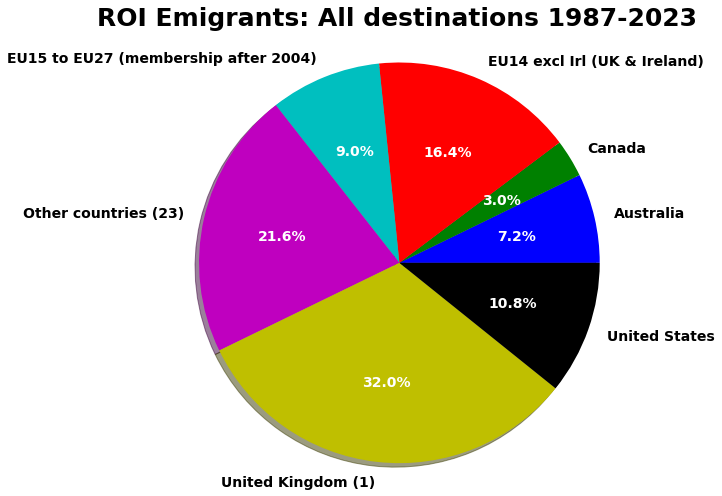

In [225]:
# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
patches, texts, autotexts = plt.pie(df12a_pie['VALUE'], colors=colors, labels = df12a_pie['Country'], radius=1, autopct='%1.1f%%', shadow = True)
for autotext in autotexts:
    autotext.set_color('white')


plt.title('ROI Emigrants: All destinations 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
# Set the aspect ratio to ensure a circular pie chart
plt.axis('equal')
for text in plt.gca().texts:
    text.set_fontsize(14)
    text.set_weight('bold')


# Show the plot
plt.show()


In [226]:
df12b_col_drop = ['Year']
df12b.drop(df12b_col_drop ,axis=1, inplace=True)
df12b_pie = df12b.groupby('Country', axis = 0).sum()
df12b_pie.reset_index(inplace=True)
df12b_pie

Country     VALUE
0                             Australia  100900.0
1                                Canada   43800.0
2          EU14 excl Irl (UK & Ireland)  390600.0
3  EU15 to EU27 (membership after 2004)  371500.0
4                  Other countries (23)  709600.0
5                    United Kingdom (1)  622400.0
6                         United States  181700.0

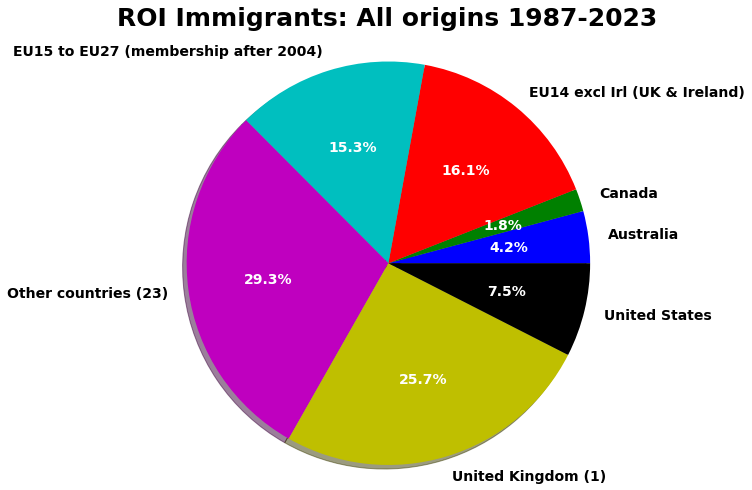

In [227]:
# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
patches, texts, autotexts = plt.pie(df12b_pie['VALUE'], colors=colors, labels = df12a_pie['Country'], radius=1, autopct='%1.1f%%', shadow = True)
for autotext in autotexts:
    autotext.set_color('white')


plt.title('ROI Immigrants: All origins 1987-2023', loc="center", pad=20, fontsize=25, fontweight="bold")
# Set the aspect ratio to ensure a circular pie chart
plt.axis('equal')
for text in plt.gca().texts:
    text.set_fontsize(14)
    text.set_weight('bold')


# Show the plot
plt.show()

In [228]:
df13a.head()

Year         Sex             Education_Level       Inward_or_Outward_Flow  \
1   2009  Both sexes  Higher secondary and below  Emigrants: All destinations   
4   2009  Both sexes           Post leaving cert  Emigrants: All destinations   
7   2009  Both sexes                 Third level  Emigrants: All destinations   
10  2009  Both sexes                  Not stated  Emigrants: All destinations   
46  2010  Both sexes  Higher secondary and below  Emigrants: All destinations   

      VALUE  
1   31600.0  
4    6700.0  
7   24400.0  
10   7000.0  
46  26700.0

In [229]:
# df13a = df13a.groupby('Education_Level', axis = 0).sum()
# df13a

In [230]:
pivot_df13a = df13a.pivot_table(index=['Year'],columns='Education_Level', values='VALUE', aggfunc='sum').reset_index()
pivot_df13a 

Education_Level  Year  Higher secondary and below  Not stated  \
0                2009                     31600.0      7000.0   
1                2010                     26700.0      5400.0   
2                2011                     30100.0      3300.0   
3                2012                     28200.0      4300.0   
4                2013                     32200.0      2500.0   
5                2014                     23500.0      5700.0   
6                2015                     20100.0      4200.0   
7                2016                     20000.0      6800.0   
8                2017                     20200.0      6100.0   
9                2018                     12800.0      6600.0   
10               2019                     14600.0      3800.0   
11               2020                     16900.0      2600.0   
12               2021                     11500.0      4300.0   
13               2022                     15700.0      3900.0   

Education_Level  Post leaving cert  Third level  
0                           6700.0      24400.0  
1                           7100.0      27900.0  
2                           6200.0      35800.0  
3                           6000.0      34900.0  
4                           5700.0      29900.0  
5                           5400.0      30100.0  
6                           3300.0      31000.0  
7                           3600.0      25500.0  
8                           2400.0      27900.0  
9                           4000.0      26500.0  
10                          2500.0      28300.0  
11                          3600.0      26300.0  
12                          2700.0      32500.0  
13                          3200.0      30700.0

In [231]:
df13a.head()

Year         Sex             Education_Level       Inward_or_Outward_Flow  \
1   2009  Both sexes  Higher secondary and below  Emigrants: All destinations   
4   2009  Both sexes           Post leaving cert  Emigrants: All destinations   
7   2009  Both sexes                 Third level  Emigrants: All destinations   
10  2009  Both sexes                  Not stated  Emigrants: All destinations   
46  2010  Both sexes  Higher secondary and below  Emigrants: All destinations   

      VALUE  
1   31600.0  
4    6700.0  
7   24400.0  
10   7000.0  
46  26700.0

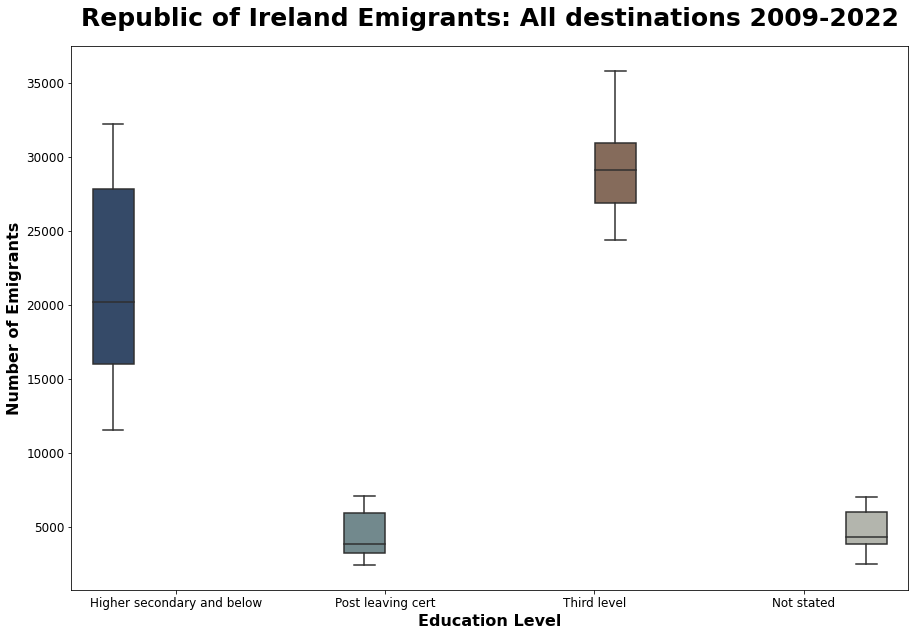

In [232]:
# We are matching format of bar chart 'Republic of Ireland Emigrants: All destinations 2009-2022'
plt.figure(figsize=(15, 10))
sns.boxplot(x='Education_Level', y='VALUE', data=df13a, hue='Education_Level', palette=coloringbb)
plt.title('Republic of Ireland Emigrants: All destinations 2009-2022', fontsize=25, fontweight="bold", pad=20)
plt.xlabel('Education Level', fontsize=16, fontweight="bold")
plt.ylabel('Number of Emigrants', fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend().remove()  
plt.show()


In [233]:
df13b.head()

Year         Sex             Education_Level   Inward_or_Outward_Flow  \
2   2009  Both sexes  Higher secondary and below  Immigrants: All origins   
5   2009  Both sexes           Post leaving cert  Immigrants: All origins   
8   2009  Both sexes                 Third level  Immigrants: All origins   
11  2009  Both sexes                  Not stated  Immigrants: All origins   
47  2010  Both sexes  Higher secondary and below  Immigrants: All origins   

      VALUE  
2   21900.0  
5    6500.0  
8   32500.0  
11   8300.0  
47  15100.0

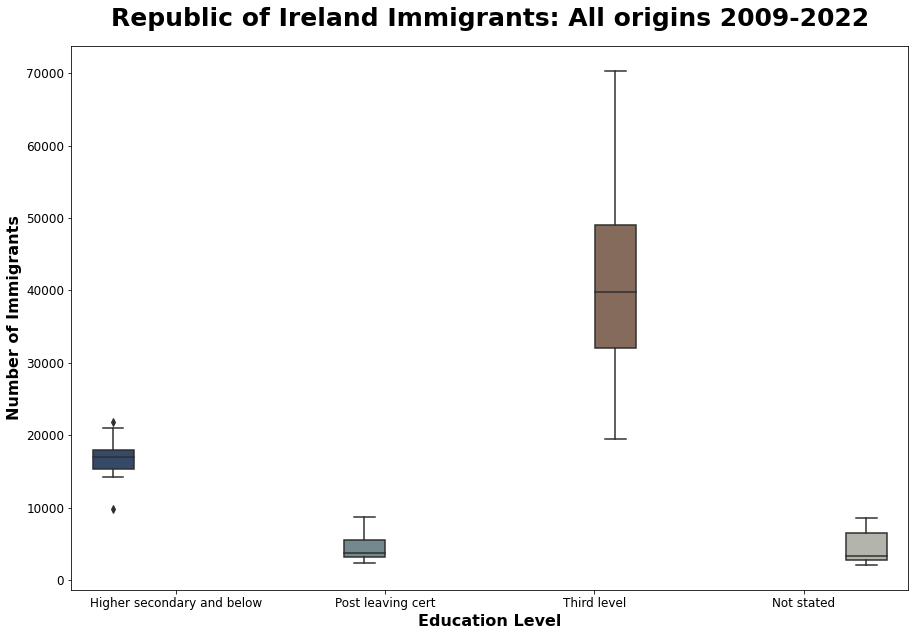

In [234]:
# We are matching format of bar chart 'Republic of Ireland Immigrants: All origins 2009-2022'
plt.figure(figsize=(15, 10))
sns.boxplot(x='Education_Level', y='VALUE', data=df13b, hue='Education_Level', palette=coloringbb)
plt.title('Republic of Ireland Immigrants: All origins 2009-2022', fontsize=25, fontweight="bold", pad=20)
plt.xlabel('Education Level', fontsize=16, fontweight="bold")
plt.ylabel('Number of Immigrants', fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend().remove()  
plt.show()

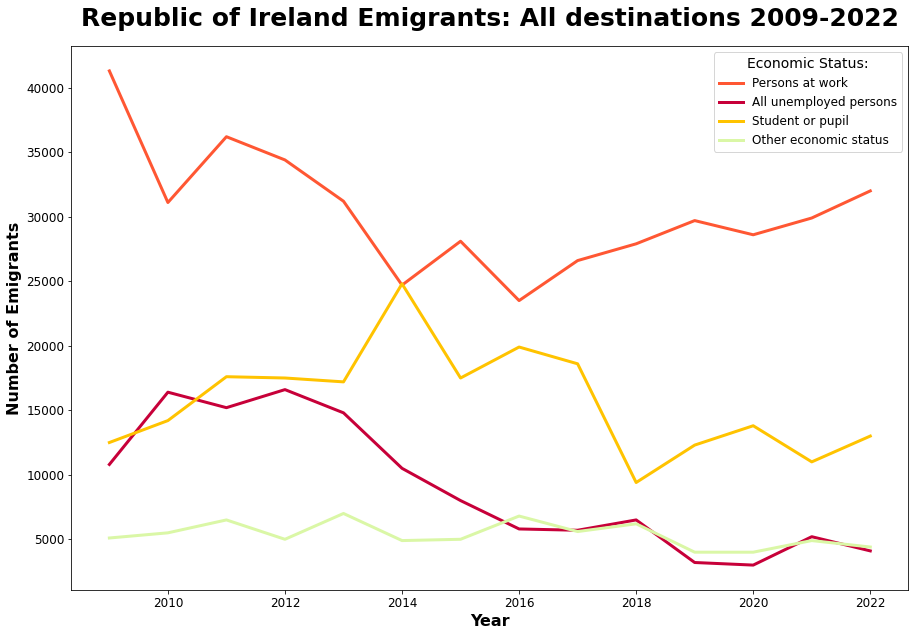

In [235]:
# Trend line plot
plt.figure(figsize=(15, 10))
for i, economic_status in enumerate(df14a['Economic_Status'].unique()):
    coloring14a = ['#FF5733', '#C70039', '#FFC300', '#DAF7A6'] # friendly colors
    plt.plot(df14a[df14a['Economic_Status'] == economic_status]['Year'],
             df14a[df14a['Economic_Status'] == economic_status]['VALUE'],
             label=economic_status, linestyle='-', color=coloring14a[i], linewidth=3)
# Formatting
plt.title('Republic of Ireland Emigrants: All destinations 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Number of Emigrants', fontsize=16, fontweight='bold')
plt.legend(fontsize=12,title='Economic Status:',title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [236]:
df14b.head()

Year         Economic_Status         Sex   Inward_or_Outward_Flow    VALUE
11  2009         Persons at work  Both sexes  Immigrants: All origins  33700.0
20  2009  All unemployed persons  Both sexes  Immigrants: All origins  15700.0
29  2009        Student or pupil  Both sexes  Immigrants: All origins   9800.0
38  2009   Other economic status  Both sexes  Immigrants: All origins  10100.0
56  2010         Persons at work  Both sexes  Immigrants: All origins  18400.0

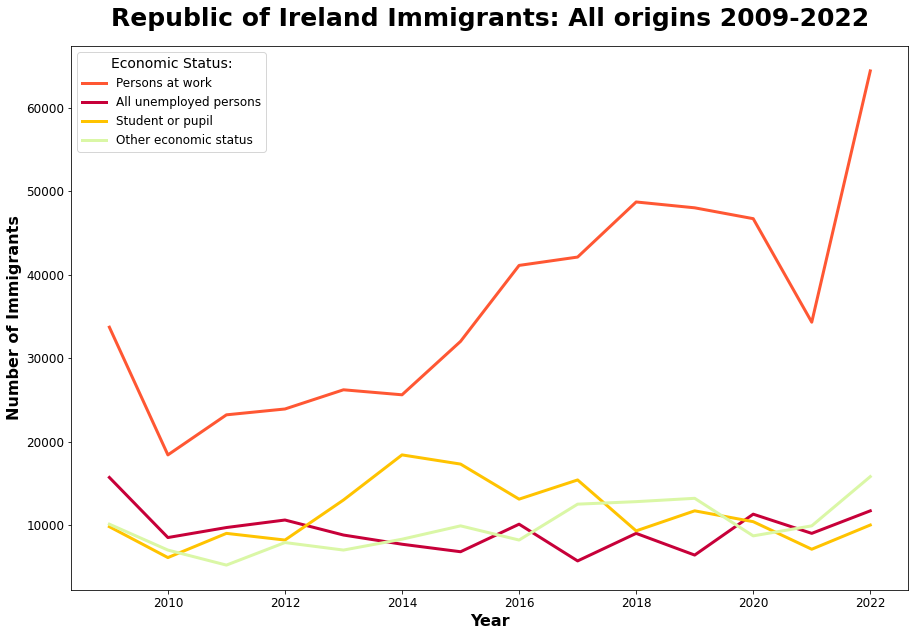

In [237]:
# Trend line plot
plt.figure(figsize=(15, 10))
for i, economic_status in enumerate(df14b['Economic_Status'].unique()):
    coloring14b = ['#FF5733', '#C70039', '#FFC300', '#DAF7A6'] # friendly colors
    plt.plot(df14b[df14b['Economic_Status'] == economic_status]['Year'],
             df14b[df14b['Economic_Status'] == economic_status]['VALUE'],
             label=economic_status, linestyle='-', color=coloring14b[i], linewidth=3)

# Formatting
plt.title('Republic of Ireland Immigrants: All origins 2009-2022', loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Number of Immigrants', fontsize=16, fontweight='bold')
plt.legend(fontsize=12,title='Economic Status:',title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**3.2 Binomial and Poisson Distribution**

2.1. Binomial distribution with n subsetting and increasing n.

We are going to model the Binomial Distribution based on Emigrants.

In [238]:
df15

Year         Sex             Education_Level  \
0    2009  Both sexes  Higher secondary and below   
1    2009  Both sexes  Higher secondary and below   
2    2009  Both sexes  Higher secondary and below   
3    2009  Both sexes           Post leaving cert   
4    2009  Both sexes           Post leaving cert   
..    ...         ...                         ...   
625  2022      Female                  Not stated   
626  2022      Female                  Not stated   
627  2022      Female                 All persons   
628  2022      Female                 All persons   
629  2022      Female                 All persons   

          Inward_or_Outward_Flow  VALUE  
0                  Net migration   -9.7  
1    Emigrants: All destinations   31.6  
2        Immigrants: All origins   21.9  
3                  Net migration   -0.2  
4    Emigrants: All destinations    6.7  
..                           ...    ...  
625  Emigrants: All destinations    1.3  
626      Immigrants: All origins    3.9  
627                Net migration   32.7  
628  Emigrants: All destinations   22.6  
629      Immigrants: All origins   55.4  

[630 rows x 5 columns]

In [239]:
# Dropping rows based on criteria, we need male/female, Emigrants and Education Level different than 'All persons'
df15 = df15[~((df15['Sex'] == 'Both sexes') | (df15['Inward_or_Outward_Flow'] != 'Emigrants: All destinations') | (df15['Education_Level'] == 'All persons'))]

In [240]:
df15

Year     Sex             Education_Level       Inward_or_Outward_Flow  \
16   2009    Male  Higher secondary and below  Emigrants: All destinations   
19   2009    Male           Post leaving cert  Emigrants: All destinations   
22   2009    Male                 Third level  Emigrants: All destinations   
25   2009    Male                  Not stated  Emigrants: All destinations   
31   2009  Female  Higher secondary and below  Emigrants: All destinations   
..    ...     ...                         ...                          ...   
610  2022    Male                  Not stated  Emigrants: All destinations   
616  2022  Female  Higher secondary and below  Emigrants: All destinations   
619  2022  Female           Post leaving cert  Emigrants: All destinations   
622  2022  Female                 Third level  Emigrants: All destinations   
625  2022  Female                  Not stated  Emigrants: All destinations   

     VALUE  
16    18.6  
19     5.1  
22    13.6  
25     3.6  
31    13.0  
..     ...  
610    2.5  
616    5.6  
619    1.3  
622   14.4  
625    1.3  

[112 rows x 5 columns]

In [241]:
df15a = df15.copy()

In [242]:
# Calculate the total sum of all values
bd_tot_sum = df15['VALUE'].sum()
print(bd_tot_sum)

844.7


In [243]:
# Calculating the probability for M/F based on Education Level and storing in a column called Probability
df15['Probability'] = df15['VALUE'] / bd_tot_sum

In [244]:
# The sum of all the probabilities within that domain will result 1
df15.Probability.sum()
print(round(df15.Probability.sum(),2))

1.0


We need to create a subset for our case study, Male emigrants that hold Post leaving cert

In [245]:
bd_subset_df15 = df15[(df15['Sex'] == 'Male') & (df15['Education_Level'] == 'Post leaving cert')
                   & (df15['Inward_or_Outward_Flow'] == 'Emigrants: All destinations')]
                

In [246]:
bd_subset_df15

Year   Sex    Education_Level       Inward_or_Outward_Flow  VALUE  \
19   2009  Male  Post leaving cert  Emigrants: All destinations    5.1   
64   2010  Male  Post leaving cert  Emigrants: All destinations    5.7   
109  2011  Male  Post leaving cert  Emigrants: All destinations    4.0   
154  2012  Male  Post leaving cert  Emigrants: All destinations    5.0   
199  2013  Male  Post leaving cert  Emigrants: All destinations    3.7   
244  2014  Male  Post leaving cert  Emigrants: All destinations    3.0   
289  2015  Male  Post leaving cert  Emigrants: All destinations    2.4   
334  2016  Male  Post leaving cert  Emigrants: All destinations    1.9   
379  2017  Male  Post leaving cert  Emigrants: All destinations    1.7   
424  2018  Male  Post leaving cert  Emigrants: All destinations    2.1   
469  2019  Male  Post leaving cert  Emigrants: All destinations    1.5   
514  2020  Male  Post leaving cert  Emigrants: All destinations    1.3   
559  2021  Male  Post leaving cert  Emigrants: All destinations    1.7   
604  2022  Male  Post leaving cert  Emigrants: All destinations    1.9   

     Probability  
19      0.006038  
64      0.006748  
109     0.004735  
154     0.005919  
199     0.004380  
244     0.003552  
289     0.002841  
334     0.002249  
379     0.002013  
424     0.002486  
469     0.001776  
514     0.001539  
559     0.002013  
604     0.002249

In [247]:
#Finding the probability from 2009 to 2022 for Male Emigrants that have Post leaving cert:
p=bd_subset_df15.Probability.sum()
print(p)

0.048537942464780395


In [248]:
n= bd_subset_df15.VALUE.sum()
print(n)

41.0


Knowing that 4.85% of male emigrants that hold post leaving cert, what are the chances of picking 4 male emigrants with leaving cert???

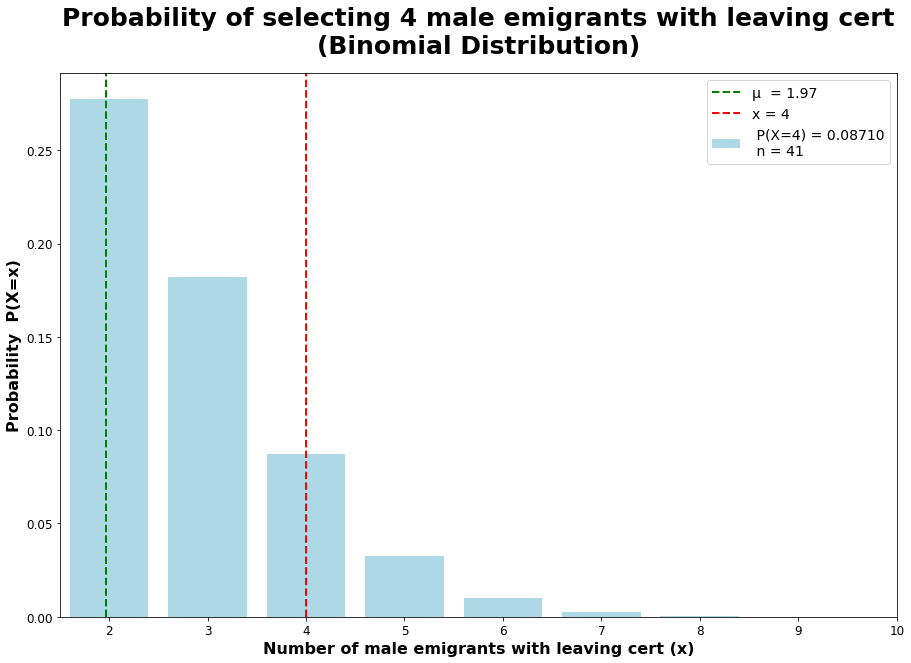

In [249]:
# Probability
p = 0.048

# Total population of male emigrants that hold post leaving cert
n = 41  

# P(X=4)
x = 4

# Calculating the probability using the binom.pmf function
prob = binom.pmf(x, n, p)
# calculationg the mean
μ = binom.mean(n, p)

# Plotting the bar plot for the probability distribution
x_val = np.arange(2, n + 1)
prob_plot = binom.pmf(x_val, n, p)

plt.figure(figsize=(15, 10))

plt.title('Probability of selecting 4 male emigrants with leaving cert\n(Binomial Distribution)',
          loc="center", pad=20, fontsize=25, fontweight="bold")

plt.bar(x_val, prob_plot, color='lightblue',label=f' P(X=4) = {prob:.5f}\n n = 41')

plt.axvline(x=μ , color='g', linestyle='--', label=f'μ  = {μ :.2f}', linewidth=2) # Add a vertical line for μ = 1.97
plt.axvline(x=x, color='r', linestyle='--', label=f'x = {x}', linewidth=2) # Add a vertical line for x = 4
plt.xlabel('Number of male emigrants with leaving cert (x)',fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)',fontsize=16, fontweight='bold')
plt.legend( loc='best', fontsize=14)  # Add the legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1.5, 10)
plt.grid(False)  
plt.show()


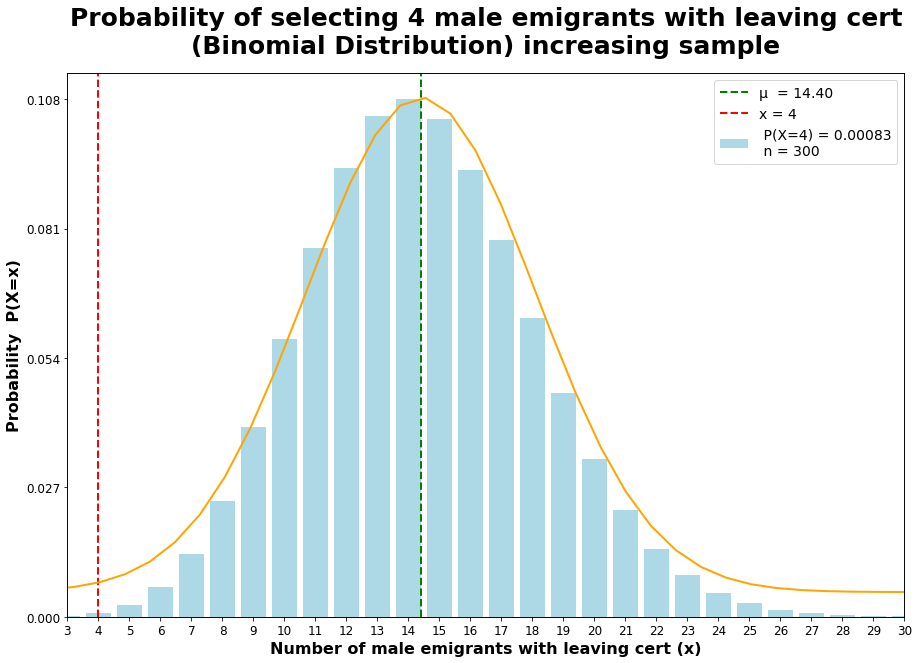

In [250]:
# Probability
p1 = 0.048
# Total population of male emigrants that hold post leaving cert
n1 = 300
# P(X=4)
x1 = 4

# Calculating the probability using the binom.pmf function
prob1 = binom.pmf(x1, n1, p1)
# calculationg the mean
μ1 = binom.mean(n1, p1)

# Plotting the bar plot for the probability distribution
x_val1 = np.arange(2, n1 + 1)
prob_plot1 = binom.pmf(x_val1, n1, p1)

fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.set_title('Probability of selecting 4 male emigrants with leaving cert\n(Binomial Distribution) increasing sample',
          loc="center", pad=20, fontsize=25, fontweight="bold")

ax1.bar(x_val1, prob_plot1, color='lightblue', label=f' P(X=4) = {prob1:.5f}\n n = 300')

ax1.axvline(x=μ1, color='g', linestyle='--', label=f'μ  = {μ1:.2f}', linewidth=2) # Add a vertical line for μ = 14.4
ax1.axvline(x=x1, color='r', linestyle='--', label=f'x = {x1}', linewidth=2) # Add a vertical line for x = 4
ax1.set_xlabel('Number of male emigrants with leaving cert (x)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Probability  P(X=x)', fontsize=16, fontweight='bold')

ax1.set_xticks(np.arange(3, 31, 1))
ax1.set_yticks(np.linspace(0, max(prob_plot1), 5))
ax1.set_xlim(3, 30)
ax1.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding the Gaussian bell curve
x_normal1 = np.linspace(0, 80, 100)
y_gaussian = norm.pdf(x_normal1, μ1, np.sqrt(n1 * p1 * (1 - p1)))

ax2 = ax1.twinx()
plt.plot(x_normal1, y_gaussian, color='orange', label='Gaussian Bell', linewidth=2)

ax1.legend(loc='best', fontsize=14)
ax2.set_yticks([])
plt.show()


2.2. Poisson distribution with n subsetting and increasing n.

In [251]:
df15a 

Year     Sex             Education_Level       Inward_or_Outward_Flow  \
16   2009    Male  Higher secondary and below  Emigrants: All destinations   
19   2009    Male           Post leaving cert  Emigrants: All destinations   
22   2009    Male                 Third level  Emigrants: All destinations   
25   2009    Male                  Not stated  Emigrants: All destinations   
31   2009  Female  Higher secondary and below  Emigrants: All destinations   
..    ...     ...                         ...                          ...   
610  2022    Male                  Not stated  Emigrants: All destinations   
616  2022  Female  Higher secondary and below  Emigrants: All destinations   
619  2022  Female           Post leaving cert  Emigrants: All destinations   
622  2022  Female                 Third level  Emigrants: All destinations   
625  2022  Female                  Not stated  Emigrants: All destinations   

     VALUE  
16    18.6  
19     5.1  
22    13.6  
25     3.6  
31    13.0  
..     ...  
610    2.5  
616    5.6  
619    1.3  
622   14.4  
625    1.3  

[112 rows x 5 columns]

In [252]:
pivot_df15a = df15a.pivot_table(index=['Education_Level'], columns='Sex', values='VALUE', aggfunc='mean').reset_index()


In [253]:
pivot_df15a

Sex             Education_Level     Female       Male
0    Higher secondary and below   9.678571  12.042857
1                    Not stated   2.114286   2.614286
2             Post leaving cert   1.528571   2.928571
3                   Third level  15.150000  14.278571

From the ROI in average 15.15% of the female emigrants that are at education level "Third level", answer the cso questionnaire regarding education status. What are the chances of less than 12 female emigrants at "Third level" to be selected??

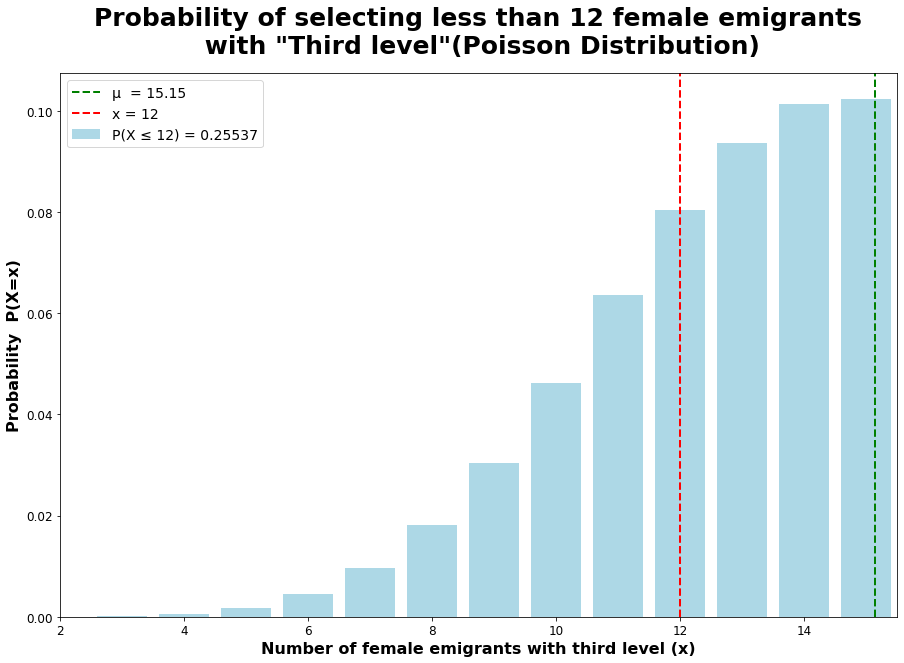

In [254]:
# Given data for female emigrants at "Third level"

λ = 15.150000

# Less than 12 female emigrants 
x3 = 12

# Calculate the mean
μ3 = λ

# Calculate the probability using the Poisson PMF
prob3 = poisson.cdf(x3, λ)

# Plotting the Poisson distribution for the specified case as a bar plot
x = np.arange(0, 50)
poisson_values = poisson.pmf(x, λ)

plt.figure(figsize=(15, 10))
plt.bar(x[:x3+4], poisson_values[:x3+4], color='lightblue',label=f'P(X ≤ 12) = {prob3:.5f}')
plt.axvline(x=μ3 , color='g', linestyle='--', label=f'μ  = {μ3 :.2f}', linewidth=2) # Add a vertical line for μ = 15.15
plt.axvline(x=x3, color='r', linestyle='--', label=f'x = {x3}', linewidth=2)  # Adding the vertical line for x = 12
plt.title('Probability of selecting less than 12 female emigrants\n with "Third level"(Poisson Distribution)',
          loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Number of female emigrants with third level (x)',fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)',fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2, 15.5)
plt.legend( loc='best', fontsize=14)  # Add the legend
plt.show()

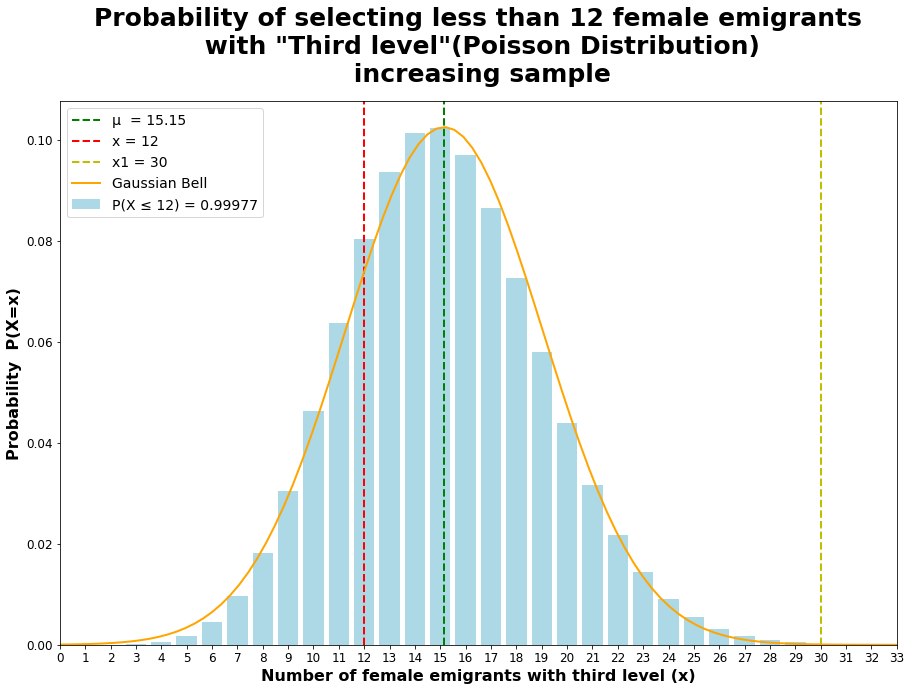

In [255]:

# Given data for female emigrants at "Third level"

λ1 = 15.150000

# Less than 12 female emigrants 
x3 = 12

# Increasing sample size
x4 = 30

# Calculate the mean
μ4 = λ1

# Calculate the probability using the Poisson PMF
prob4 = poisson.cdf(x4, λ1)

# Plotting the Poisson distribution for the specified case as a bar plot
x = np.arange(0, 50)
poisson_values = poisson.pmf(x, λ1)

plt.figure(figsize=(15, 10))
plt.bar(x[:x4+3], poisson_values[:x4+3], color='lightblue',label=f'P(X ≤ 12) = {prob4:.5f}')
plt.axvline(x=μ4 , color='g', linestyle='--', label=f'μ  = {μ4 :.2f}', linewidth=2) # Add a vertical line for μ = 15.15
plt.axvline(x=x3, color='r', linestyle='--', label=f'x = {x3}', linewidth=2)  # Adding the vertical line for x = 12
plt.axvline(x=x4, color='y', linestyle='--', label=f'x1 = {x4}', linewidth=2)  # Adding the vertical line for x = 100
plt.title('Probability of selecting less than 12 female emigrants\n with "Third level"(Poisson Distribution)\n increasing sample',
          loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Number of female emigrants with third level (x)',fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)',fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2, 32)
plt.xticks(np.arange(0, x4 + 4, 1), fontsize=12) 
plt.legend( loc='best', fontsize=14)  # Add the legend
# Adding the bell curve (Gaussian distribution)
x_normal = np.linspace(0, 35, 100)
y_normal = norm.pdf(x_normal, μ4, np.sqrt(μ4))
plt.plot(x_normal, y_normal, color='orange', label='Gaussian Bell', linewidth=2)
plt.legend( loc='best', fontsize=14)  # Add the legend
plt.show()



plt.show()

**3.3.Normal Distribution**

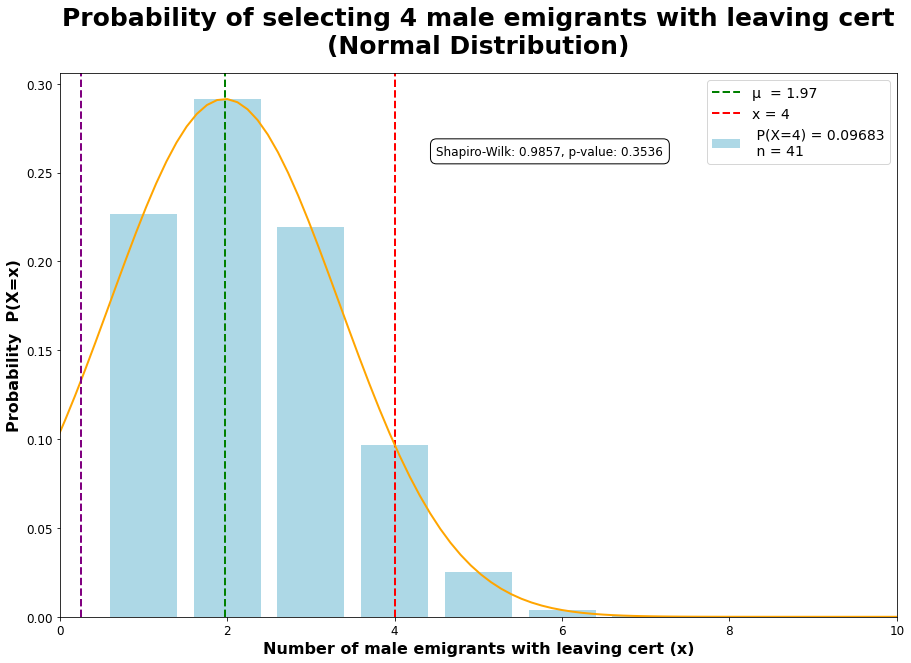

Shapiro-Wilk test statistic: 0.9866, p-value: 0.4107
The data appears to be normally distributed.


In [305]:
# Probability
p = 0.048

# Total population of male emigrants that hold post leaving cert
n = 41

# P(X=4)
x = 4

# Calculating the probability using the normal distribution
prob = norm.pdf(x, n * p, np.sqrt(n * p * (1 - p)))

# Calculation of the mean
μ = n * p



# Plotting the bar plot for the normal distribution
x_val = np.arange(1, n + 2)
prob_plot = norm.pdf(x_val, μ, np.sqrt(n * p * (1 - p)))

plt.figure(figsize=(15, 10))

plt.title('Probability of selecting 4 male emigrants with leaving cert\n(Normal Distribution)',
          loc="center", pad=20, fontsize=25, fontweight="bold")

plt.bar(x_val, prob_plot, color='lightblue', label=f' P(X=4) = {prob:.5f}\n n = 41')

plt.axvline(x=μ, color='g', linestyle='--', label=f'μ  = {μ :.2f}', linewidth=2)  # Add a vertical line for μ
plt.axvline(x=x, color='r', linestyle='--', label=f'x = {x}', linewidth=2)  # Add a vertical line for x
plt.xlabel('Number of male emigrants with leaving cert (x)', fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=14)  # Add the legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 10)
plt.grid(False)

# Adding the Gaussian bell curve
x_gaussian = np.linspace(-2, 10, 100)
y_gaussian = norm.pdf(x_gaussian, μ, np.sqrt(n * p * (1 - p)))
plt.plot(x_gaussian, y_gaussian, color='orange', label='Gaussian Bell', linewidth=2)

# Adding Shapiro-Wilk test line
plt.axvline(0.25, color='purple', linestyle='--', label='Shapiro-Wilk test line', linewidth=2)
plt.text(4.5, 0.26, f"Shapiro-Wilk: {stat:.4f}, p-value: {p_value:.4f}", fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

# Shapiro-Wilk test
data = np.random.normal(μ, np.sqrt(n * p * (1 - p)), 100)
stat, p_value = shapiro(data)
print(f"Shapiro-Wilk test statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

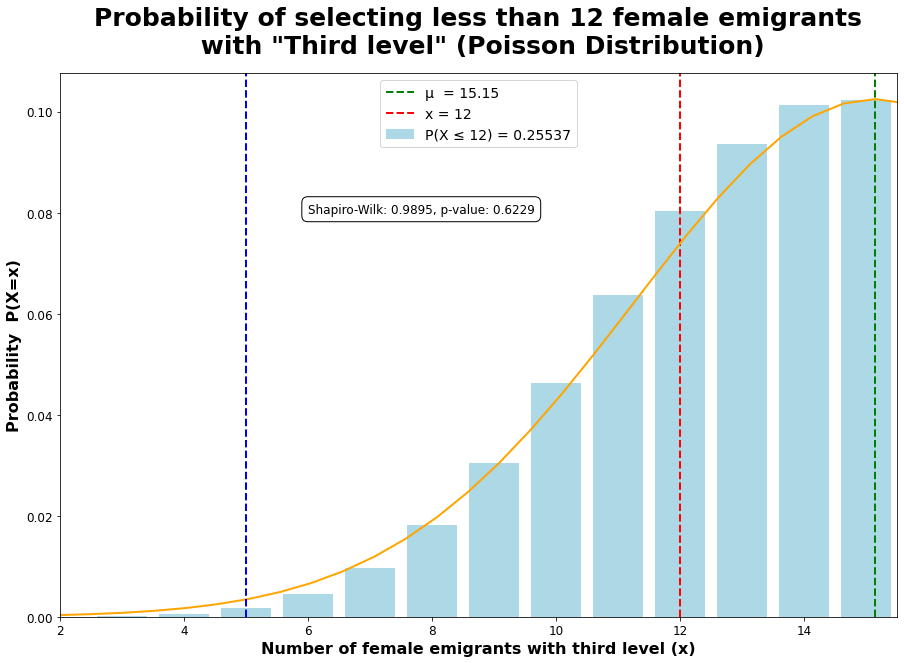

Shapiro-Wilk test statistic: 0.7968, p-value: 0.0025
The data does not appear to be normally distributed.


In [299]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, shapiro, norm

# Given data for female emigrants at "Third level"
λ = 15.150000

# Less than 12 female emigrants
x3 = 12

# Calculate the mean
μ3 = λ

# Calculate the probability using the Poisson PMF
prob3 = poisson.cdf(x3, λ)

# Plotting the Poisson distribution for the specified case as a bar plot
x = np.arange(0, 50)
poisson_values = poisson.pmf(x, λ)

plt.figure(figsize=(15, 10))
plt.bar(x[:x3+4], poisson_values[:x3+4], color='lightblue',label=f'P(X ≤ 12) = {prob3:.5f}')
plt.axvline(x=μ3 , color='g', linestyle='--', label=f'μ  = {μ3 :.2f}', linewidth=2) # Add a vertical line for μ = 15.15
plt.axvline(x=x3, color='r', linestyle='--', label=f'x = {x3}', linewidth=2)  # Adding the vertical line for x = 12
plt.title('Probability of selecting less than 12 female emigrants\n with "Third level" (Poisson Distribution)',
          loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Number of female emigrants with third level (x)', fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2, 15.5)
plt.legend(loc='best', fontsize=14)  # Add the legend

# Adding the Gaussian bell curve
x_gaussian = np.linspace(0, 50, 100)
y_gaussian = norm.pdf(x_gaussian, μ3, np.sqrt(μ3))
plt.plot(x_gaussian, y_gaussian, color='orange', label='Gaussian Bell', linewidth=2)

# Adding Shapiro-Wilk test line
plt.axvline(x=5, color='b', linestyle='--', label=f'Shapiro-Wilk: {stat:.4f}, p-value: {p_value:.4f}', linewidth=2)
plt.text(6, 0.08, f"Shapiro-Wilk: {stat:.4f}, p-value: {p_value:.4f}", fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

# Shapiro-Wilk test
data = poisson_values[:x3+4]
stat, p_value = shapiro(data)
print(f"Shapiro-Wilk test statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


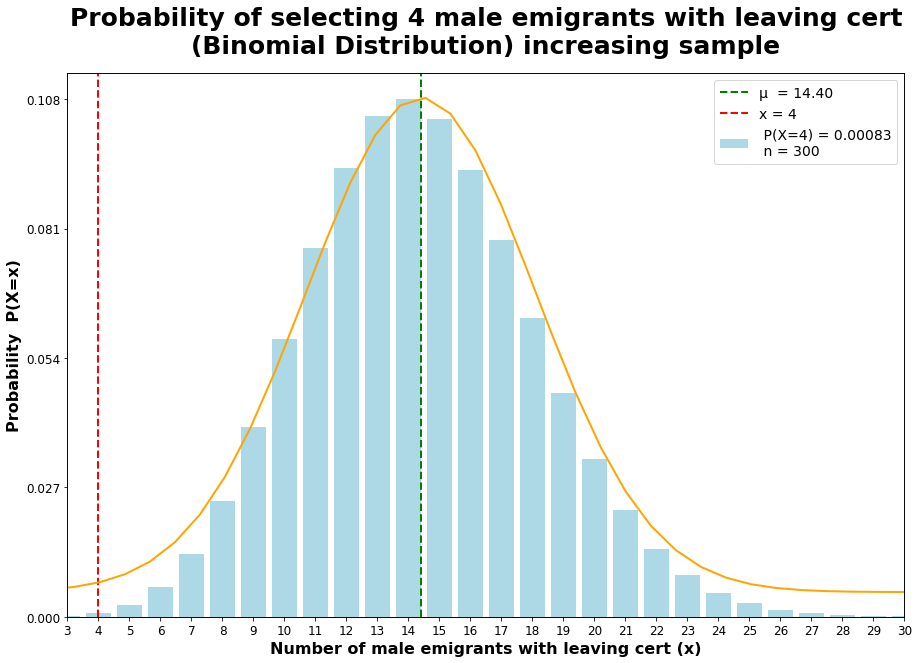

Shapiro-Wilk test statistic: 0.9788, p-value: 0.1069
The data appears to be normally distributed.


In [310]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, shapiro

# Probability
p1 = 0.048
# Total population of male emigrants that hold post leaving cert
n1 = 300
# P(X=4)
x1 = 4

# Calculating the probability using the binom.pmf function
prob1 = binom.pmf(x1, n1, p1)
# calculating the mean
μ1 = binom.mean(n1, p1)

# Plotting the bar plot for the probability distribution
x_val1 = np.arange(2, n1 + 1)
prob_plot1 = binom.pmf(x_val1, n1, p1)

fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.set_title('Probability of selecting 4 male emigrants with leaving cert\n(Binomial Distribution) increasing sample',
          loc="center", pad=20, fontsize=25, fontweight="bold")

ax1.bar(x_val1, prob_plot1, color='lightblue', label=f' P(X=4) = {prob1:.5f}\n n = 300')

ax1.axvline(x=μ1, color='g', linestyle='--', label=f'μ  = {μ1:.2f}', linewidth=2) # Add a vertical line for μ = 14.4
ax1.axvline(x=x1, color='r', linestyle='--', label=f'x = {x1}', linewidth=2) # Add a vertical line for x = 4
ax1.set_xlabel('Number of male emigrants with leaving cert (x)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Probability  P(X=x)', fontsize=16, fontweight='bold')

ax1.set_xticks(np.arange(3, 31, 1))
ax1.set_yticks(np.linspace(0, max(prob_plot1), 5))
ax1.set_xlim(3, 30)
ax1.grid(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding the Gaussian bell curve
x_normal1 = np.linspace(0, 80, 100)
y_gaussian = norm.pdf(x_normal1, μ1, np.sqrt(n1 * p1 * (1 - p1)))

ax2 = ax1.twinx()
plt.plot(x_normal1, y_gaussian, color='orange', label='Gaussian Bell', linewidth=2)

ax1.legend(loc='best', fontsize=14)
ax2.set_yticks([])
plt.show()

# Shapiro-Wilk test for normality
data = binom.rvs(n1, p1, size=100)
stat, p_value = shapiro(data)
print(f"Shapiro-Wilk test statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


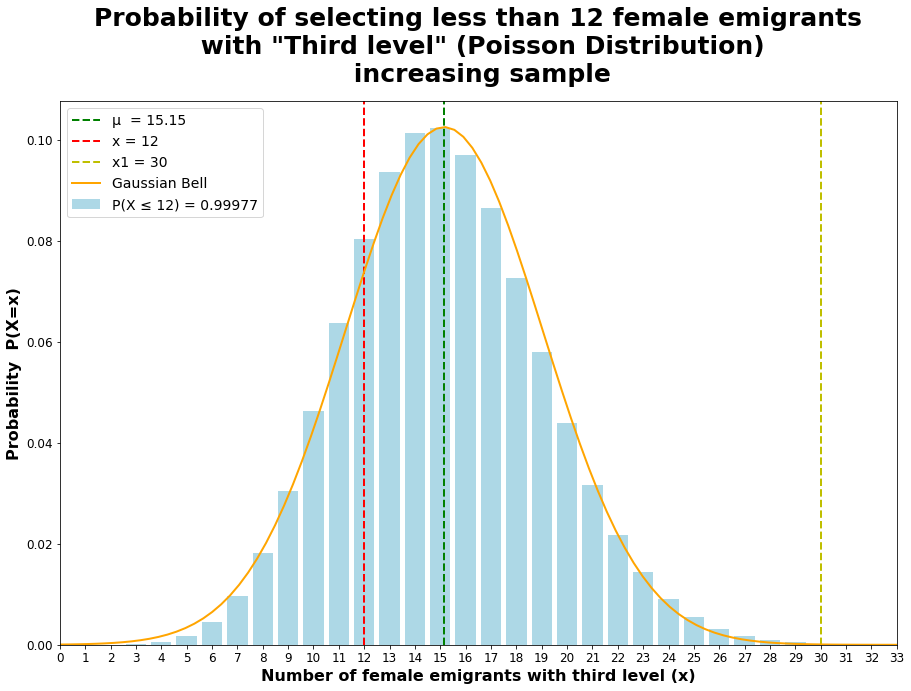

Shapiro-Wilk test statistic: 0.9753, p-value: 0.0573
The data appears to be normally distributed.


In [313]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, shapiro

# Given data for female emigrants at "Third level"
λ1 = 15.150000

# Less than 12 female emigrants 
x3 = 12

# Increasing sample size
x4 = 30

# Calculate the mean
μ4 = λ1

# Calculate the probability using the Poisson PMF
prob4 = poisson.cdf(x4, λ1)

# Plotting the Poisson distribution for the specified case as a bar plot
x = np.arange(0, 50)
poisson_values = poisson.pmf(x, λ1)

plt.figure(figsize=(15, 10))
plt.bar(x[:x4+3], poisson_values[:x4+3], color='lightblue',label=f'P(X ≤ 12) = {prob4:.5f}')
plt.axvline(x=μ4 , color='g', linestyle='--', label=f'μ  = {μ4 :.2f}', linewidth=2) # Add a vertical line for μ = 15.15
plt.axvline(x=x3, color='r', linestyle='--', label=f'x = {x3}', linewidth=2)  # Adding the vertical line for x = 12
plt.axvline(x=x4, color='y', linestyle='--', label=f'x1 = {x4}', linewidth=2)  # Adding the vertical line for x = 100
plt.title('Probability of selecting less than 12 female emigrants\n with "Third level" (Poisson Distribution)\n increasing sample',
          loc="center", pad=20, fontsize=25, fontweight="bold")
plt.xlabel('Number of female emigrants with third level (x)', fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2, 32)
plt.xticks(np.arange(0, x4 + 4, 1), fontsize=12) 
plt.legend(loc='best', fontsize=14)  # Add the legend

# Adding the bell curve (Gaussian distribution)
x_normal = np.linspace(0, 35, 100)
y_normal = norm.pdf(x_normal, μ4, np.sqrt(μ4))
plt.plot(x_normal, y_normal, color='orange', label='Gaussian Bell', linewidth=2)
plt.legend(loc='best', fontsize=14)  # Add the legend
plt.show()

# Shapiro-Wilk test for normality
data = poisson.rvs(λ1, size=100)
stat, p_value = shapiro(data)
print(f"Shapiro-Wilk test statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


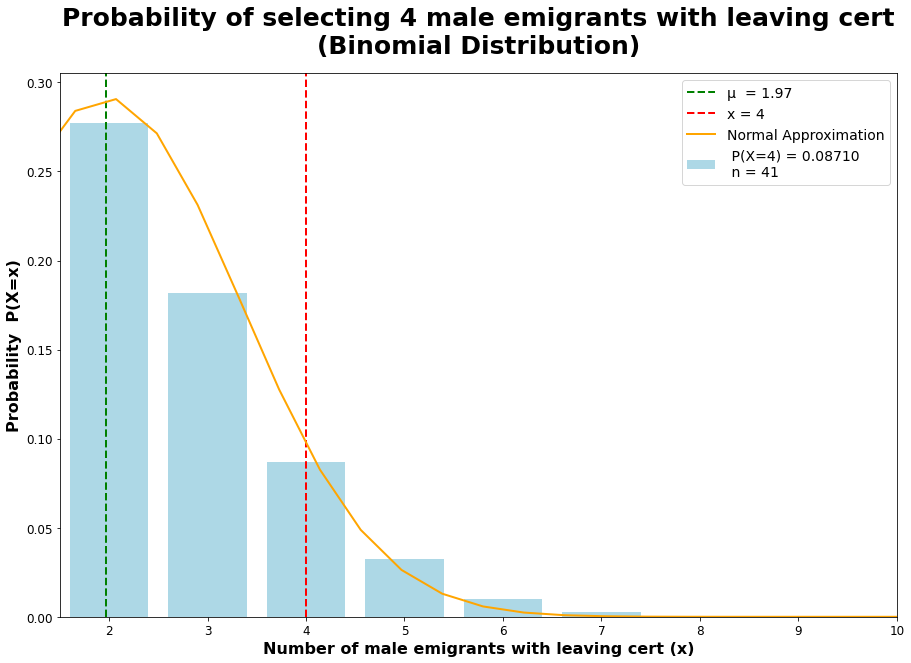

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Probability
p = 0.048

# Total population of male emigrants that hold post leaving cert
n = 41

# P(X=4)
x = 4

# Calculating the probability using the binom.pmf function
prob = binom.pmf(x, n, p)
# calculationg the mean
μ = binom.mean(n, p)
# calculating the standard deviation
σ = np.sqrt(n * p * (1 - p))

# Plotting the bar plot for the probability distribution
x_val = np.arange(2, n + 1)
prob_plot = binom.pmf(x_val, n, p)

plt.figure(figsize=(15, 10))

plt.title('Probability of selecting 4 male emigrants with leaving cert\n(Binomial Distribution)',
          loc="center", pad=20, fontsize=25, fontweight="bold")

plt.bar(x_val, prob_plot, color='lightblue', label=f' P(X=4) = {prob:.5f}\n n = 41')

plt.axvline(x=μ , color='g', linestyle='--', label=f'μ  = {μ :.2f}', linewidth=2) # Add a vertical line for μ = 1.97
plt.axvline(x=x, color='r', linestyle='--', label=f'x = {x}', linewidth=2) # Add a vertical line for x = 4
plt.xlabel('Number of male emigrants with leaving cert (x)', fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=14)  # Add the legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1.5, 10)
plt.grid(False)

# Adding the normal distribution approximation
x_normal = np.linspace(0, n, 100)
y_normal = norm.pdf(x_normal, μ, σ)  # Using the mean and standard deviation for the normal distribution

plt.plot(x_normal, y_normal, color='orange', label='Normal Approximation', linewidth=2)
plt.legend(loc='best', fontsize=14)

plt.show()


Shapiro-Wilk test statistic: 0.9233, p-value: 0.0000
The data does not appear to be normally distributed.


Shapiro-Wilk test statistic: 0.9148, p-value: 0.0000
The data does not appear to be normally distributed.


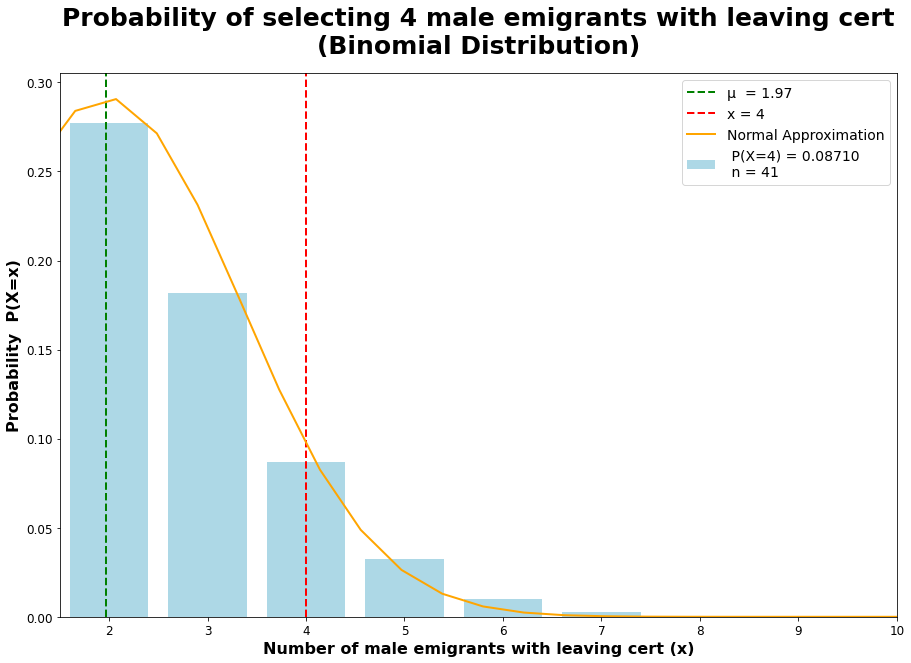

In [319]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, shapiro

# Probability
p = 0.048

# Total population of male emigrants that hold post leaving cert
n = 41

# P(X=4)
x = 4

# Calculating the probability using the binom.pmf function
prob = binom.pmf(x, n, p)
# calculationg the mean
μ = binom.mean(n, p)
# calculating the standard deviation
σ = np.sqrt(n * p * (1 - p))

# Plotting the bar plot for the probability distribution
x_val = np.arange(2, n + 1)
prob_plot = binom.pmf(x_val, n, p)

plt.figure(figsize=(15, 10))

plt.title('Probability of selecting 4 male emigrants with leaving cert\n(Binomial Distribution)',
          loc="center", pad=20, fontsize=25, fontweight="bold")

plt.bar(x_val, prob_plot, color='lightblue', label=f' P(X=4) = {prob:.5f}\n n = 41')

plt.axvline(x=μ , color='g', linestyle='--', label=f'μ  = {μ :.2f}', linewidth=2) # Add a vertical line for μ = 1.97
plt.axvline(x=x, color='r', linestyle='--', label=f'x = {x}', linewidth=2) # Add a vertical line for x = 4
plt.xlabel('Number of male emigrants with leaving cert (x)', fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=14)  # Add the legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1.5, 10)
plt.grid(False)

# Adding the normal distribution approximation
x_normal = np.linspace(0, n, 100)
y_normal = norm.pdf(x_normal, μ, σ)  # Using the mean and standard deviation for the normal distribution

plt.plot(x_normal, y_normal, color='orange', label='Normal Approximation', linewidth=2)
plt.legend(loc='best', fontsize=14)

# Shapiro-Wilk test for normality
data = binom.rvs(n, p, size=100)
stat, p_value = shapiro(data)
print(f"Shapiro-Wilk test statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

plt.show()


Shapiro-Wilk test statistic: 0.9637, p-value: 0.0075
The data does not appear to be normally distributed.


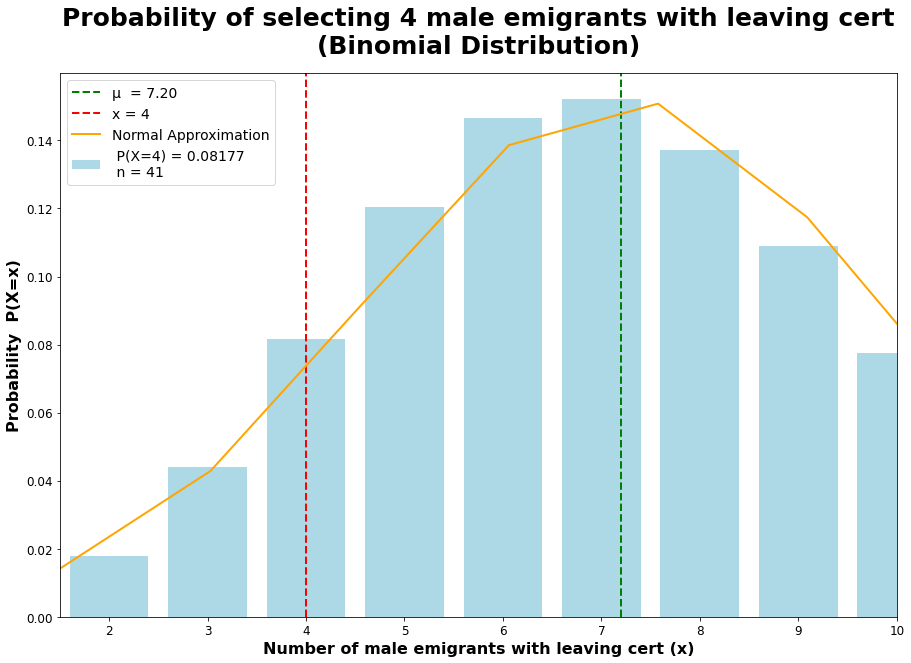

In [329]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, shapiro

# Probability
p = 0.048

# Total population of male emigrants that hold post leaving cert
n = 150

# P(X=4)
x = 4

# Calculating the probability using the binom.pmf function
prob = binom.pmf(x, n, p)
# calculationg the mean
μ = binom.mean(n, p)
# calculating the standard deviation
σ = np.sqrt(n * p * (1 - p))

# Plotting the bar plot for the probability distribution
x_val = np.arange(2, n + 1)
prob_plot = binom.pmf(x_val, n, p)

plt.figure(figsize=(15, 10))

plt.title('Probability of selecting 4 male emigrants with leaving cert\n(Binomial Distribution)',
          loc="center", pad=20, fontsize=25, fontweight="bold")

plt.bar(x_val, prob_plot, color='lightblue', label=f' P(X=4) = {prob:.5f}\n n = 41')

plt.axvline(x=μ , color='g', linestyle='--', label=f'μ  = {μ :.2f}', linewidth=2) # Add a vertical line for μ = 1.97
plt.axvline(x=x, color='r', linestyle='--', label=f'x = {x}', linewidth=2) # Add a vertical line for x = 4
plt.xlabel('Number of male emigrants with leaving cert (x)', fontsize=16, fontweight='bold')
plt.ylabel('Probability  P(X=x)', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=14)  # Add the legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1.5, 10)
plt.grid(False)

# Adding the normal distribution approximation
x_normal = np.linspace(0, n, 100)
y_normal = norm.pdf(x_normal, μ, σ)  # Using the mean and standard deviation for the normal distribution

plt.plot(x_normal, y_normal, color='orange', label='Normal Approximation', linewidth=2)
plt.legend(loc='best', fontsize=14)

# Shapiro-Wilk test for normality
data = binom.rvs(n, p, size=100)
stat, p_value = shapiro(data)
print(f"Shapiro-Wilk test statistic: {stat:.4f}, p-value: {p_value:.4f}")

if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

plt.show()
